## Problem Statement

PV will consume existing back-up reserves of online conventional generators to help to manage its intermittency.

## Business Objective
To forecast solar irradiance to reduce uncertainties in balancing supply and demand of electricity, so that system operators can take prompt necessary counter-measures to address variations in PV.

## Analytic Objective
To determine the feasibility of using solar irradiance prediction models to aid in electricity load forecasts through understanding their accuracies and computation times



## Data Preparation

In [33]:
# To load libraries 
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# To read in the txt files
import numpy as np
import pandas as pd   
import os

main = 'E:\InternShip\SERIS\\401'

os.chdir(main)
os.getcwd()
os.listdir(main)

input_files = [] 
for year in os.listdir(main):
    for month in os.listdir(main + "\\" + year):
        for day in os.listdir(main + "\\" + year + "\\" + month):
            os.chdir(main +'/' + year + '/' + month)
            try:
                txt_file = pd.read_table(day,delimiter="\t")
            except:
                continue
            input_files.append(txt_file)
            

# to create a big data frame by concatinating all files
big_df = pd.concat(input_files)

big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1617676 entries, 0 to 1055
Data columns (total 21 columns):
Air_P        2493 non-null float64
AvgAir_P     1615183 non-null float64
AvgGSi00     1615183 non-null float64
AvgHamb      1615183 non-null float64
AvgSPN1_D    1615183 non-null float64
AvgSPN1_G    1615183 non-null float64
AvgTSi00     1615183 non-null float64
AvgTamb      1615183 non-null float64
AvgWind_D    1615183 non-null float64
AvgWind_S    1615183 non-null float64
GSi00        2493 non-null float64
Hamb         2493 non-null float64
Rec_ID       1615183 non-null float64
Record_ID    2493 non-null float64
SPN1_D       2493 non-null float64
SPN1_G       2493 non-null float64
Tamb         2493 non-null float64
Tm           1617676 non-null object
Tsi00        2493 non-null float64
Wind_S       2493 non-null float64
Wind_d       2493 non-null float64
dtypes: float64(20), object(1)
memory usage: 271.5+ MB


In [35]:
big_df.head()

,Air_P,AvgAir_P,AvgGSi00,AvgHamb,AvgSPN1_D,AvgSPN1_G,AvgTSi00,AvgTamb,AvgWind_D,AvgWind_S,...,Hamb,Rec_ID,Record_ID,SPN1_D,SPN1_G,Tamb,Tm,Tsi00,Wind_S,Wind_d
0,NaN,1002.424,0.056,78.029,2.996,4.215,26.977,28.866,134.459,0.365,...,NaN,284209.0,NaN,NaN,NaN,NaN,2013-05-01 00:06:00,NaN,NaN,NaN
1,NaN,1002.422,-0.091,78.097,2.979,4.121,26.965,28.854,130.833,0.346,...,NaN,284210.0,NaN,NaN,NaN,NaN,2013-05-01 00:07:00,NaN,NaN,NaN
2,NaN,1002.408,-0.162,78.175,2.980,4.109,26.959,28.838,147.786,0.106,...,NaN,284211.0,NaN,NaN,NaN,NaN,2013-05-01 00:08:00,NaN,NaN,NaN
3,NaN,1002.409,-0.036,78.261,3.061,4.289,26.952,28.831,154.436,0.318,...,NaN,284212.0,NaN,NaN,NaN,NaN,2013-05-01 00:09:00,NaN,NaN,NaN
4,NaN,1002.402,-0.015,78.327,3.219,4.308,26.951,28.824,127.967,0.171,...,NaN,284213.0,NaN,NaN,NaN,NaN,2013-05-01 00:10:00,NaN,NaN,NaN


In [36]:
big_df.tail()

,Air_P,AvgAir_P,AvgGSi00,AvgHamb,AvgSPN1_D,AvgSPN1_G,AvgTSi00,AvgTamb,AvgWind_D,AvgWind_S,...,Hamb,Rec_ID,Record_ID,SPN1_D,SPN1_G,Tamb,Tm,Tsi00,Wind_S,Wind_d
1051,1000.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.1677,NaN,1906234.0,85.3354,238.912,31.9900,2016-05-31 17:38:00,37.2031,0.692540,123.416
1052,1000.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.3383,NaN,1906235.0,86.3499,235.839,31.9412,2016-05-31 17:39:00,37.1400,0.909315,106.765
1053,1000.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.3756,NaN,1906236.0,87.4294,231.136,31.8796,2016-05-31 17:40:00,37.0183,0.834796,117.704
1054,1000.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.4583,NaN,1906237.0,87.1218,228.752,31.8462,2016-05-31 17:41:00,37.0365,0.248174,154.862
1055,1000.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.7145,NaN,1906238.0,84.9759,223.256,31.8628,2016-05-31 17:42:00,37.1943,0.169042,142.168


In [37]:
# From 2016-05-30 00:00:00 onwards (last 2 days of the complete dataset) , there was a switchover in naming of sensor readings eg., from 'AvgGSi00' to 'GSi00'. Values are popluated into the new columns from stated datetimestamp. This causes a discrepancies of  2493 readings

# Since 2493 out of full length of data set is an insignificant amount, to discard the data for this date. 

2493 / 1617676 * 100

0.15410997010526212

In [38]:
big_df_1 = big_df[: -2493]
big_df_1.tail()

,Air_P,AvgAir_P,AvgGSi00,AvgHamb,AvgSPN1_D,AvgSPN1_G,AvgTSi00,AvgTamb,AvgWind_D,AvgWind_S,...,Hamb,Rec_ID,Record_ID,SPN1_D,SPN1_G,Tamb,Tm,Tsi00,Wind_S,Wind_d
1435,NaN,1002.560,0.158,81.829,2.216,3.686,27.708,29.746,199.285,0.010,...,NaN,1903731.0,NaN,NaN,NaN,NaN,2016-05-29 23:55:00,NaN,NaN,NaN
1436,NaN,1002.546,0.149,82.002,2.189,3.500,27.695,29.743,253.891,-0.018,...,NaN,1903732.0,NaN,NaN,NaN,NaN,2016-05-29 23:56:00,NaN,NaN,NaN
1437,NaN,1002.555,0.168,82.410,2.536,3.792,27.676,29.729,259.439,0.020,...,NaN,1903733.0,NaN,NaN,NaN,NaN,2016-05-29 23:57:00,NaN,NaN,NaN
1438,NaN,1002.557,0.125,82.458,2.322,3.698,27.662,29.696,220.842,-0.014,...,NaN,1903734.0,NaN,NaN,NaN,NaN,2016-05-29 23:58:00,NaN,NaN,NaN
1439,NaN,1002.577,0.134,82.540,2.453,3.877,27.640,29.674,249.468,-0.012,...,NaN,1903735.0,NaN,NaN,NaN,NaN,2016-05-29 23:59:00,NaN,NaN,NaN


In [39]:
# To drop redundant columns

del big_df_1['Wind_d']
del big_df_1['Wind_S']
del big_df_1['Tsi00']
del big_df_1['Tamb']
del big_df_1['SPN1_G']
del big_df_1['SPN1_D']
del big_df_1['Record_ID']
del big_df_1['Rec_ID']
del big_df_1['GSi00']
del big_df_1['Air_P']
del big_df_1['Hamb']

In [40]:
# To convert the Tm column to datetime dtype
big_df_1['Tm'] = pd.to_datetime(big_df_1['Tm'])

big_df_1['Date'] = big_df_1['Tm'].dt.date
big_df_1['Week'] = big_df_1['Tm'].dt.week
big_df_1['Month'] = big_df_1['Tm'].dt.month
big_df_1['Year'] = big_df_1['Tm'].dt.year
big_df_1['Time'] = big_df_1['Tm'].dt.time
big_df_1['Hour'] = big_df_1['Tm'].dt.hour
big_df_1['Minutes'] = big_df_1['Tm'].dt.minute

big_df_1.head()

C:\Users\bst\AppData\Local\Continuum\anaconda3\envs\tfkeras\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


C:\Users\bst\AppData\Local\Continuum\anaconda3\envs\tfkeras\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


C:\Users\bst\AppData\Local\Continuum\anaconda3\envs\tfkeras\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


C:\Users\bst\AppData\Local\Continuum\anaconda3\envs\tfkeras\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


C:\Users\bst\AppData\Local\Continuum\anaconda3\envs\tfkeras\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


C:\Users\bst\AppData\Local\Continuum\anaconda3\envs\tfkeras\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


C:\Users\bst\AppData\Local\Continuum\anaconda3\envs\tfkeras\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


C:\Users\bst\AppData\Local\Continuum\anaconda3\envs\tfkeras\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,AvgAir_P,AvgGSi00,AvgHamb,AvgSPN1_D,AvgSPN1_G,AvgTSi00,AvgTamb,AvgWind_D,AvgWind_S,Tm,Date,Week,Month,Year,Time,Hour,Minutes
0,1002.424,0.056,78.029,2.996,4.215,26.977,28.866,134.459,0.365,2013-05-01 00:06:00,2013-05-01,18,5,2013,00:06:00,0,6
1,1002.422,-0.091,78.097,2.979,4.121,26.965,28.854,130.833,0.346,2013-05-01 00:07:00,2013-05-01,18,5,2013,00:07:00,0,7
2,1002.408,-0.162,78.175,2.980,4.109,26.959,28.838,147.786,0.106,2013-05-01 00:08:00,2013-05-01,18,5,2013,00:08:00,0,8
3,1002.409,-0.036,78.261,3.061,4.289,26.952,28.831,154.436,0.318,2013-05-01 00:09:00,2013-05-01,18,5,2013,00:09:00,0,9
4,1002.402,-0.015,78.327,3.219,4.308,26.951,28.824,127.967,0.171,2013-05-01 00:10:00,2013-05-01,18,5,2013,00:10:00,0,10


In [41]:
big_df_1.columns

Index(['AvgAir_P', 'AvgGSi00', 'AvgHamb', 'AvgSPN1_D', 'AvgSPN1_G', 'AvgTSi00',
       'AvgTamb', 'AvgWind_D', 'AvgWind_S', 'Tm', 'Date', 'Week', 'Month',
       'Year', 'Time', 'Hour', 'Minutes'],
      dtype='object')

In [42]:
# To rename the columns with more readable names
big_df_1.columns = ['AirP', 'GSI', 'Hum', 'SPN_D', 'SPN_G', 'TSI', 'Tem', 'WindD', 'WindS', 'TimeStamp', 'Date','Wk', 'Mth', 'Yr', 'Time', 'Hr', 'Min']
big_df_1.head()

,AirP,GSI,Hum,SPN_D,SPN_G,TSI,Tem,WindD,WindS,TimeStamp,Date,Wk,Mth,Yr,Time,Hr,Min
0,1002.424,0.056,78.029,2.996,4.215,26.977,28.866,134.459,0.365,2013-05-01 00:06:00,2013-05-01,18,5,2013,00:06:00,0,6
1,1002.422,-0.091,78.097,2.979,4.121,26.965,28.854,130.833,0.346,2013-05-01 00:07:00,2013-05-01,18,5,2013,00:07:00,0,7
2,1002.408,-0.162,78.175,2.980,4.109,26.959,28.838,147.786,0.106,2013-05-01 00:08:00,2013-05-01,18,5,2013,00:08:00,0,8
3,1002.409,-0.036,78.261,3.061,4.289,26.952,28.831,154.436,0.318,2013-05-01 00:09:00,2013-05-01,18,5,2013,00:09:00,0,9
4,1002.402,-0.015,78.327,3.219,4.308,26.951,28.824,127.967,0.171,2013-05-01 00:10:00,2013-05-01,18,5,2013,00:10:00,0,10


In [43]:
# To check for missing values
big_df_1.isnull().sum()

AirP         0
GSI          0
Hum          0
SPN_D        0
SPN_G        0
TSI          0
Tem          0
WindD        0
WindS        0
TimeStamp    0
Date         0
Wk           0
Mth          0
Yr           0
Time         0
Hr           0
Min          0
dtype: int64

In [44]:
big_df_1.info() 
# 1615183 entries


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615183 entries, 0 to 1439
Data columns (total 17 columns):
AirP         1615183 non-null float64
GSI          1615183 non-null float64
Hum          1615183 non-null float64
SPN_D        1615183 non-null float64
SPN_G        1615183 non-null float64
TSI          1615183 non-null float64
Tem          1615183 non-null float64
WindD        1615183 non-null float64
WindS        1615183 non-null float64
TimeStamp    1615183 non-null datetime64[ns]
Date         1615183 non-null object
Wk           1615183 non-null int64
Mth          1615183 non-null int64
Yr           1615183 non-null int64
Time         1615183 non-null object
Hr           1615183 non-null int64
Min          1615183 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(5), object(2)
memory usage: 221.8+ MB


In [45]:
# To clip the meteorologoical values within historical ranges with floor and ceiling
# Temperature
# s401[s401['Tem'] < 0.00] = 0.00
big_df_1['Tem'].clip(20, 37)
#df.where(df>-1,-1).where(df<1,1)

# Humidity
big_df_1['Hum'].clip(30, 100)

# GSI
big_df_1['GSI'].clip(0, 1500)

# WindS
big_df_1['WindS'].clip(0, 12)

# WindD
big_df_1['WindD'].clip(0, 360)

# Air Pressure
big_df_1['AirP'].clip(995, 1012)


print(big_df_1.describe())

               AirP           GSI           Hum         SPN_D         SPN_G  \
count  1.615183e+06  1.615183e+06  1.615183e+06  1.615183e+06  1.615183e+06   
mean   1.002766e+03  1.772654e+02  7.862738e+01  1.070390e+02  1.885492e+02   
std    1.943715e+00  2.736839e+02  1.068494e+01  1.439542e+02  2.846125e+02   
min    9.958560e+02 -8.200000e-01  3.578300e+01 -2.568000e+00 -1.046000e+00   
25%    1.001438e+03  9.400000e-02  7.113700e+01  3.194000e+00  4.370000e+00   
50%    1.002787e+03  3.331000e+00  8.100000e+01  6.771000e+00  8.103000e+00   
75%    1.004102e+03  2.763905e+02  8.662700e+01  1.976890e+02  2.930850e+02   
max    1.009211e+03  1.394020e+03  1.011390e+02  7.393340e+02  1.414050e+03   

                TSI           Tem         WindD         WindS            Wk  \
count  1.615183e+06  1.615183e+06  1.615183e+06  1.615183e+06  1.615183e+06   
mean   3.183094e+01  2.848123e+01  1.715682e+02  6.573763e-01  2.648626e+01   
std    9.267447e+00  2.328972e+00  5.469315e+01  6.

In [46]:
# To convert variables to categorical variable. To aid the model in recognizing temporal distribution of patterns.
for col in ['Wk', 'Mth', 'Yr',  'Hr']:
    big_df_1[col] = big_df_1[col].astype("category").cat.as_ordered()
    
big_df_1.info()

C:\Users\bst\AppData\Local\Continuum\anaconda3\envs\tfkeras\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615183 entries, 0 to 1439
Data columns (total 17 columns):
AirP         1615183 non-null float64
GSI          1615183 non-null float64
Hum          1615183 non-null float64
SPN_D        1615183 non-null float64
SPN_G        1615183 non-null float64
TSI          1615183 non-null float64
Tem          1615183 non-null float64
WindD        1615183 non-null float64
WindS        1615183 non-null float64
TimeStamp    1615183 non-null datetime64[ns]
Date         1615183 non-null object
Wk           1615183 non-null category
Mth          1615183 non-null category
Yr           1615183 non-null category
Time         1615183 non-null object
Hr           1615183 non-null category
Min          1615183 non-null int64
dtypes: category(4), datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 178.7+ MB


In [47]:
# to zero out the dark out hours. 1900hr to 0700hr
big_df_1.loc[(big_df_1['Hr' ] >= 19) & (big_df_1['Hr'] <= 7), 'GSI'] = 0.00

C:\Users\bst\AppData\Local\Continuum\anaconda3\envs\tfkeras\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [48]:
big_df_1[0:1440]

,AirP,GSI,Hum,SPN_D,SPN_G,TSI,Tem,WindD,WindS,TimeStamp,Date,Wk,Mth,Yr,Time,Hr,Min
0,1002.424,0.056,78.029,2.996,4.215,26.977,28.866,134.459,0.365,2013-05-01 00:06:00,2013-05-01,18,5,2013,00:06:00,0,6
1,1002.422,-0.091,78.097,2.979,4.121,26.965,28.854,130.833,0.346,2013-05-01 00:07:00,2013-05-01,18,5,2013,00:07:00,0,7
2,1002.408,-0.162,78.175,2.980,4.109,26.959,28.838,147.786,0.106,2013-05-01 00:08:00,2013-05-01,18,5,2013,00:08:00,0,8
3,1002.409,-0.036,78.261,3.061,4.289,26.952,28.831,154.436,0.318,2013-05-01 00:09:00,2013-05-01,18,5,2013,00:09:00,0,9
4,1002.402,-0.015,78.327,3.219,4.308,26.951,28.824,127.967,0.171,2013-05-01 00:10:00,2013-05-01,18,5,2013,00:10:00,0,10
5,1002.404,-0.002,78.337,3.139,4.311,26.925,28.824,182.876,-0.021,2013-05-01 00:11:00,2013-05-01,18,5,2013,00:11:00,0,11
6,1002.420,-0.105,78.405,3.145,4.375,26.864,28.828,164.710,-0.001,2013-05-01 00:12:00,2013-05-01,18,5,2013,00:12:00,0,12
7,1002.395,-0.090,78.368,3.175,4.362,26.825,28.835,140.227,0.077,2013-05-01 00:13:00,2013-05-01,18,5,2013,00:13:00,0,13
8,1002.395,0.009,78.355,3.266,4.453,26.827,28.835,124.322,0.333,2013-05-01 00:14:00,2013-05-01,18,5,2013,00:14:00,0,14
9,1002.365,0.002,78.350,3.137,4.345,26.847,28.834,144.063,0.232,2013-05-01 00:15:00,2013-05-01,18,5,2013,00:15:00,0,15


In [49]:
# To prepare this dataframe as final dataframe for modeling
df = big_df_1[['Tem', 'AirP', 'Hum', 'WindS', 'WindD', 'Wk', 'Hr', 'TimeStamp', 'GSI']]
df.index = pd.DatetimeIndex(df['TimeStamp'])
del df['TimeStamp']

df.info()
df.head()
df.tail()


# To set up working directory for assignment
import os
print (os.getcwd())

# To change current working directory
os.chdir('F:\Deep Learning Developer\Big Project - time series forecasts with LSTM')
print (os.getcwd())

# save to file
df.to_csv('s401_df.csv')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1615183 entries, 2013-05-01 00:06:00 to 2016-05-29 23:59:00
Data columns (total 8 columns):
Tem      1615183 non-null float64
AirP     1615183 non-null float64
Hum      1615183 non-null float64
WindS    1615183 non-null float64
WindD    1615183 non-null float64
Wk       1615183 non-null category
Hr       1615183 non-null category
GSI      1615183 non-null float64
dtypes: category(2), float64(6)
memory usage: 89.3 MB
E:\InternShip\SERIS\401\2016\05
F:\Deep Learning Developer\Big Project - time series forecasts with LSTM


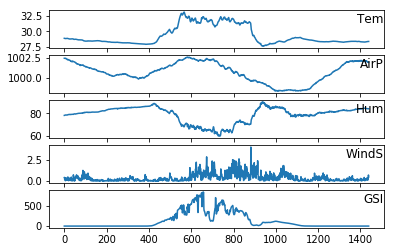

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

# To visualize the dataset for modeling. Just the first day of the dataset
values = df.values

# specify columns to plot
import matplotlib.pyplot as plt
%matplotlib inline

groups = [0, 1, 2, 3, 7]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[0:1440, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1

In [51]:
# To visualize correlation
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.tools.plotting import scatter_matrix
scatter_matrix(df[0:1440])

C:\Users\bst\AppData\Local\Continuum\anaconda3\envs\tfkeras\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018C419AAA58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000018C41812F28>]], dtype=object)

## Prepare the dataset for RNN modeling

In [52]:
# To model with just numerical variables
df = df[['Tem', 'AirP', 'Hum', 'WindS', 'WindD', 'GSI']] # make a copy
df.head()


,Tem,AirP,Hum,WindS,WindD,GSI
TimeStamp,,,,,,
2013-05-01 00:06:00,28.866,1002.424,78.029,0.365,134.459,0.056
2013-05-01 00:07:00,28.854,1002.422,78.097,0.346,130.833,-0.091
2013-05-01 00:08:00,28.838,1002.408,78.175,0.106,147.786,-0.162
2013-05-01 00:09:00,28.831,1002.409,78.261,0.318,154.436,-0.036
2013-05-01 00:10:00,28.824,1002.402,78.327,0.171,127.967,-0.015


To train for one year, validation with following month, and test with one day of predictions
split into train, validation and test sets

values = reframed.values
<br>
n_train_mins = 365 * 24 * 60 = 525600
<br>
n_val_mins = 525600 + (30 * 24 * 60) = 568800
<br>
sum_train_val = n_train_mins + n_val_mins
<br>
sum_train_val_test = n_train_mins + n_val_mins + 60

In [53]:
# To convert the dataset in pandas dataframe into numpy array for modeling
df_np = df.values

# Need the normalize the individual time series since they are of vastly different scales. After normalization, they will take on small values of similar scale

# Pre-process training set, by subtracting the mean and divide by standard deviation
mean = df_np[0:525600].mean(axis=0)
df_np -= mean
std = df_np[0:525600].std(axis=0)
df_np /= std

df_np[0:5]

array([[ 0.33526606,  0.08837661, -0.03725949, -0.52734758, -0.73588031,
        -0.64671468],
       [ 0.33031008,  0.08738033, -0.03129156, -0.55231419, -0.79710173,
        -0.64726031],
       [ 0.32370212,  0.08040637, -0.02444599, -0.86768191, -0.51086712,
        -0.64752384],
       [ 0.32081113,  0.08090451, -0.01689831, -0.58910709, -0.39858846,
        -0.64705616],
       [ 0.31792015,  0.07741752, -0.01110591, -0.78226982, -0.8454913 ,
        -0.64697821]])

To create custom data generator. It will yield a tuple (sample, targets) where sample is one batch of input data while target is the corresponding array of target temperature.
The arguments in the function are:

    data: The original array of floating point data, which we just normalized in the code snippet above.
    lookback: How many timesteps back should our input data go.
    delay: How many timesteps in the future should our target be.
    min_index and max_index: Indices in the data array that delimit which timesteps to draw from. This is useful for keeping a segment of the data for validation and another one for testing.
    shuffle: Whether to shuffle our samples or draw them in chronological order.
    batch_size: The number of samples per batch.
    step: The period, in timesteps, at which we sample data. We will set it 6 in order to draw one data point every hour.


In [54]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

To instantiate with the custom function three generators, one for training, one for validation and one for testing. 

In [55]:
lookback = 5 * 24 * 60  # look back 5 days
step = 5
delay = 24 * 60
batch_size = 128

train_gen = generator(df_np,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=525600,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(df_np,
                    lookback=lookback,
                    delay=delay,
                    min_index=525601,
                    max_index=568800,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(df_np,
                     lookback=lookback,
                     delay=delay,
                     min_index=568801,
                     max_index=569161,
                     step=step,
                     batch_size=batch_size)

# This is how many steps to draw from `val_gen`
# in order to see the whole validation set:
val_steps = (568800 - 525601 - lookback) // batch_size

# This is how many steps to draw from `test_gen`
# in order to see the whole test set:
test_steps = (569161 - 568801 - lookback) // batch_size

## Define and fit a naive model for baseline comparison

In [56]:
# To define an evaluation loop to compute mae
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_naive_method()

0.381187865968


## Define and fit GRN

In [57]:
# To model and fit a single layer GRN

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model_GRN = Sequential()
model_GRN.add(layers.GRU(32, input_shape=(None, df_np.shape[-1])))
model_GRN.add(layers.Dense(1))

model_GRN.compile(optimizer=RMSprop(), loss='mae')
history_GRN = model_GRN.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=1,  # to use 20 epoch when fitting for real
                              validation_data=val_gen,
                              validation_steps=val_steps)


Epoch 1/1


  1/500 [..............................] - ETA: 848s - loss: 0.7894

  2/500 [..............................] - ETA: 695s - loss: 0.7859

  3/500 [..............................] - ETA: 646s - loss: 0.8016

  4/500 [..............................] - ETA: 618s - loss: 0.8059

  5/500 [..............................] - ETA: 601s - loss: 0.7798

  6/500 [..............................] - ETA: 590s - loss: 0.7858

  7/500 [..............................] - ETA: 582s - loss: 0.7678

  8/500 [..............................] - ETA: 575s - loss: 0.7634

  9/500 [..............................] - ETA: 569s - loss: 0.7498

 10/500 [..............................] - ETA: 564s - loss: 0.7434

 11/500 [..............................] - ETA: 560s - loss: 0.7346

 12/500 [..............................] - ETA: 557s - loss: 0.7260

 13/500 [..............................] - ETA: 554s - loss: 0.7151

 14/500 [..............................] - ETA: 551s - loss: 0.7105

 15/500 [..............................] - ETA: 549s - loss: 0.7024

 16/500 [..............................] - ETA: 547s - loss: 0.6892

 17/500 [>.............................] - ETA: 545s - loss: 0.6834

 18/500 [>.............................] - ETA: 543s - loss: 0.6759

 19/500 [>.............................] - ETA: 540s - loss: 0.6682

 20/500 [>.............................] - ETA: 538s - loss: 0.6597

 21/500 [>.............................] - ETA: 536s - loss: 0.6547

 22/500 [>.............................] - ETA: 535s - loss: 0.6490

 23/500 [>.............................] - ETA: 533s - loss: 0.6426

 24/500 [>.............................] - ETA: 531s - loss: 0.6354

 25/500 [>.............................] - ETA: 529s - loss: 0.6289

 26/500 [>.............................] - ETA: 528s - loss: 0.6212

 27/500 [>.............................] - ETA: 526s - loss: 0.6142

 28/500 [>.............................] - ETA: 525s - loss: 0.6074

 29/500 [>.............................] - ETA: 523s - loss: 0.6009

 30/500 [>.............................] - ETA: 522s - loss: 0.5955

 31/500 [>.............................] - ETA: 520s - loss: 0.5895

 32/500 [>.............................] - ETA: 519s - loss: 0.5824

 33/500 [>.............................] - ETA: 518s - loss: 0.5754

 34/500 [=>............................] - ETA: 516s - loss: 0.5703

 35/500 [=>............................] - ETA: 515s - loss: 0.5650

 36/500 [=>............................] - ETA: 514s - loss: 0.5598

 37/500 [=>............................] - ETA: 513s - loss: 0.5547

 38/500 [=>............................] - ETA: 511s - loss: 0.5498

 39/500 [=>............................] - ETA: 510s - loss: 0.5454

 40/500 [=>............................] - ETA: 509s - loss: 0.5423

 41/500 [=>............................] - ETA: 508s - loss: 0.5389

 42/500 [=>............................] - ETA: 507s - loss: 0.5349

 43/500 [=>............................] - ETA: 506s - loss: 0.5304

 44/500 [=>............................] - ETA: 504s - loss: 0.5262

 45/500 [=>............................] - ETA: 503s - loss: 0.5232

 46/500 [=>............................] - ETA: 502s - loss: 0.5199

 47/500 [=>............................] - ETA: 501s - loss: 0.5172

 48/500 [=>............................] - ETA: 500s - loss: 0.5146

 49/500 [=>............................] - ETA: 498s - loss: 0.5126

 50/500 [==>...........................] - ETA: 497s - loss: 0.5097

 51/500 [==>...........................] - ETA: 496s - loss: 0.5065

 52/500 [==>...........................] - ETA: 495s - loss: 0.5047

 53/500 [==>...........................] - ETA: 493s - loss: 0.5024

 54/500 [==>...........................] - ETA: 492s - loss: 0.5003

 55/500 [==>...........................] - ETA: 491s - loss: 0.4981

 56/500 [==>...........................] - ETA: 490s - loss: 0.4956

 57/500 [==>...........................] - ETA: 488s - loss: 0.4933

 58/500 [==>...........................] - ETA: 487s - loss: 0.4903

 59/500 [==>...........................] - ETA: 486s - loss: 0.4883

 60/500 [==>...........................] - ETA: 485s - loss: 0.4854

 61/500 [==>...........................] - ETA: 484s - loss: 0.4839

 62/500 [==>...........................] - ETA: 482s - loss: 0.4827

 63/500 [==>...........................] - ETA: 481s - loss: 0.4814

 64/500 [==>...........................] - ETA: 480s - loss: 0.4790

 65/500 [==>...........................] - ETA: 479s - loss: 0.4775

 66/500 [==>...........................] - ETA: 478s - loss: 0.4763

 67/500 [===>..........................] - ETA: 477s - loss: 0.4746

 68/500 [===>..........................] - ETA: 475s - loss: 0.4731

 69/500 [===>..........................] - ETA: 474s - loss: 0.4713

 70/500 [===>..........................] - ETA: 473s - loss: 0.4693

 71/500 [===>..........................] - ETA: 472s - loss: 0.4682

 72/500 [===>..........................] - ETA: 471s - loss: 0.4668

 73/500 [===>..........................] - ETA: 470s - loss: 0.4647

 74/500 [===>..........................] - ETA: 469s - loss: 0.4631

 75/500 [===>..........................] - ETA: 467s - loss: 0.4617

 76/500 [===>..........................] - ETA: 466s - loss: 0.4603

 77/500 [===>..........................] - ETA: 465s - loss: 0.4593

 78/500 [===>..........................] - ETA: 464s - loss: 0.4580

 79/500 [===>..........................] - ETA: 463s - loss: 0.4567

 80/500 [===>..........................] - ETA: 462s - loss: 0.4553

 81/500 [===>..........................] - ETA: 460s - loss: 0.4543

 82/500 [===>..........................] - ETA: 459s - loss: 0.4532

 83/500 [===>..........................] - ETA: 458s - loss: 0.4518

 84/500 [====>.........................] - ETA: 457s - loss: 0.4507

 85/500 [====>.........................] - ETA: 456s - loss: 0.4498

 86/500 [====>.........................] - ETA: 455s - loss: 0.4483

 87/500 [====>.........................] - ETA: 454s - loss: 0.4475

 88/500 [====>.........................] - ETA: 452s - loss: 0.4461

 89/500 [====>.........................] - ETA: 451s - loss: 0.4449

 90/500 [====>.........................] - ETA: 450s - loss: 0.4441

 91/500 [====>.........................] - ETA: 449s - loss: 0.4428

 92/500 [====>.........................] - ETA: 448s - loss: 0.4417

 93/500 [====>.........................] - ETA: 447s - loss: 0.4407

 94/500 [====>.........................] - ETA: 446s - loss: 0.4395

 95/500 [====>.........................] - ETA: 444s - loss: 0.4388

 96/500 [====>.........................] - ETA: 443s - loss: 0.4379

 97/500 [====>.........................] - ETA: 442s - loss: 0.4372

 98/500 [====>.........................] - ETA: 441s - loss: 0.4369

 99/500 [====>.........................] - ETA: 440s - loss: 0.4359

100/500 [=====>........................] - ETA: 439s - loss: 0.4356

101/500 [=====>........................] - ETA: 438s - loss: 0.4349

102/500 [=====>........................] - ETA: 436s - loss: 0.4342

103/500 [=====>........................] - ETA: 435s - loss: 0.4332

104/500 [=====>........................] - ETA: 434s - loss: 0.4330

105/500 [=====>........................] - ETA: 433s - loss: 0.4325

106/500 [=====>........................] - ETA: 432s - loss: 0.4320

107/500 [=====>........................] - ETA: 431s - loss: 0.4317

108/500 [=====>........................] - ETA: 430s - loss: 0.4314

109/500 [=====>........................] - ETA: 429s - loss: 0.4307

110/500 [=====>........................] - ETA: 427s - loss: 0.4302

111/500 [=====>........................] - ETA: 426s - loss: 0.4298

112/500 [=====>........................] - ETA: 425s - loss: 0.4295

113/500 [=====>........................] - ETA: 424s - loss: 0.4288

114/500 [=====>........................] - ETA: 423s - loss: 0.4283

115/500 [=====>........................] - ETA: 422s - loss: 0.4276

116/500 [=====>........................] - ETA: 421s - loss: 0.4268

117/500 [======>.......................] - ETA: 420s - loss: 0.4260

118/500 [======>.......................] - ETA: 418s - loss: 0.4255

119/500 [======>.......................] - ETA: 417s - loss: 0.4251

120/500 [======>.......................] - ETA: 416s - loss: 0.4245

121/500 [======>.......................] - ETA: 415s - loss: 0.4240

122/500 [======>.......................] - ETA: 414s - loss: 0.4237

123/500 [======>.......................] - ETA: 413s - loss: 0.4234

124/500 [======>.......................] - ETA: 412s - loss: 0.4232

125/500 [======>.......................] - ETA: 411s - loss: 0.4227

126/500 [======>.......................] - ETA: 410s - loss: 0.4221

127/500 [======>.......................] - ETA: 408s - loss: 0.4215

128/500 [======>.......................] - ETA: 407s - loss: 0.4210

129/500 [======>.......................] - ETA: 406s - loss: 0.4207

130/500 [======>.......................] - ETA: 405s - loss: 0.4202

131/500 [======>.......................] - ETA: 404s - loss: 0.4199

132/500 [======>.......................] - ETA: 403s - loss: 0.4194

133/500 [======>.......................] - ETA: 402s - loss: 0.4188

134/500 [=======>......................] - ETA: 401s - loss: 0.4185

135/500 [=======>......................] - ETA: 400s - loss: 0.4179

136/500 [=======>......................] - ETA: 398s - loss: 0.4175

137/500 [=======>......................] - ETA: 397s - loss: 0.4167

138/500 [=======>......................] - ETA: 396s - loss: 0.4162

139/500 [=======>......................] - ETA: 395s - loss: 0.4158

140/500 [=======>......................] - ETA: 394s - loss: 0.4155

141/500 [=======>......................] - ETA: 393s - loss: 0.4152

142/500 [=======>......................] - ETA: 392s - loss: 0.4148

143/500 [=======>......................] - ETA: 391s - loss: 0.4147

144/500 [=======>......................] - ETA: 390s - loss: 0.4145

145/500 [=======>......................] - ETA: 388s - loss: 0.4145

146/500 [=======>......................] - ETA: 387s - loss: 0.4139

147/500 [=======>......................] - ETA: 386s - loss: 0.4137

148/500 [=======>......................] - ETA: 385s - loss: 0.4133

149/500 [=======>......................] - ETA: 384s - loss: 0.4127

150/500 [========>.....................] - ETA: 383s - loss: 0.4128

151/500 [========>.....................] - ETA: 382s - loss: 0.4125

152/500 [========>.....................] - ETA: 381s - loss: 0.4122

153/500 [========>.....................] - ETA: 380s - loss: 0.4117

154/500 [========>.....................] - ETA: 378s - loss: 0.4114

155/500 [========>.....................] - ETA: 377s - loss: 0.4109

156/500 [========>.....................] - ETA: 376s - loss: 0.4105

157/500 [========>.....................] - ETA: 375s - loss: 0.4101

158/500 [========>.....................] - ETA: 374s - loss: 0.4096

159/500 [========>.....................] - ETA: 373s - loss: 0.4092

160/500 [========>.....................] - ETA: 372s - loss: 0.4088

161/500 [========>.....................] - ETA: 371s - loss: 0.4086

162/500 [========>.....................] - ETA: 370s - loss: 0.4082

163/500 [========>.....................] - ETA: 368s - loss: 0.4078

164/500 [========>.....................] - ETA: 367s - loss: 0.4073

165/500 [========>.....................] - ETA: 366s - loss: 0.4072

166/500 [========>.....................] - ETA: 365s - loss: 0.4067

167/500 [=========>....................] - ETA: 364s - loss: 0.4063

168/500 [=========>....................] - ETA: 363s - loss: 0.4060

169/500 [=========>....................] - ETA: 362s - loss: 0.4057

170/500 [=========>....................] - ETA: 361s - loss: 0.4056

171/500 [=========>....................] - ETA: 360s - loss: 0.4051

172/500 [=========>....................] - ETA: 358s - loss: 0.4047

173/500 [=========>....................] - ETA: 357s - loss: 0.4042

174/500 [=========>....................] - ETA: 356s - loss: 0.4038

175/500 [=========>....................] - ETA: 355s - loss: 0.4035

176/500 [=========>....................] - ETA: 354s - loss: 0.4031

177/500 [=========>....................] - ETA: 353s - loss: 0.4030

178/500 [=========>....................] - ETA: 352s - loss: 0.4028

179/500 [=========>....................] - ETA: 351s - loss: 0.4026

180/500 [=========>....................] - ETA: 350s - loss: 0.4025

181/500 [=========>....................] - ETA: 348s - loss: 0.4024

182/500 [=========>....................] - ETA: 347s - loss: 0.4020

183/500 [=========>....................] - ETA: 346s - loss: 0.4019

184/500 [==========>...................] - ETA: 345s - loss: 0.4021

185/500 [==========>...................] - ETA: 344s - loss: 0.4020

186/500 [==========>...................] - ETA: 343s - loss: 0.4016

187/500 [==========>...................] - ETA: 342s - loss: 0.4013

188/500 [==========>...................] - ETA: 341s - loss: 0.4009

189/500 [==========>...................] - ETA: 340s - loss: 0.4003

190/500 [==========>...................] - ETA: 339s - loss: 0.4003

191/500 [==========>...................] - ETA: 337s - loss: 0.4001

192/500 [==========>...................] - ETA: 336s - loss: 0.3999

193/500 [==========>...................] - ETA: 335s - loss: 0.3995

194/500 [==========>...................] - ETA: 334s - loss: 0.3994

195/500 [==========>...................] - ETA: 333s - loss: 0.3993

196/500 [==========>...................] - ETA: 332s - loss: 0.3990

197/500 [==========>...................] - ETA: 331s - loss: 0.3984

198/500 [==========>...................] - ETA: 330s - loss: 0.3982

199/500 [==========>...................] - ETA: 329s - loss: 0.3978

200/500 [===========>..................] - ETA: 328s - loss: 0.3976

201/500 [===========>..................] - ETA: 326s - loss: 0.3976

202/500 [===========>..................] - ETA: 325s - loss: 0.3973

203/500 [===========>..................] - ETA: 324s - loss: 0.3971

204/500 [===========>..................] - ETA: 323s - loss: 0.3968

205/500 [===========>..................] - ETA: 322s - loss: 0.3966

206/500 [===========>..................] - ETA: 321s - loss: 0.3964

207/500 [===========>..................] - ETA: 320s - loss: 0.3963

208/500 [===========>..................] - ETA: 319s - loss: 0.3962

209/500 [===========>..................] - ETA: 318s - loss: 0.3960

210/500 [===========>..................] - ETA: 317s - loss: 0.3959

211/500 [===========>..................] - ETA: 315s - loss: 0.3957

212/500 [===========>..................] - ETA: 314s - loss: 0.3956

213/500 [===========>..................] - ETA: 313s - loss: 0.3952

214/500 [===========>..................] - ETA: 312s - loss: 0.3951

215/500 [===========>..................] - ETA: 311s - loss: 0.3952

216/500 [===========>..................] - ETA: 310s - loss: 0.3950

217/500 [============>.................] - ETA: 309s - loss: 0.3948

218/500 [============>.................] - ETA: 308s - loss: 0.3947

219/500 [============>.................] - ETA: 307s - loss: 0.3945

220/500 [============>.................] - ETA: 306s - loss: 0.3944

221/500 [============>.................] - ETA: 304s - loss: 0.3943

222/500 [============>.................] - ETA: 303s - loss: 0.3940

223/500 [============>.................] - ETA: 302s - loss: 0.3938

224/500 [============>.................] - ETA: 301s - loss: 0.3934

225/500 [============>.................] - ETA: 300s - loss: 0.3932

226/500 [============>.................] - ETA: 299s - loss: 0.3932

227/500 [============>.................] - ETA: 298s - loss: 0.3931

228/500 [============>.................] - ETA: 297s - loss: 0.3930

229/500 [============>.................] - ETA: 296s - loss: 0.3927

230/500 [============>.................] - ETA: 295s - loss: 0.3926

231/500 [============>.................] - ETA: 294s - loss: 0.3925

232/500 [============>.................] - ETA: 292s - loss: 0.3923

233/500 [============>.................] - ETA: 291s - loss: 0.3920

234/500 [=============>................] - ETA: 290s - loss: 0.3918

235/500 [=============>................] - ETA: 289s - loss: 0.3919

236/500 [=============>................] - ETA: 288s - loss: 0.3917

237/500 [=============>................] - ETA: 287s - loss: 0.3916

238/500 [=============>................] - ETA: 286s - loss: 0.3917

239/500 [=============>................] - ETA: 285s - loss: 0.3916

240/500 [=============>................] - ETA: 284s - loss: 0.3913

241/500 [=============>................] - ETA: 283s - loss: 0.3913

242/500 [=============>................] - ETA: 282s - loss: 0.3910

243/500 [=============>................] - ETA: 280s - loss: 0.3908

244/500 [=============>................] - ETA: 279s - loss: 0.3906

245/500 [=============>................] - ETA: 278s - loss: 0.3905

246/500 [=============>................] - ETA: 277s - loss: 0.3904

247/500 [=============>................] - ETA: 276s - loss: 0.3905

248/500 [=============>................] - ETA: 275s - loss: 0.3903

249/500 [=============>................] - ETA: 274s - loss: 0.3901

250/500 [==============>...............] - ETA: 273s - loss: 0.3902

251/500 [==============>...............] - ETA: 272s - loss: 0.3900

252/500 [==============>...............] - ETA: 271s - loss: 0.3899

253/500 [==============>...............] - ETA: 270s - loss: 0.3897

254/500 [==============>...............] - ETA: 268s - loss: 0.3895

255/500 [==============>...............] - ETA: 267s - loss: 0.3893

256/500 [==============>...............] - ETA: 266s - loss: 0.3892

257/500 [==============>...............] - ETA: 265s - loss: 0.3890

258/500 [==============>...............] - ETA: 264s - loss: 0.3888

259/500 [==============>...............] - ETA: 263s - loss: 0.3886

260/500 [==============>...............] - ETA: 262s - loss: 0.3884

261/500 [==============>...............] - ETA: 261s - loss: 0.3883

262/500 [==============>...............] - ETA: 260s - loss: 0.3882

263/500 [==============>...............] - ETA: 259s - loss: 0.3880

264/500 [==============>...............] - ETA: 258s - loss: 0.3880

265/500 [==============>...............] - ETA: 256s - loss: 0.3880

266/500 [==============>...............] - ETA: 255s - loss: 0.3880

267/500 [===============>..............] - ETA: 254s - loss: 0.3878

268/500 [===============>..............] - ETA: 253s - loss: 0.3877

269/500 [===============>..............] - ETA: 252s - loss: 0.3876

270/500 [===============>..............] - ETA: 251s - loss: 0.3872

271/500 [===============>..............] - ETA: 250s - loss: 0.3872

272/500 [===============>..............] - ETA: 249s - loss: 0.3871

273/500 [===============>..............] - ETA: 248s - loss: 0.3869

274/500 [===============>..............] - ETA: 247s - loss: 0.3867

275/500 [===============>..............] - ETA: 245s - loss: 0.3865

276/500 [===============>..............] - ETA: 244s - loss: 0.3865

277/500 [===============>..............] - ETA: 243s - loss: 0.3863

278/500 [===============>..............] - ETA: 242s - loss: 0.3862

279/500 [===============>..............] - ETA: 241s - loss: 0.3861

280/500 [===============>..............] - ETA: 240s - loss: 0.3859

281/500 [===============>..............] - ETA: 239s - loss: 0.3857

282/500 [===============>..............] - ETA: 238s - loss: 0.3856

283/500 [===============>..............] - ETA: 237s - loss: 0.3854

284/500 [================>.............] - ETA: 236s - loss: 0.3853

285/500 [================>.............] - ETA: 235s - loss: 0.3851

286/500 [================>.............] - ETA: 233s - loss: 0.3850

287/500 [================>.............] - ETA: 232s - loss: 0.3849

288/500 [================>.............] - ETA: 231s - loss: 0.3849

289/500 [================>.............] - ETA: 230s - loss: 0.3846

290/500 [================>.............] - ETA: 229s - loss: 0.3846

291/500 [================>.............] - ETA: 228s - loss: 0.3845

292/500 [================>.............] - ETA: 227s - loss: 0.3845

293/500 [================>.............] - ETA: 226s - loss: 0.3844

294/500 [================>.............] - ETA: 225s - loss: 0.3844

295/500 [================>.............] - ETA: 224s - loss: 0.3842

296/500 [================>.............] - ETA: 222s - loss: 0.3840

297/500 [================>.............] - ETA: 221s - loss: 0.3840

298/500 [================>.............] - ETA: 220s - loss: 0.3838

299/500 [================>.............] - ETA: 219s - loss: 0.3838

300/500 [=================>............] - ETA: 218s - loss: 0.3835

301/500 [=================>............] - ETA: 217s - loss: 0.3834

302/500 [=================>............] - ETA: 216s - loss: 0.3833

303/500 [=================>............] - ETA: 215s - loss: 0.3832

304/500 [=================>............] - ETA: 214s - loss: 0.3832

305/500 [=================>............] - ETA: 213s - loss: 0.3832

306/500 [=================>............] - ETA: 212s - loss: 0.3832

307/500 [=================>............] - ETA: 210s - loss: 0.3830

308/500 [=================>............] - ETA: 209s - loss: 0.3831

309/500 [=================>............] - ETA: 208s - loss: 0.3830

310/500 [=================>............] - ETA: 207s - loss: 0.3831

311/500 [=================>............] - ETA: 206s - loss: 0.3830

312/500 [=================>............] - ETA: 205s - loss: 0.3830

313/500 [=================>............] - ETA: 204s - loss: 0.3829

314/500 [=================>............] - ETA: 203s - loss: 0.3830

315/500 [=================>............] - ETA: 202s - loss: 0.3830

316/500 [=================>............] - ETA: 201s - loss: 0.3828

317/500 [==================>...........] - ETA: 199s - loss: 0.3827

318/500 [==================>...........] - ETA: 198s - loss: 0.3824

319/500 [==================>...........] - ETA: 197s - loss: 0.3824

320/500 [==================>...........] - ETA: 196s - loss: 0.3824

321/500 [==================>...........] - ETA: 195s - loss: 0.3822

322/500 [==================>...........] - ETA: 194s - loss: 0.3822

323/500 [==================>...........] - ETA: 193s - loss: 0.3821

324/500 [==================>...........] - ETA: 192s - loss: 0.3820

325/500 [==================>...........] - ETA: 191s - loss: 0.3819

326/500 [==================>...........] - ETA: 190s - loss: 0.3819

327/500 [==================>...........] - ETA: 189s - loss: 0.3818

328/500 [==================>...........] - ETA: 187s - loss: 0.3817

329/500 [==================>...........] - ETA: 186s - loss: 0.3817

330/500 [==================>...........] - ETA: 185s - loss: 0.3816

331/500 [==================>...........] - ETA: 184s - loss: 0.3816

332/500 [==================>...........] - ETA: 183s - loss: 0.3815

333/500 [==================>...........] - ETA: 182s - loss: 0.3814

334/500 [===================>..........] - ETA: 181s - loss: 0.3813

335/500 [===================>..........] - ETA: 180s - loss: 0.3811

336/500 [===================>..........] - ETA: 179s - loss: 0.3812

337/500 [===================>..........] - ETA: 178s - loss: 0.3810

338/500 [===================>..........] - ETA: 176s - loss: 0.3811

339/500 [===================>..........] - ETA: 175s - loss: 0.3811

340/500 [===================>..........] - ETA: 174s - loss: 0.3809

341/500 [===================>..........] - ETA: 173s - loss: 0.3808

342/500 [===================>..........] - ETA: 172s - loss: 0.3807

343/500 [===================>..........] - ETA: 171s - loss: 0.3805

344/500 [===================>..........] - ETA: 170s - loss: 0.3803

345/500 [===================>..........] - ETA: 169s - loss: 0.3802

346/500 [===================>..........] - ETA: 168s - loss: 0.3800

347/500 [===================>..........] - ETA: 167s - loss: 0.3800

348/500 [===================>..........] - ETA: 166s - loss: 0.3799

349/500 [===================>..........] - ETA: 164s - loss: 0.3799

350/500 [====================>.........] - ETA: 163s - loss: 0.3797

351/500 [====================>.........] - ETA: 162s - loss: 0.3797

352/500 [====================>.........] - ETA: 161s - loss: 0.3796

353/500 [====================>.........] - ETA: 160s - loss: 0.3796

354/500 [====================>.........] - ETA: 159s - loss: 0.3794

355/500 [====================>.........] - ETA: 158s - loss: 0.3792

356/500 [====================>.........] - ETA: 157s - loss: 0.3792

357/500 [====================>.........] - ETA: 156s - loss: 0.3792

358/500 [====================>.........] - ETA: 155s - loss: 0.3791

359/500 [====================>.........] - ETA: 153s - loss: 0.3790

360/500 [====================>.........] - ETA: 152s - loss: 0.3790

361/500 [====================>.........] - ETA: 151s - loss: 0.3790

362/500 [====================>.........] - ETA: 150s - loss: 0.3789

363/500 [====================>.........] - ETA: 149s - loss: 0.3790

364/500 [====================>.........] - ETA: 148s - loss: 0.3790

365/500 [====================>.........] - ETA: 147s - loss: 0.3789

366/500 [====================>.........] - ETA: 146s - loss: 0.3787

367/500 [=====================>........] - ETA: 145s - loss: 0.3788

368/500 [=====================>........] - ETA: 144s - loss: 0.3788

369/500 [=====================>........] - ETA: 143s - loss: 0.3786

370/500 [=====================>........] - ETA: 141s - loss: 0.3785

371/500 [=====================>........] - ETA: 140s - loss: 0.3784

372/500 [=====================>........] - ETA: 139s - loss: 0.3784

373/500 [=====================>........] - ETA: 138s - loss: 0.3784

374/500 [=====================>........] - ETA: 137s - loss: 0.3783

375/500 [=====================>........] - ETA: 136s - loss: 0.3783

376/500 [=====================>........] - ETA: 135s - loss: 0.3782

377/500 [=====================>........] - ETA: 134s - loss: 0.3782

378/500 [=====================>........] - ETA: 133s - loss: 0.3780

379/500 [=====================>........] - ETA: 132s - loss: 0.3779

380/500 [=====================>........] - ETA: 131s - loss: 0.3780

381/500 [=====================>........] - ETA: 129s - loss: 0.3780

382/500 [=====================>........] - ETA: 128s - loss: 0.3780

383/500 [=====================>........] - ETA: 127s - loss: 0.3779

384/500 [======================>.......] - ETA: 126s - loss: 0.3779

385/500 [======================>.......] - ETA: 125s - loss: 0.3777

386/500 [======================>.......] - ETA: 124s - loss: 0.3777

387/500 [======================>.......] - ETA: 123s - loss: 0.3777

388/500 [======================>.......] - ETA: 122s - loss: 0.3777

389/500 [======================>.......] - ETA: 121s - loss: 0.3777

390/500 [======================>.......] - ETA: 120s - loss: 0.3776

391/500 [======================>.......] - ETA: 118s - loss: 0.3774

392/500 [======================>.......] - ETA: 117s - loss: 0.3774

393/500 [======================>.......] - ETA: 116s - loss: 0.3774

394/500 [======================>.......] - ETA: 115s - loss: 0.3774

395/500 [======================>.......] - ETA: 114s - loss: 0.3772

396/500 [======================>.......] - ETA: 113s - loss: 0.3770

397/500 [======================>.......] - ETA: 112s - loss: 0.3771

398/500 [======================>.......] - ETA: 111s - loss: 0.3770

399/500 [======================>.......] - ETA: 110s - loss: 0.3768

400/500 [=======================>......] - ETA: 109s - loss: 0.3767

401/500 [=======================>......] - ETA: 108s - loss: 0.3766

402/500 [=======================>......] - ETA: 106s - loss: 0.3766

403/500 [=======================>......] - ETA: 105s - loss: 0.3765

404/500 [=======================>......] - ETA: 104s - loss: 0.3764

405/500 [=======================>......] - ETA: 103s - loss: 0.3765

406/500 [=======================>......] - ETA: 102s - loss: 0.3764

407/500 [=======================>......] - ETA: 101s - loss: 0.3764

408/500 [=======================>......] - ETA: 100s - loss: 0.3764

409/500 [=======================>......] - ETA: 99s - loss: 0.3764 

410/500 [=======================>......] - ETA: 98s - loss: 0.3762

411/500 [=======================>......] - ETA: 97s - loss: 0.3760

412/500 [=======================>......] - ETA: 96s - loss: 0.3759

413/500 [=======================>......] - ETA: 94s - loss: 0.3758

414/500 [=======================>......] - ETA: 93s - loss: 0.3758

415/500 [=======================>......] - ETA: 92s - loss: 0.3758

416/500 [=======================>......] - ETA: 91s - loss: 0.3757

417/500 [========================>.....] - ETA: 90s - loss: 0.3757

418/500 [========================>.....] - ETA: 89s - loss: 0.3755

419/500 [========================>.....] - ETA: 88s - loss: 0.3754

420/500 [========================>.....] - ETA: 87s - loss: 0.3752

421/500 [========================>.....] - ETA: 86s - loss: 0.3753

422/500 [========================>.....] - ETA: 85s - loss: 0.3752

423/500 [========================>.....] - ETA: 84s - loss: 0.3752

424/500 [========================>.....] - ETA: 82s - loss: 0.3752

425/500 [========================>.....] - ETA: 81s - loss: 0.3751

426/500 [========================>.....] - ETA: 80s - loss: 0.3750

427/500 [========================>.....] - ETA: 79s - loss: 0.3749

428/500 [========================>.....] - ETA: 78s - loss: 0.3748

429/500 [========================>.....] - ETA: 77s - loss: 0.3747

430/500 [========================>.....] - ETA: 76s - loss: 0.3746

431/500 [========================>.....] - ETA: 75s - loss: 0.3746

432/500 [========================>.....] - ETA: 74s - loss: 0.3746

433/500 [========================>.....] - ETA: 73s - loss: 0.3746

434/500 [=========================>....] - ETA: 72s - loss: 0.3746

435/500 [=========================>....] - ETA: 70s - loss: 0.3746

436/500 [=========================>....] - ETA: 69s - loss: 0.3746

437/500 [=========================>....] - ETA: 68s - loss: 0.3746

438/500 [=========================>....] - ETA: 67s - loss: 0.3745

439/500 [=========================>....] - ETA: 66s - loss: 0.3745

440/500 [=========================>....] - ETA: 65s - loss: 0.3745

441/500 [=========================>....] - ETA: 64s - loss: 0.3744

442/500 [=========================>....] - ETA: 63s - loss: 0.3744

443/500 [=========================>....] - ETA: 62s - loss: 0.3744

444/500 [=========================>....] - ETA: 61s - loss: 0.3743

445/500 [=========================>....] - ETA: 60s - loss: 0.3742

446/500 [=========================>....] - ETA: 58s - loss: 0.3742

447/500 [=========================>....] - ETA: 57s - loss: 0.3741

448/500 [=========================>....] - ETA: 56s - loss: 0.3740

449/500 [=========================>....] - ETA: 55s - loss: 0.3740

450/500 [==========================>...] - ETA: 54s - loss: 0.3739

451/500 [==========================>...] - ETA: 53s - loss: 0.3738

452/500 [==========================>...] - ETA: 52s - loss: 0.3737

453/500 [==========================>...] - ETA: 51s - loss: 0.3736

454/500 [==========================>...] - ETA: 50s - loss: 0.3735

455/500 [==========================>...] - ETA: 49s - loss: 0.3735

456/500 [==========================>...] - ETA: 48s - loss: 0.3734

457/500 [==========================>...] - ETA: 46s - loss: 0.3734

458/500 [==========================>...] - ETA: 45s - loss: 0.3733

459/500 [==========================>...] - ETA: 44s - loss: 0.3732

460/500 [==========================>...] - ETA: 43s - loss: 0.3732

461/500 [==========================>...] - ETA: 42s - loss: 0.3732

462/500 [==========================>...] - ETA: 41s - loss: 0.3731

463/500 [==========================>...] - ETA: 40s - loss: 0.3731

464/500 [==========================>...] - ETA: 39s - loss: 0.3730

465/500 [==========================>...] - ETA: 38s - loss: 0.3729

466/500 [==========================>...] - ETA: 37s - loss: 0.3729

467/500 [===========================>..] - ETA: 36s - loss: 0.3729

468/500 [===========================>..] - ETA: 34s - loss: 0.3728

469/500 [===========================>..] - ETA: 33s - loss: 0.3728

470/500 [===========================>..] - ETA: 32s - loss: 0.3727

471/500 [===========================>..] - ETA: 31s - loss: 0.3727

472/500 [===========================>..] - ETA: 30s - loss: 0.3726

473/500 [===========================>..] - ETA: 29s - loss: 0.3726

474/500 [===========================>..] - ETA: 28s - loss: 0.3726

475/500 [===========================>..] - ETA: 27s - loss: 0.3725

476/500 [===========================>..] - ETA: 26s - loss: 0.3725

477/500 [===========================>..] - ETA: 25s - loss: 0.3724

478/500 [===========================>..] - ETA: 24s - loss: 0.3724

479/500 [===========================>..] - ETA: 22s - loss: 0.3724

480/500 [===========================>..] - ETA: 21s - loss: 0.3724

481/500 [===========================>..] - ETA: 20s - loss: 0.3725

482/500 [===========================>..] - ETA: 19s - loss: 0.3724

483/500 [===========================>..] - ETA: 18s - loss: 0.3723

484/500 [============================>.] - ETA: 17s - loss: 0.3723

485/500 [============================>.] - ETA: 16s - loss: 0.3722

486/500 [============================>.] - ETA: 15s - loss: 0.3722

487/500 [============================>.] - ETA: 14s - loss: 0.3722

488/500 [============================>.] - ETA: 13s - loss: 0.3721

489/500 [============================>.] - ETA: 12s - loss: 0.3720

490/500 [============================>.] - ETA: 10s - loss: 0.3720

491/500 [============================>.] - ETA: 9s - loss: 0.3720 

492/500 [============================>.] - ETA: 8s - loss: 0.3720

493/500 [============================>.] - ETA: 7s - loss: 0.3721

494/500 [============================>.] - ETA: 6s - loss: 0.3720

495/500 [============================>.] - ETA: 5s - loss: 0.3720

496/500 [============================>.] - ETA: 4s - loss: 0.3720

497/500 [============================>.] - ETA: 3s - loss: 0.3719

498/500 [============================>.] - ETA: 2s - loss: 0.3718

499/500 [============================>.] - ETA: 1s - loss: 0.3718

500/500 [==============================] - 622s - loss: 0.3718 - val_loss: 0.3731

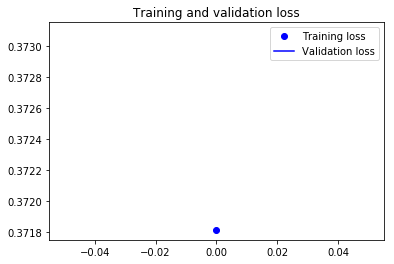

In [58]:
import matplotlib.pyplot as plt

loss_GRN = history_GRN.history['loss']
val_loss_GRN = history_GRN.history['val_loss']

epochs_GRN = range(len(loss_GRN))

plt.figure()

plt.plot(epochs_GRN, loss_GRN, 'bo', label='Training loss')
plt.plot(epochs_GRN, val_loss_GRN, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


from keras.models import load_model
model_GRN.save('C:\\Users\\bst\Documents\Big Project - time series forecasts with LSTM\Personal Proj 1 - SolarIrradianceFcst_GRN.h5')


### Add dropout to fight overfitting

In [59]:
# Using dropout to fight overfitting in GRN single layer model

model_GRN_dropout = Sequential()
model_GRN_dropout.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, df_np.shape[-1])))
model_GRN_dropout.add(layers.Dense(1))

model_GRN_dropout.compile(optimizer=RMSprop(), loss='mae')
history_GRN_dropout = model_GRN_dropout.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=1,   # to use 40 epochs when fitting for real
                              validation_data=val_gen,
                              validation_steps=val_steps)


Epoch 1/1


  1/500 [..............................] - ETA: 1038s - loss: 0.7340

  2/500 [..............................] - ETA: 796s - loss: 0.7513 

  3/500 [..............................] - ETA: 716s - loss: 0.7538

  4/500 [..............................] - ETA: 674s - loss: 0.7364

  5/500 [..............................] - ETA: 650s - loss: 0.7313

  6/500 [..............................] - ETA: 634s - loss: 0.7312

  7/500 [..............................] - ETA: 621s - loss: 0.7041

  8/500 [..............................] - ETA: 612s - loss: 0.6879

  9/500 [..............................] - ETA: 604s - loss: 0.6767

 10/500 [..............................] - ETA: 597s - loss: 0.6753

 11/500 [..............................] - ETA: 591s - loss: 0.6659

 12/500 [..............................] - ETA: 586s - loss: 0.6660

 13/500 [..............................] - ETA: 583s - loss: 0.6516

 14/500 [..............................] - ETA: 579s - loss: 0.6465

 15/500 [..............................] - ETA: 576s - loss: 0.6419

 16/500 [..............................] - ETA: 572s - loss: 0.6358

 17/500 [>.............................] - ETA: 570s - loss: 0.6313

 18/500 [>.............................] - ETA: 568s - loss: 0.6236

 19/500 [>.............................] - ETA: 565s - loss: 0.6178

 20/500 [>.............................] - ETA: 563s - loss: 0.6131

 21/500 [>.............................] - ETA: 561s - loss: 0.6041

 22/500 [>.............................] - ETA: 558s - loss: 0.5993

 23/500 [>.............................] - ETA: 556s - loss: 0.5931

 24/500 [>.............................] - ETA: 554s - loss: 0.5875

 25/500 [>.............................] - ETA: 552s - loss: 0.5830

 26/500 [>.............................] - ETA: 551s - loss: 0.5800

 27/500 [>.............................] - ETA: 549s - loss: 0.5758

 28/500 [>.............................] - ETA: 547s - loss: 0.5714

 29/500 [>.............................] - ETA: 546s - loss: 0.5680

 30/500 [>.............................] - ETA: 544s - loss: 0.5653

 31/500 [>.............................] - ETA: 542s - loss: 0.5623

 32/500 [>.............................] - ETA: 540s - loss: 0.5596

 33/500 [>.............................] - ETA: 539s - loss: 0.5565

 34/500 [=>............................] - ETA: 537s - loss: 0.5539

 35/500 [=>............................] - ETA: 536s - loss: 0.5518

 36/500 [=>............................] - ETA: 535s - loss: 0.5517

 37/500 [=>............................] - ETA: 533s - loss: 0.5507

 38/500 [=>............................] - ETA: 533s - loss: 0.5479

 39/500 [=>............................] - ETA: 533s - loss: 0.5467

 40/500 [=>............................] - ETA: 532s - loss: 0.5440

 41/500 [=>............................] - ETA: 531s - loss: 0.5417

 42/500 [=>............................] - ETA: 531s - loss: 0.5403

 43/500 [=>............................] - ETA: 531s - loss: 0.5403

 44/500 [=>............................] - ETA: 530s - loss: 0.5388

 45/500 [=>............................] - ETA: 530s - loss: 0.5356

 46/500 [=>............................] - ETA: 530s - loss: 0.5338

 47/500 [=>............................] - ETA: 530s - loss: 0.5329

 48/500 [=>............................] - ETA: 530s - loss: 0.5308

 49/500 [=>............................] - ETA: 530s - loss: 0.5291

 50/500 [==>...........................] - ETA: 529s - loss: 0.5275

 51/500 [==>...........................] - ETA: 529s - loss: 0.5257

 52/500 [==>...........................] - ETA: 529s - loss: 0.5248

 53/500 [==>...........................] - ETA: 528s - loss: 0.5231

 54/500 [==>...........................] - ETA: 526s - loss: 0.5226

 55/500 [==>...........................] - ETA: 525s - loss: 0.5213

 56/500 [==>...........................] - ETA: 523s - loss: 0.5196

 57/500 [==>...........................] - ETA: 521s - loss: 0.5174

 58/500 [==>...........................] - ETA: 520s - loss: 0.5168

 59/500 [==>...........................] - ETA: 518s - loss: 0.5162

 60/500 [==>...........................] - ETA: 517s - loss: 0.5159

 61/500 [==>...........................] - ETA: 516s - loss: 0.5148

 62/500 [==>...........................] - ETA: 515s - loss: 0.5141

 63/500 [==>...........................] - ETA: 515s - loss: 0.5138

 64/500 [==>...........................] - ETA: 514s - loss: 0.5133

 65/500 [==>...........................] - ETA: 513s - loss: 0.5122

 66/500 [==>...........................] - ETA: 513s - loss: 0.5113

 67/500 [===>..........................] - ETA: 512s - loss: 0.5107

 68/500 [===>..........................] - ETA: 511s - loss: 0.5085

 69/500 [===>..........................] - ETA: 510s - loss: 0.5076

 70/500 [===>..........................] - ETA: 509s - loss: 0.5073

 71/500 [===>..........................] - ETA: 508s - loss: 0.5061

 72/500 [===>..........................] - ETA: 507s - loss: 0.5050

 73/500 [===>..........................] - ETA: 506s - loss: 0.5046

 74/500 [===>..........................] - ETA: 505s - loss: 0.5038

 75/500 [===>..........................] - ETA: 504s - loss: 0.5029

 76/500 [===>..........................] - ETA: 502s - loss: 0.5027

 77/500 [===>..........................] - ETA: 502s - loss: 0.5014

 78/500 [===>..........................] - ETA: 501s - loss: 0.5009

 79/500 [===>..........................] - ETA: 500s - loss: 0.5001

 80/500 [===>..........................] - ETA: 499s - loss: 0.4991

 81/500 [===>..........................] - ETA: 498s - loss: 0.4982

 82/500 [===>..........................] - ETA: 497s - loss: 0.4982

 83/500 [===>..........................] - ETA: 495s - loss: 0.4980

 84/500 [====>.........................] - ETA: 494s - loss: 0.4983

 85/500 [====>.........................] - ETA: 492s - loss: 0.4974

 86/500 [====>.........................] - ETA: 491s - loss: 0.4972

 87/500 [====>.........................] - ETA: 489s - loss: 0.4967

 88/500 [====>.........................] - ETA: 488s - loss: 0.4963

 89/500 [====>.........................] - ETA: 487s - loss: 0.4955

 90/500 [====>.........................] - ETA: 485s - loss: 0.4950

 91/500 [====>.........................] - ETA: 484s - loss: 0.4947

 92/500 [====>.........................] - ETA: 482s - loss: 0.4943

 93/500 [====>.........................] - ETA: 481s - loss: 0.4939

 94/500 [====>.........................] - ETA: 480s - loss: 0.4938

 95/500 [====>.........................] - ETA: 478s - loss: 0.4931

 96/500 [====>.........................] - ETA: 477s - loss: 0.4927

 97/500 [====>.........................] - ETA: 475s - loss: 0.4928

 98/500 [====>.........................] - ETA: 474s - loss: 0.4923

 99/500 [====>.........................] - ETA: 473s - loss: 0.4915

100/500 [=====>........................] - ETA: 471s - loss: 0.4911

101/500 [=====>........................] - ETA: 470s - loss: 0.4908

102/500 [=====>........................] - ETA: 469s - loss: 0.4901

103/500 [=====>........................] - ETA: 467s - loss: 0.4899

104/500 [=====>........................] - ETA: 466s - loss: 0.4893

105/500 [=====>........................] - ETA: 465s - loss: 0.4886

106/500 [=====>........................] - ETA: 463s - loss: 0.4880

107/500 [=====>........................] - ETA: 462s - loss: 0.4870

108/500 [=====>........................] - ETA: 460s - loss: 0.4871

109/500 [=====>........................] - ETA: 459s - loss: 0.4873

110/500 [=====>........................] - ETA: 458s - loss: 0.4868

111/500 [=====>........................] - ETA: 456s - loss: 0.4864

112/500 [=====>........................] - ETA: 455s - loss: 0.4860

113/500 [=====>........................] - ETA: 454s - loss: 0.4859

114/500 [=====>........................] - ETA: 452s - loss: 0.4854

115/500 [=====>........................] - ETA: 451s - loss: 0.4852

116/500 [=====>........................] - ETA: 450s - loss: 0.4848

117/500 [======>.......................] - ETA: 448s - loss: 0.4843

118/500 [======>.......................] - ETA: 447s - loss: 0.4836

119/500 [======>.......................] - ETA: 446s - loss: 0.4841

120/500 [======>.......................] - ETA: 445s - loss: 0.4834

121/500 [======>.......................] - ETA: 443s - loss: 0.4831

122/500 [======>.......................] - ETA: 442s - loss: 0.4827

123/500 [======>.......................] - ETA: 441s - loss: 0.4825

124/500 [======>.......................] - ETA: 439s - loss: 0.4820

125/500 [======>.......................] - ETA: 438s - loss: 0.4821

126/500 [======>.......................] - ETA: 437s - loss: 0.4819

127/500 [======>.......................] - ETA: 436s - loss: 0.4818

128/500 [======>.......................] - ETA: 434s - loss: 0.4815

129/500 [======>.......................] - ETA: 433s - loss: 0.4813

130/500 [======>.......................] - ETA: 432s - loss: 0.4816

131/500 [======>.......................] - ETA: 430s - loss: 0.4812

132/500 [======>.......................] - ETA: 429s - loss: 0.4809

133/500 [======>.......................] - ETA: 428s - loss: 0.4805

134/500 [=======>......................] - ETA: 426s - loss: 0.4801

135/500 [=======>......................] - ETA: 425s - loss: 0.4797

136/500 [=======>......................] - ETA: 424s - loss: 0.4796

137/500 [=======>......................] - ETA: 423s - loss: 0.4793

138/500 [=======>......................] - ETA: 421s - loss: 0.4789

139/500 [=======>......................] - ETA: 420s - loss: 0.4788

140/500 [=======>......................] - ETA: 419s - loss: 0.4788

141/500 [=======>......................] - ETA: 418s - loss: 0.4789

142/500 [=======>......................] - ETA: 417s - loss: 0.4791

143/500 [=======>......................] - ETA: 415s - loss: 0.4786

144/500 [=======>......................] - ETA: 414s - loss: 0.4786

145/500 [=======>......................] - ETA: 413s - loss: 0.4784

146/500 [=======>......................] - ETA: 412s - loss: 0.4780

147/500 [=======>......................] - ETA: 411s - loss: 0.4776

148/500 [=======>......................] - ETA: 410s - loss: 0.4772

149/500 [=======>......................] - ETA: 409s - loss: 0.4772

150/500 [========>.....................] - ETA: 408s - loss: 0.4775

151/500 [========>.....................] - ETA: 406s - loss: 0.4774

152/500 [========>.....................] - ETA: 405s - loss: 0.4771

153/500 [========>.....................] - ETA: 404s - loss: 0.4764

154/500 [========>.....................] - ETA: 403s - loss: 0.4764

155/500 [========>.....................] - ETA: 401s - loss: 0.4763

156/500 [========>.....................] - ETA: 400s - loss: 0.4758

157/500 [========>.....................] - ETA: 399s - loss: 0.4756

158/500 [========>.....................] - ETA: 398s - loss: 0.4755

159/500 [========>.....................] - ETA: 397s - loss: 0.4748

160/500 [========>.....................] - ETA: 395s - loss: 0.4744

161/500 [========>.....................] - ETA: 394s - loss: 0.4745

162/500 [========>.....................] - ETA: 393s - loss: 0.4740

163/500 [========>.....................] - ETA: 392s - loss: 0.4735

164/500 [========>.....................] - ETA: 391s - loss: 0.4733

165/500 [========>.....................] - ETA: 389s - loss: 0.4731

166/500 [========>.....................] - ETA: 388s - loss: 0.4728

167/500 [=========>....................] - ETA: 387s - loss: 0.4724

168/500 [=========>....................] - ETA: 386s - loss: 0.4726

169/500 [=========>....................] - ETA: 384s - loss: 0.4725

170/500 [=========>....................] - ETA: 383s - loss: 0.4725

171/500 [=========>....................] - ETA: 382s - loss: 0.4724

172/500 [=========>....................] - ETA: 381s - loss: 0.4724

173/500 [=========>....................] - ETA: 380s - loss: 0.4721

174/500 [=========>....................] - ETA: 378s - loss: 0.4718

175/500 [=========>....................] - ETA: 377s - loss: 0.4719

176/500 [=========>....................] - ETA: 376s - loss: 0.4716

177/500 [=========>....................] - ETA: 375s - loss: 0.4716

178/500 [=========>....................] - ETA: 373s - loss: 0.4716

179/500 [=========>....................] - ETA: 372s - loss: 0.4717

180/500 [=========>....................] - ETA: 371s - loss: 0.4716

181/500 [=========>....................] - ETA: 370s - loss: 0.4716

182/500 [=========>....................] - ETA: 369s - loss: 0.4716

183/500 [=========>....................] - ETA: 367s - loss: 0.4715

184/500 [==========>...................] - ETA: 366s - loss: 0.4717

185/500 [==========>...................] - ETA: 365s - loss: 0.4712

186/500 [==========>...................] - ETA: 364s - loss: 0.4712

187/500 [==========>...................] - ETA: 363s - loss: 0.4713

188/500 [==========>...................] - ETA: 361s - loss: 0.4710

189/500 [==========>...................] - ETA: 360s - loss: 0.4708

190/500 [==========>...................] - ETA: 359s - loss: 0.4707

191/500 [==========>...................] - ETA: 358s - loss: 0.4705

192/500 [==========>...................] - ETA: 357s - loss: 0.4704

193/500 [==========>...................] - ETA: 355s - loss: 0.4701

194/500 [==========>...................] - ETA: 354s - loss: 0.4698

195/500 [==========>...................] - ETA: 353s - loss: 0.4700

196/500 [==========>...................] - ETA: 352s - loss: 0.4697

197/500 [==========>...................] - ETA: 351s - loss: 0.4695

198/500 [==========>...................] - ETA: 349s - loss: 0.4695

199/500 [==========>...................] - ETA: 348s - loss: 0.4696

200/500 [===========>..................] - ETA: 347s - loss: 0.4696

201/500 [===========>..................] - ETA: 346s - loss: 0.4692

202/500 [===========>..................] - ETA: 345s - loss: 0.4690

203/500 [===========>..................] - ETA: 343s - loss: 0.4686

204/500 [===========>..................] - ETA: 342s - loss: 0.4683

205/500 [===========>..................] - ETA: 341s - loss: 0.4680

206/500 [===========>..................] - ETA: 340s - loss: 0.4676

207/500 [===========>..................] - ETA: 339s - loss: 0.4676

208/500 [===========>..................] - ETA: 337s - loss: 0.4672

209/500 [===========>..................] - ETA: 336s - loss: 0.4670

210/500 [===========>..................] - ETA: 335s - loss: 0.4669

211/500 [===========>..................] - ETA: 334s - loss: 0.4668

212/500 [===========>..................] - ETA: 333s - loss: 0.4667

213/500 [===========>..................] - ETA: 332s - loss: 0.4668

214/500 [===========>..................] - ETA: 331s - loss: 0.4666

215/500 [===========>..................] - ETA: 330s - loss: 0.4663

216/500 [===========>..................] - ETA: 329s - loss: 0.4661

217/500 [============>.................] - ETA: 327s - loss: 0.4660

218/500 [============>.................] - ETA: 326s - loss: 0.4660

219/500 [============>.................] - ETA: 325s - loss: 0.4660

220/500 [============>.................] - ETA: 324s - loss: 0.4657

221/500 [============>.................] - ETA: 323s - loss: 0.4652

222/500 [============>.................] - ETA: 322s - loss: 0.4652

223/500 [============>.................] - ETA: 320s - loss: 0.4651

224/500 [============>.................] - ETA: 319s - loss: 0.4651

225/500 [============>.................] - ETA: 318s - loss: 0.4651

226/500 [============>.................] - ETA: 317s - loss: 0.4651

227/500 [============>.................] - ETA: 316s - loss: 0.4649

228/500 [============>.................] - ETA: 314s - loss: 0.4647

229/500 [============>.................] - ETA: 313s - loss: 0.4648

230/500 [============>.................] - ETA: 312s - loss: 0.4646

231/500 [============>.................] - ETA: 311s - loss: 0.4647

232/500 [============>.................] - ETA: 310s - loss: 0.4644

233/500 [============>.................] - ETA: 309s - loss: 0.4645

234/500 [=============>................] - ETA: 307s - loss: 0.4643

235/500 [=============>................] - ETA: 306s - loss: 0.4640

236/500 [=============>................] - ETA: 305s - loss: 0.4636

237/500 [=============>................] - ETA: 304s - loss: 0.4633

238/500 [=============>................] - ETA: 303s - loss: 0.4633

239/500 [=============>................] - ETA: 302s - loss: 0.4635

240/500 [=============>................] - ETA: 301s - loss: 0.4634

241/500 [=============>................] - ETA: 299s - loss: 0.4633

242/500 [=============>................] - ETA: 298s - loss: 0.4631

243/500 [=============>................] - ETA: 297s - loss: 0.4630

244/500 [=============>................] - ETA: 296s - loss: 0.4629

245/500 [=============>................] - ETA: 295s - loss: 0.4628

246/500 [=============>................] - ETA: 294s - loss: 0.4626

247/500 [=============>................] - ETA: 292s - loss: 0.4623

248/500 [=============>................] - ETA: 291s - loss: 0.4622

249/500 [=============>................] - ETA: 290s - loss: 0.4621

250/500 [==============>...............] - ETA: 289s - loss: 0.4622

251/500 [==============>...............] - ETA: 288s - loss: 0.4622

252/500 [==============>...............] - ETA: 287s - loss: 0.4623

253/500 [==============>...............] - ETA: 286s - loss: 0.4621

254/500 [==============>...............] - ETA: 284s - loss: 0.4620

255/500 [==============>...............] - ETA: 283s - loss: 0.4618

256/500 [==============>...............] - ETA: 282s - loss: 0.4615

257/500 [==============>...............] - ETA: 281s - loss: 0.4614

258/500 [==============>...............] - ETA: 280s - loss: 0.4614

259/500 [==============>...............] - ETA: 279s - loss: 0.4611

260/500 [==============>...............] - ETA: 278s - loss: 0.4611

261/500 [==============>...............] - ETA: 277s - loss: 0.4610

262/500 [==============>...............] - ETA: 275s - loss: 0.4611

263/500 [==============>...............] - ETA: 274s - loss: 0.4611

264/500 [==============>...............] - ETA: 273s - loss: 0.4609

265/500 [==============>...............] - ETA: 272s - loss: 0.4609

266/500 [==============>...............] - ETA: 271s - loss: 0.4605

267/500 [===============>..............] - ETA: 270s - loss: 0.4608

268/500 [===============>..............] - ETA: 268s - loss: 0.4606

269/500 [===============>..............] - ETA: 267s - loss: 0.4606

270/500 [===============>..............] - ETA: 266s - loss: 0.4606

271/500 [===============>..............] - ETA: 265s - loss: 0.4607

272/500 [===============>..............] - ETA: 264s - loss: 0.4608

273/500 [===============>..............] - ETA: 263s - loss: 0.4605

274/500 [===============>..............] - ETA: 262s - loss: 0.4602

275/500 [===============>..............] - ETA: 261s - loss: 0.4600

276/500 [===============>..............] - ETA: 259s - loss: 0.4600

277/500 [===============>..............] - ETA: 258s - loss: 0.4598

278/500 [===============>..............] - ETA: 257s - loss: 0.4597

279/500 [===============>..............] - ETA: 256s - loss: 0.4599

280/500 [===============>..............] - ETA: 255s - loss: 0.4598

281/500 [===============>..............] - ETA: 253s - loss: 0.4596

282/500 [===============>..............] - ETA: 252s - loss: 0.4595

283/500 [===============>..............] - ETA: 251s - loss: 0.4594

284/500 [================>.............] - ETA: 250s - loss: 0.4593

285/500 [================>.............] - ETA: 249s - loss: 0.4592

286/500 [================>.............] - ETA: 248s - loss: 0.4592

287/500 [================>.............] - ETA: 246s - loss: 0.4593

288/500 [================>.............] - ETA: 245s - loss: 0.4593

289/500 [================>.............] - ETA: 244s - loss: 0.4593

290/500 [================>.............] - ETA: 243s - loss: 0.4591

291/500 [================>.............] - ETA: 242s - loss: 0.4590

292/500 [================>.............] - ETA: 241s - loss: 0.4588

293/500 [================>.............] - ETA: 239s - loss: 0.4590

294/500 [================>.............] - ETA: 238s - loss: 0.4589

295/500 [================>.............] - ETA: 237s - loss: 0.4590

296/500 [================>.............] - ETA: 236s - loss: 0.4591

297/500 [================>.............] - ETA: 235s - loss: 0.4591

298/500 [================>.............] - ETA: 234s - loss: 0.4593

299/500 [================>.............] - ETA: 232s - loss: 0.4592

300/500 [=================>............] - ETA: 231s - loss: 0.4590

301/500 [=================>............] - ETA: 230s - loss: 0.4590

302/500 [=================>............] - ETA: 229s - loss: 0.4590

303/500 [=================>............] - ETA: 228s - loss: 0.4588

304/500 [=================>............] - ETA: 226s - loss: 0.4587

305/500 [=================>............] - ETA: 225s - loss: 0.4586

306/500 [=================>............] - ETA: 224s - loss: 0.4586

307/500 [=================>............] - ETA: 223s - loss: 0.4587

308/500 [=================>............] - ETA: 222s - loss: 0.4587

309/500 [=================>............] - ETA: 221s - loss: 0.4585

310/500 [=================>............] - ETA: 219s - loss: 0.4585

311/500 [=================>............] - ETA: 218s - loss: 0.4584

312/500 [=================>............] - ETA: 217s - loss: 0.4583

313/500 [=================>............] - ETA: 216s - loss: 0.4583

314/500 [=================>............] - ETA: 215s - loss: 0.4584

315/500 [=================>............] - ETA: 214s - loss: 0.4582

316/500 [=================>............] - ETA: 212s - loss: 0.4581

317/500 [==================>...........] - ETA: 211s - loss: 0.4583

318/500 [==================>...........] - ETA: 210s - loss: 0.4584

319/500 [==================>...........] - ETA: 209s - loss: 0.4584

320/500 [==================>...........] - ETA: 208s - loss: 0.4584

321/500 [==================>...........] - ETA: 207s - loss: 0.4581

322/500 [==================>...........] - ETA: 205s - loss: 0.4581

323/500 [==================>...........] - ETA: 204s - loss: 0.4580

324/500 [==================>...........] - ETA: 203s - loss: 0.4579

325/500 [==================>...........] - ETA: 202s - loss: 0.4579

326/500 [==================>...........] - ETA: 201s - loss: 0.4578

327/500 [==================>...........] - ETA: 200s - loss: 0.4577

328/500 [==================>...........] - ETA: 198s - loss: 0.4577

329/500 [==================>...........] - ETA: 197s - loss: 0.4578

330/500 [==================>...........] - ETA: 196s - loss: 0.4576

331/500 [==================>...........] - ETA: 195s - loss: 0.4577

332/500 [==================>...........] - ETA: 194s - loss: 0.4576

333/500 [==================>...........] - ETA: 193s - loss: 0.4575

334/500 [===================>..........] - ETA: 191s - loss: 0.4575

335/500 [===================>..........] - ETA: 190s - loss: 0.4574

336/500 [===================>..........] - ETA: 189s - loss: 0.4575

337/500 [===================>..........] - ETA: 188s - loss: 0.4574

338/500 [===================>..........] - ETA: 187s - loss: 0.4573

339/500 [===================>..........] - ETA: 186s - loss: 0.4574

340/500 [===================>..........] - ETA: 184s - loss: 0.4573

341/500 [===================>..........] - ETA: 183s - loss: 0.4572

342/500 [===================>..........] - ETA: 182s - loss: 0.4574

343/500 [===================>..........] - ETA: 181s - loss: 0.4575

344/500 [===================>..........] - ETA: 180s - loss: 0.4574

345/500 [===================>..........] - ETA: 179s - loss: 0.4574

346/500 [===================>..........] - ETA: 177s - loss: 0.4573

347/500 [===================>..........] - ETA: 176s - loss: 0.4573

348/500 [===================>..........] - ETA: 175s - loss: 0.4573

349/500 [===================>..........] - ETA: 174s - loss: 0.4573

350/500 [====================>.........] - ETA: 173s - loss: 0.4576

351/500 [====================>.........] - ETA: 172s - loss: 0.4577

352/500 [====================>.........] - ETA: 170s - loss: 0.4578

353/500 [====================>.........] - ETA: 169s - loss: 0.4576

354/500 [====================>.........] - ETA: 168s - loss: 0.4577

355/500 [====================>.........] - ETA: 167s - loss: 0.4575

356/500 [====================>.........] - ETA: 166s - loss: 0.4574

357/500 [====================>.........] - ETA: 165s - loss: 0.4574

358/500 [====================>.........] - ETA: 164s - loss: 0.4574

359/500 [====================>.........] - ETA: 162s - loss: 0.4574

360/500 [====================>.........] - ETA: 161s - loss: 0.4575

361/500 [====================>.........] - ETA: 160s - loss: 0.4576

362/500 [====================>.........] - ETA: 159s - loss: 0.4577

363/500 [====================>.........] - ETA: 158s - loss: 0.4577

364/500 [====================>.........] - ETA: 157s - loss: 0.4577

365/500 [====================>.........] - ETA: 155s - loss: 0.4575

366/500 [====================>.........] - ETA: 154s - loss: 0.4576

367/500 [=====================>........] - ETA: 153s - loss: 0.4576

368/500 [=====================>........] - ETA: 152s - loss: 0.4576

369/500 [=====================>........] - ETA: 151s - loss: 0.4578

370/500 [=====================>........] - ETA: 150s - loss: 0.4578

371/500 [=====================>........] - ETA: 148s - loss: 0.4578

372/500 [=====================>........] - ETA: 147s - loss: 0.4577

373/500 [=====================>........] - ETA: 146s - loss: 0.4576

374/500 [=====================>........] - ETA: 145s - loss: 0.4574

375/500 [=====================>........] - ETA: 144s - loss: 0.4573

376/500 [=====================>........] - ETA: 143s - loss: 0.4571

377/500 [=====================>........] - ETA: 141s - loss: 0.4570

378/500 [=====================>........] - ETA: 140s - loss: 0.4569

379/500 [=====================>........] - ETA: 139s - loss: 0.4569

380/500 [=====================>........] - ETA: 138s - loss: 0.4567

381/500 [=====================>........] - ETA: 137s - loss: 0.4566

382/500 [=====================>........] - ETA: 136s - loss: 0.4565

383/500 [=====================>........] - ETA: 135s - loss: 0.4565

384/500 [======================>.......] - ETA: 133s - loss: 0.4565

385/500 [======================>.......] - ETA: 132s - loss: 0.4565

386/500 [======================>.......] - ETA: 131s - loss: 0.4565

387/500 [======================>.......] - ETA: 130s - loss: 0.4564

388/500 [======================>.......] - ETA: 129s - loss: 0.4564

389/500 [======================>.......] - ETA: 128s - loss: 0.4566

390/500 [======================>.......] - ETA: 126s - loss: 0.4566

391/500 [======================>.......] - ETA: 125s - loss: 0.4565

392/500 [======================>.......] - ETA: 124s - loss: 0.4567

393/500 [======================>.......] - ETA: 123s - loss: 0.4565

394/500 [======================>.......] - ETA: 122s - loss: 0.4564

395/500 [======================>.......] - ETA: 121s - loss: 0.4565

396/500 [======================>.......] - ETA: 119s - loss: 0.4565

397/500 [======================>.......] - ETA: 118s - loss: 0.4564

398/500 [======================>.......] - ETA: 117s - loss: 0.4563

399/500 [======================>.......] - ETA: 116s - loss: 0.4562

400/500 [=======================>......] - ETA: 115s - loss: 0.4563

401/500 [=======================>......] - ETA: 114s - loss: 0.4563

402/500 [=======================>......] - ETA: 113s - loss: 0.4563

403/500 [=======================>......] - ETA: 111s - loss: 0.4563

404/500 [=======================>......] - ETA: 110s - loss: 0.4565

405/500 [=======================>......] - ETA: 109s - loss: 0.4564

406/500 [=======================>......] - ETA: 108s - loss: 0.4565

407/500 [=======================>......] - ETA: 107s - loss: 0.4563

408/500 [=======================>......] - ETA: 106s - loss: 0.4562

409/500 [=======================>......] - ETA: 104s - loss: 0.4562

410/500 [=======================>......] - ETA: 103s - loss: 0.4562

411/500 [=======================>......] - ETA: 102s - loss: 0.4562

412/500 [=======================>......] - ETA: 101s - loss: 0.4563

413/500 [=======================>......] - ETA: 100s - loss: 0.4564

414/500 [=======================>......] - ETA: 99s - loss: 0.4564 

415/500 [=======================>......] - ETA: 98s - loss: 0.4564

416/500 [=======================>......] - ETA: 96s - loss: 0.4563

417/500 [========================>.....] - ETA: 95s - loss: 0.4565

418/500 [========================>.....] - ETA: 94s - loss: 0.4564

419/500 [========================>.....] - ETA: 93s - loss: 0.4564

420/500 [========================>.....] - ETA: 92s - loss: 0.4564

421/500 [========================>.....] - ETA: 91s - loss: 0.4563

422/500 [========================>.....] - ETA: 89s - loss: 0.4563

423/500 [========================>.....] - ETA: 88s - loss: 0.4564

424/500 [========================>.....] - ETA: 87s - loss: 0.4564

425/500 [========================>.....] - ETA: 86s - loss: 0.4562

426/500 [========================>.....] - ETA: 85s - loss: 0.4561

427/500 [========================>.....] - ETA: 84s - loss: 0.4562

428/500 [========================>.....] - ETA: 83s - loss: 0.4561

429/500 [========================>.....] - ETA: 81s - loss: 0.4561

430/500 [========================>.....] - ETA: 80s - loss: 0.4560

431/500 [========================>.....] - ETA: 79s - loss: 0.4559

432/500 [========================>.....] - ETA: 78s - loss: 0.4559

433/500 [========================>.....] - ETA: 77s - loss: 0.4559

434/500 [=========================>....] - ETA: 76s - loss: 0.4559

435/500 [=========================>....] - ETA: 74s - loss: 0.4559

436/500 [=========================>....] - ETA: 73s - loss: 0.4559

437/500 [=========================>....] - ETA: 72s - loss: 0.4559

438/500 [=========================>....] - ETA: 71s - loss: 0.4559

439/500 [=========================>....] - ETA: 70s - loss: 0.4559

440/500 [=========================>....] - ETA: 69s - loss: 0.4559

441/500 [=========================>....] - ETA: 67s - loss: 0.4558

442/500 [=========================>....] - ETA: 66s - loss: 0.4557

443/500 [=========================>....] - ETA: 65s - loss: 0.4557

444/500 [=========================>....] - ETA: 64s - loss: 0.4556

445/500 [=========================>....] - ETA: 63s - loss: 0.4556

446/500 [=========================>....] - ETA: 62s - loss: 0.4556

447/500 [=========================>....] - ETA: 61s - loss: 0.4557

448/500 [=========================>....] - ETA: 59s - loss: 0.4557

449/500 [=========================>....] - ETA: 58s - loss: 0.4557

450/500 [==========================>...] - ETA: 57s - loss: 0.4557

451/500 [==========================>...] - ETA: 56s - loss: 0.4558

452/500 [==========================>...] - ETA: 55s - loss: 0.4559

453/500 [==========================>...] - ETA: 54s - loss: 0.4559

454/500 [==========================>...] - ETA: 53s - loss: 0.4560

455/500 [==========================>...] - ETA: 51s - loss: 0.4559

456/500 [==========================>...] - ETA: 50s - loss: 0.4559

457/500 [==========================>...] - ETA: 49s - loss: 0.4559

458/500 [==========================>...] - ETA: 48s - loss: 0.4558

459/500 [==========================>...] - ETA: 47s - loss: 0.4559

460/500 [==========================>...] - ETA: 46s - loss: 0.4557

461/500 [==========================>...] - ETA: 44s - loss: 0.4556

462/500 [==========================>...] - ETA: 43s - loss: 0.4555

463/500 [==========================>...] - ETA: 42s - loss: 0.4556

464/500 [==========================>...] - ETA: 41s - loss: 0.4556

465/500 [==========================>...] - ETA: 40s - loss: 0.4556

466/500 [==========================>...] - ETA: 39s - loss: 0.4557

467/500 [===========================>..] - ETA: 38s - loss: 0.4556

468/500 [===========================>..] - ETA: 36s - loss: 0.4556

469/500 [===========================>..] - ETA: 35s - loss: 0.4556

470/500 [===========================>..] - ETA: 34s - loss: 0.4556

471/500 [===========================>..] - ETA: 33s - loss: 0.4555

472/500 [===========================>..] - ETA: 32s - loss: 0.4557

473/500 [===========================>..] - ETA: 31s - loss: 0.4556

474/500 [===========================>..] - ETA: 29s - loss: 0.4556

475/500 [===========================>..] - ETA: 28s - loss: 0.4557

476/500 [===========================>..] - ETA: 27s - loss: 0.4558

477/500 [===========================>..] - ETA: 26s - loss: 0.4556

478/500 [===========================>..] - ETA: 25s - loss: 0.4555

479/500 [===========================>..] - ETA: 24s - loss: 0.4554

480/500 [===========================>..] - ETA: 23s - loss: 0.4554

481/500 [===========================>..] - ETA: 21s - loss: 0.4553

482/500 [===========================>..] - ETA: 20s - loss: 0.4554

483/500 [===========================>..] - ETA: 19s - loss: 0.4554

484/500 [============================>.] - ETA: 18s - loss: 0.4555

485/500 [============================>.] - ETA: 17s - loss: 0.4555

486/500 [============================>.] - ETA: 16s - loss: 0.4556

487/500 [============================>.] - ETA: 14s - loss: 0.4556

488/500 [============================>.] - ETA: 13s - loss: 0.4555

489/500 [============================>.] - ETA: 12s - loss: 0.4554

490/500 [============================>.] - ETA: 11s - loss: 0.4552

491/500 [============================>.] - ETA: 10s - loss: 0.4552

492/500 [============================>.] - ETA: 9s - loss: 0.4552 

493/500 [============================>.] - ETA: 8s - loss: 0.4552

494/500 [============================>.] - ETA: 6s - loss: 0.4552

495/500 [============================>.] - ETA: 5s - loss: 0.4552

496/500 [============================>.] - ETA: 4s - loss: 0.4552

497/500 [============================>.] - ETA: 3s - loss: 0.4552

498/500 [============================>.] - ETA: 2s - loss: 0.4551

499/500 [============================>.] - ETA: 1s - loss: 0.4551

500/500 [==============================] - 659s - loss: 0.4549 - val_loss: 0.3776

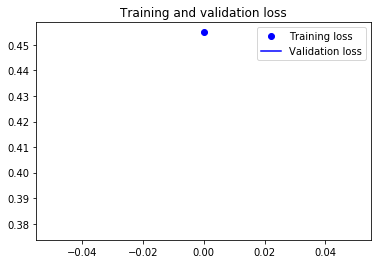

In [60]:
# To visualize the model performance for GRN with dropout
loss_GRN_dropout = history_GRN_dropout.history['loss']
val_loss_GRN_dropout = history_GRN_dropout.history['val_loss']

epochs_GRN_dropout = range(len(loss_GRN_dropout))

plt.figure()

plt.plot(epochs_GRN_dropout, loss_GRN_dropout, 'bo', label='Training loss')
plt.plot(epochs_GRN_dropout, val_loss_GRN_dropout, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

from keras.models import load_model
model_GRN_dropout.save('C:\\Users\\bst\Documents\Big Project - time series forecasts with LSTM\Personal Proj 1 - SolarIrradianceFcst_GRN_dropout.h5')


### To stack layers on the model

In [61]:
# To stack recurrent layers on last model
model_GRN_dropout_stacked = Sequential()
model_GRN_dropout_stacked.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, df_np.shape[-1])))
model_GRN_dropout_stacked.add(layers.GRU(64, activation='relu',
                     dropout=0.1, 
                     recurrent_dropout=0.5))
model_GRN_dropout_stacked.add(layers.Dense(1))

model_GRN_dropout_stacked.compile(optimizer=RMSprop(), loss='mae')
history_GRN_dropout_stacked = model_GRN_dropout_stacked.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=1,  # to use 40 epochs when fitting for real
                              validation_data=val_gen,
                              validation_steps=val_steps)


Epoch 1/1


  1/500 [..............................] - ETA: 2427s - loss: 0.8156

  2/500 [..............................] - ETA: 2063s - loss: 0.7599

  3/500 [..............................] - ETA: 1938s - loss: 0.7259

  4/500 [..............................] - ETA: 1887s - loss: 0.6903

  5/500 [..............................] - ETA: 1875s - loss: 0.6686

  6/500 [..............................] - ETA: 1841s - loss: 0.6557

  7/500 [..............................] - ETA: 1822s - loss: 0.6313

  8/500 [..............................] - ETA: 1802s - loss: 0.6158

  9/500 [..............................] - ETA: 1779s - loss: 0.6037

 10/500 [..............................] - ETA: 1768s - loss: 0.5894

 11/500 [..............................] - ETA: 1760s - loss: 0.5713

 12/500 [..............................] - ETA: 1747s - loss: 0.5610

 13/500 [..............................] - ETA: 1735s - loss: 0.5571

 14/500 [..............................] - ETA: 1724s - loss: 0.5485

 15/500 [..............................] - ETA: 1715s - loss: 0.5411

 16/500 [..............................] - ETA: 1707s - loss: 0.5339

 17/500 [>.............................] - ETA: 1699s - loss: 0.5282

 18/500 [>.............................] - ETA: 1692s - loss: 0.5237

 19/500 [>.............................] - ETA: 1684s - loss: 0.5208

 20/500 [>.............................] - ETA: 1677s - loss: 0.5182

 21/500 [>.............................] - ETA: 1671s - loss: 0.5121

 22/500 [>.............................] - ETA: 1663s - loss: 0.5076

 23/500 [>.............................] - ETA: 1657s - loss: 0.5027

 24/500 [>.............................] - ETA: 1651s - loss: 0.5014

 25/500 [>.............................] - ETA: 1644s - loss: 0.4992

 26/500 [>.............................] - ETA: 1640s - loss: 0.4959

 27/500 [>.............................] - ETA: 1635s - loss: 0.4925

 28/500 [>.............................] - ETA: 1630s - loss: 0.4900

 29/500 [>.............................] - ETA: 1624s - loss: 0.4895

 30/500 [>.............................] - ETA: 1619s - loss: 0.4873

 31/500 [>.............................] - ETA: 1614s - loss: 0.4855

 32/500 [>.............................] - ETA: 1611s - loss: 0.4830

 33/500 [>.............................] - ETA: 1609s - loss: 0.4809

 34/500 [=>............................] - ETA: 1606s - loss: 0.4803

 35/500 [=>............................] - ETA: 1604s - loss: 0.4783

 36/500 [=>............................] - ETA: 1605s - loss: 0.4774

 37/500 [=>............................] - ETA: 1605s - loss: 0.4756

 38/500 [=>............................] - ETA: 1605s - loss: 0.4742

 39/500 [=>............................] - ETA: 1602s - loss: 0.4717

 40/500 [=>............................] - ETA: 1598s - loss: 0.4700

 41/500 [=>............................] - ETA: 1593s - loss: 0.4689

 42/500 [=>............................] - ETA: 1587s - loss: 0.4676

 43/500 [=>............................] - ETA: 1582s - loss: 0.4663

 44/500 [=>............................] - ETA: 1578s - loss: 0.4655

 45/500 [=>............................] - ETA: 1573s - loss: 0.4653

 46/500 [=>............................] - ETA: 1568s - loss: 0.4647

 47/500 [=>............................] - ETA: 1563s - loss: 0.4647

 48/500 [=>............................] - ETA: 1563s - loss: 0.4638

 49/500 [=>............................] - ETA: 1561s - loss: 0.4624

 50/500 [==>...........................] - ETA: 1560s - loss: 0.4598

 51/500 [==>...........................] - ETA: 1558s - loss: 0.4597

 52/500 [==>...........................] - ETA: 1555s - loss: 0.4586

 53/500 [==>...........................] - ETA: 1551s - loss: 0.4578

 54/500 [==>...........................] - ETA: 1546s - loss: 0.4569

 55/500 [==>...........................] - ETA: 1541s - loss: 0.4561

 56/500 [==>...........................] - ETA: 1536s - loss: 0.4550

 57/500 [==>...........................] - ETA: 1531s - loss: 0.4541

 58/500 [==>...........................] - ETA: 1526s - loss: 0.4534

 59/500 [==>...........................] - ETA: 1521s - loss: 0.4529

 60/500 [==>...........................] - ETA: 1516s - loss: 0.4531

 61/500 [==>...........................] - ETA: 1511s - loss: 0.4519

 62/500 [==>...........................] - ETA: 1506s - loss: 0.4514

 63/500 [==>...........................] - ETA: 1502s - loss: 0.4516

 64/500 [==>...........................] - ETA: 1497s - loss: 0.4502

 65/500 [==>...........................] - ETA: 1493s - loss: 0.4494

 66/500 [==>...........................] - ETA: 1488s - loss: 0.4493

 67/500 [===>..........................] - ETA: 1483s - loss: 0.4491

 68/500 [===>..........................] - ETA: 1479s - loss: 0.4488

 69/500 [===>..........................] - ETA: 1474s - loss: 0.4483

 70/500 [===>..........................] - ETA: 1470s - loss: 0.4485

 71/500 [===>..........................] - ETA: 1466s - loss: 0.4482

 72/500 [===>..........................] - ETA: 1461s - loss: 0.4482

 73/500 [===>..........................] - ETA: 1457s - loss: 0.4486

 74/500 [===>..........................] - ETA: 1453s - loss: 0.4485

 75/500 [===>..........................] - ETA: 1448s - loss: 0.4480

 76/500 [===>..........................] - ETA: 1444s - loss: 0.4471

 77/500 [===>..........................] - ETA: 1440s - loss: 0.4473

 78/500 [===>..........................] - ETA: 1436s - loss: 0.4473

 79/500 [===>..........................] - ETA: 1431s - loss: 0.4465

 80/500 [===>..........................] - ETA: 1427s - loss: 0.4460

 81/500 [===>..........................] - ETA: 1423s - loss: 0.4461

 82/500 [===>..........................] - ETA: 1419s - loss: 0.4460

 83/500 [===>..........................] - ETA: 1415s - loss: 0.4454

 84/500 [====>.........................] - ETA: 1411s - loss: 0.4452

 85/500 [====>.........................] - ETA: 1407s - loss: 0.4453

 86/500 [====>.........................] - ETA: 1403s - loss: 0.4448

 87/500 [====>.........................] - ETA: 1399s - loss: 0.4440

 88/500 [====>.........................] - ETA: 1395s - loss: 0.4432

 89/500 [====>.........................] - ETA: 1391s - loss: 0.4432

 90/500 [====>.........................] - ETA: 1387s - loss: 0.4429

 91/500 [====>.........................] - ETA: 1383s - loss: 0.4429

 92/500 [====>.........................] - ETA: 1379s - loss: 0.4419

 93/500 [====>.........................] - ETA: 1375s - loss: 0.4413

 94/500 [====>.........................] - ETA: 1371s - loss: 0.4410

 95/500 [====>.........................] - ETA: 1367s - loss: 0.4404

 96/500 [====>.........................] - ETA: 1364s - loss: 0.4400

 97/500 [====>.........................] - ETA: 1360s - loss: 0.4398

 98/500 [====>.........................] - ETA: 1356s - loss: 0.4396

 99/500 [====>.........................] - ETA: 1353s - loss: 0.4389

100/500 [=====>........................] - ETA: 1349s - loss: 0.4388

101/500 [=====>........................] - ETA: 1345s - loss: 0.4385

102/500 [=====>........................] - ETA: 1341s - loss: 0.4382

103/500 [=====>........................] - ETA: 1337s - loss: 0.4380

104/500 [=====>........................] - ETA: 1333s - loss: 0.4378

105/500 [=====>........................] - ETA: 1330s - loss: 0.4376

106/500 [=====>........................] - ETA: 1326s - loss: 0.4379

107/500 [=====>........................] - ETA: 1322s - loss: 0.4381

108/500 [=====>........................] - ETA: 1319s - loss: 0.4380

109/500 [=====>........................] - ETA: 1315s - loss: 0.4376

110/500 [=====>........................] - ETA: 1311s - loss: 0.4373

111/500 [=====>........................] - ETA: 1307s - loss: 0.4373

112/500 [=====>........................] - ETA: 1304s - loss: 0.4370

113/500 [=====>........................] - ETA: 1300s - loss: 0.4369

114/500 [=====>........................] - ETA: 1296s - loss: 0.4367

115/500 [=====>........................] - ETA: 1293s - loss: 0.4368

116/500 [=====>........................] - ETA: 1289s - loss: 0.4368

117/500 [======>.......................] - ETA: 1285s - loss: 0.4365

118/500 [======>.......................] - ETA: 1282s - loss: 0.4364

119/500 [======>.......................] - ETA: 1278s - loss: 0.4358

120/500 [======>.......................] - ETA: 1274s - loss: 0.4355

121/500 [======>.......................] - ETA: 1271s - loss: 0.4350

122/500 [======>.......................] - ETA: 1267s - loss: 0.4349

123/500 [======>.......................] - ETA: 1264s - loss: 0.4349

124/500 [======>.......................] - ETA: 1260s - loss: 0.4349

125/500 [======>.......................] - ETA: 1256s - loss: 0.4344

126/500 [======>.......................] - ETA: 1253s - loss: 0.4341

127/500 [======>.......................] - ETA: 1249s - loss: 0.4339

128/500 [======>.......................] - ETA: 1246s - loss: 0.4337

129/500 [======>.......................] - ETA: 1242s - loss: 0.4333

130/500 [======>.......................] - ETA: 1239s - loss: 0.4328

131/500 [======>.......................] - ETA: 1235s - loss: 0.4329

132/500 [======>.......................] - ETA: 1231s - loss: 0.4329

133/500 [======>.......................] - ETA: 1228s - loss: 0.4328

134/500 [=======>......................] - ETA: 1224s - loss: 0.4328

135/500 [=======>......................] - ETA: 1221s - loss: 0.4326

136/500 [=======>......................] - ETA: 1217s - loss: 0.4323

137/500 [=======>......................] - ETA: 1214s - loss: 0.4321

138/500 [=======>......................] - ETA: 1210s - loss: 0.4320

139/500 [=======>......................] - ETA: 1206s - loss: 0.4314

140/500 [=======>......................] - ETA: 1203s - loss: 0.4316

141/500 [=======>......................] - ETA: 1199s - loss: 0.4317

142/500 [=======>......................] - ETA: 1196s - loss: 0.4314

143/500 [=======>......................] - ETA: 1192s - loss: 0.4312

144/500 [=======>......................] - ETA: 1189s - loss: 0.4312

145/500 [=======>......................] - ETA: 1185s - loss: 0.4312

146/500 [=======>......................] - ETA: 1182s - loss: 0.4307

147/500 [=======>......................] - ETA: 1178s - loss: 0.4303

148/500 [=======>......................] - ETA: 1175s - loss: 0.4303

149/500 [=======>......................] - ETA: 1171s - loss: 0.4302

150/500 [========>.....................] - ETA: 1167s - loss: 0.4302

151/500 [========>.....................] - ETA: 1164s - loss: 0.4299

152/500 [========>.....................] - ETA: 1160s - loss: 0.4300

153/500 [========>.....................] - ETA: 1157s - loss: 0.4297

154/500 [========>.....................] - ETA: 1154s - loss: 0.4294

155/500 [========>.....................] - ETA: 1150s - loss: 0.4293

156/500 [========>.....................] - ETA: 1147s - loss: 0.4290

157/500 [========>.....................] - ETA: 1143s - loss: 0.4291

158/500 [========>.....................] - ETA: 1140s - loss: 0.4292

159/500 [========>.....................] - ETA: 1136s - loss: 0.4289

160/500 [========>.....................] - ETA: 1133s - loss: 0.4288

161/500 [========>.....................] - ETA: 1129s - loss: 0.4283

162/500 [========>.....................] - ETA: 1126s - loss: 0.4281

163/500 [========>.....................] - ETA: 1122s - loss: 0.4280

164/500 [========>.....................] - ETA: 1119s - loss: 0.4279

165/500 [========>.....................] - ETA: 1115s - loss: 0.4277

166/500 [========>.....................] - ETA: 1112s - loss: 0.4275

167/500 [=========>....................] - ETA: 1108s - loss: 0.4275

168/500 [=========>....................] - ETA: 1105s - loss: 0.4274

169/500 [=========>....................] - ETA: 1101s - loss: 0.4272

170/500 [=========>....................] - ETA: 1098s - loss: 0.4273

171/500 [=========>....................] - ETA: 1094s - loss: 0.4271

172/500 [=========>....................] - ETA: 1091s - loss: 0.4273

173/500 [=========>....................] - ETA: 1088s - loss: 0.4273

174/500 [=========>....................] - ETA: 1084s - loss: 0.4271

175/500 [=========>....................] - ETA: 1081s - loss: 0.4268

176/500 [=========>....................] - ETA: 1077s - loss: 0.4267

177/500 [=========>....................] - ETA: 1074s - loss: 0.4270

178/500 [=========>....................] - ETA: 1071s - loss: 0.4269

179/500 [=========>....................] - ETA: 1067s - loss: 0.4270

180/500 [=========>....................] - ETA: 1064s - loss: 0.4265

181/500 [=========>....................] - ETA: 1060s - loss: 0.4262

182/500 [=========>....................] - ETA: 1057s - loss: 0.4260

183/500 [=========>....................] - ETA: 1053s - loss: 0.4259

184/500 [==========>...................] - ETA: 1050s - loss: 0.4257

185/500 [==========>...................] - ETA: 1047s - loss: 0.4259

186/500 [==========>...................] - ETA: 1043s - loss: 0.4256

187/500 [==========>...................] - ETA: 1040s - loss: 0.4257

188/500 [==========>...................] - ETA: 1037s - loss: 0.4255

189/500 [==========>...................] - ETA: 1033s - loss: 0.4254

190/500 [==========>...................] - ETA: 1030s - loss: 0.4252

191/500 [==========>...................] - ETA: 1026s - loss: 0.4251

192/500 [==========>...................] - ETA: 1023s - loss: 0.4250

193/500 [==========>...................] - ETA: 1019s - loss: 0.4250

194/500 [==========>...................] - ETA: 1016s - loss: 0.4248

195/500 [==========>...................] - ETA: 1013s - loss: 0.4244

196/500 [==========>...................] - ETA: 1009s - loss: 0.4249

197/500 [==========>...................] - ETA: 1006s - loss: 0.4247

198/500 [==========>...................] - ETA: 1002s - loss: 0.4248

199/500 [==========>...................] - ETA: 999s - loss: 0.4242 

200/500 [===========>..................] - ETA: 996s - loss: 0.4241

201/500 [===========>..................] - ETA: 992s - loss: 0.4239

202/500 [===========>..................] - ETA: 989s - loss: 0.4237

203/500 [===========>..................] - ETA: 985s - loss: 0.4235

204/500 [===========>..................] - ETA: 982s - loss: 0.4236

205/500 [===========>..................] - ETA: 978s - loss: 0.4234

206/500 [===========>..................] - ETA: 975s - loss: 0.4233

207/500 [===========>..................] - ETA: 972s - loss: 0.4229

208/500 [===========>..................] - ETA: 968s - loss: 0.4229

209/500 [===========>..................] - ETA: 965s - loss: 0.4226

210/500 [===========>..................] - ETA: 962s - loss: 0.4226

211/500 [===========>..................] - ETA: 958s - loss: 0.4222

212/500 [===========>..................] - ETA: 955s - loss: 0.4222

213/500 [===========>..................] - ETA: 951s - loss: 0.4224

214/500 [===========>..................] - ETA: 948s - loss: 0.4225

215/500 [===========>..................] - ETA: 945s - loss: 0.4222

216/500 [===========>..................] - ETA: 941s - loss: 0.4224

217/500 [============>.................] - ETA: 938s - loss: 0.4221

218/500 [============>.................] - ETA: 935s - loss: 0.4220

219/500 [============>.................] - ETA: 931s - loss: 0.4220

220/500 [============>.................] - ETA: 928s - loss: 0.4219

221/500 [============>.................] - ETA: 924s - loss: 0.4218

222/500 [============>.................] - ETA: 921s - loss: 0.4218

223/500 [============>.................] - ETA: 918s - loss: 0.4219

224/500 [============>.................] - ETA: 914s - loss: 0.4219

225/500 [============>.................] - ETA: 911s - loss: 0.4219

226/500 [============>.................] - ETA: 908s - loss: 0.4216

227/500 [============>.................] - ETA: 904s - loss: 0.4219

228/500 [============>.................] - ETA: 901s - loss: 0.4220

229/500 [============>.................] - ETA: 897s - loss: 0.4220

230/500 [============>.................] - ETA: 894s - loss: 0.4221

231/500 [============>.................] - ETA: 891s - loss: 0.4220

232/500 [============>.................] - ETA: 887s - loss: 0.4219

233/500 [============>.................] - ETA: 884s - loss: 0.4217

234/500 [=============>................] - ETA: 880s - loss: 0.4216

235/500 [=============>................] - ETA: 877s - loss: 0.4214

236/500 [=============>................] - ETA: 874s - loss: 0.4211

237/500 [=============>................] - ETA: 870s - loss: 0.4211

238/500 [=============>................] - ETA: 867s - loss: 0.4209

239/500 [=============>................] - ETA: 864s - loss: 0.4207

240/500 [=============>................] - ETA: 860s - loss: 0.4207

241/500 [=============>................] - ETA: 857s - loss: 0.4205

242/500 [=============>................] - ETA: 854s - loss: 0.4206

243/500 [=============>................] - ETA: 850s - loss: 0.4205

244/500 [=============>................] - ETA: 847s - loss: 0.4203

245/500 [=============>................] - ETA: 843s - loss: 0.4205

246/500 [=============>................] - ETA: 840s - loss: 0.4202

247/500 [=============>................] - ETA: 837s - loss: 0.4199

248/500 [=============>................] - ETA: 833s - loss: 0.4198

249/500 [=============>................] - ETA: 830s - loss: 0.4195

250/500 [==============>...............] - ETA: 827s - loss: 0.4194

251/500 [==============>...............] - ETA: 823s - loss: 0.4192

252/500 [==============>...............] - ETA: 820s - loss: 0.4190

253/500 [==============>...............] - ETA: 817s - loss: 0.4189

254/500 [==============>...............] - ETA: 813s - loss: 0.4189

255/500 [==============>...............] - ETA: 810s - loss: 0.4190

256/500 [==============>...............] - ETA: 807s - loss: 0.4190

257/500 [==============>...............] - ETA: 803s - loss: 0.4190

258/500 [==============>...............] - ETA: 800s - loss: 0.4191

259/500 [==============>...............] - ETA: 797s - loss: 0.4188

260/500 [==============>...............] - ETA: 793s - loss: 0.4189

261/500 [==============>...............] - ETA: 790s - loss: 0.4186

262/500 [==============>...............] - ETA: 786s - loss: 0.4186

263/500 [==============>...............] - ETA: 783s - loss: 0.4187

264/500 [==============>...............] - ETA: 780s - loss: 0.4188

265/500 [==============>...............] - ETA: 776s - loss: 0.4187

266/500 [==============>...............] - ETA: 773s - loss: 0.4186

267/500 [===============>..............] - ETA: 770s - loss: 0.4185

268/500 [===============>..............] - ETA: 766s - loss: 0.4183

269/500 [===============>..............] - ETA: 763s - loss: 0.4182

270/500 [===============>..............] - ETA: 760s - loss: 0.4181

271/500 [===============>..............] - ETA: 756s - loss: 0.4181

272/500 [===============>..............] - ETA: 753s - loss: 0.4179

273/500 [===============>..............] - ETA: 750s - loss: 0.4178

274/500 [===============>..............] - ETA: 746s - loss: 0.4177

275/500 [===============>..............] - ETA: 743s - loss: 0.4175

276/500 [===============>..............] - ETA: 740s - loss: 0.4176

277/500 [===============>..............] - ETA: 736s - loss: 0.4174

278/500 [===============>..............] - ETA: 733s - loss: 0.4172

279/500 [===============>..............] - ETA: 730s - loss: 0.4174

280/500 [===============>..............] - ETA: 726s - loss: 0.4172

281/500 [===============>..............] - ETA: 723s - loss: 0.4173

282/500 [===============>..............] - ETA: 720s - loss: 0.4174

283/500 [===============>..............] - ETA: 716s - loss: 0.4173

284/500 [================>.............] - ETA: 713s - loss: 0.4173

285/500 [================>.............] - ETA: 710s - loss: 0.4174

286/500 [================>.............] - ETA: 706s - loss: 0.4173

287/500 [================>.............] - ETA: 703s - loss: 0.4171

288/500 [================>.............] - ETA: 700s - loss: 0.4171

289/500 [================>.............] - ETA: 696s - loss: 0.4171

290/500 [================>.............] - ETA: 693s - loss: 0.4171

291/500 [================>.............] - ETA: 690s - loss: 0.4169

292/500 [================>.............] - ETA: 686s - loss: 0.4169

293/500 [================>.............] - ETA: 683s - loss: 0.4169

294/500 [================>.............] - ETA: 680s - loss: 0.4169

295/500 [================>.............] - ETA: 676s - loss: 0.4167

296/500 [================>.............] - ETA: 673s - loss: 0.4166

297/500 [================>.............] - ETA: 670s - loss: 0.4164

298/500 [================>.............] - ETA: 666s - loss: 0.4164

299/500 [================>.............] - ETA: 663s - loss: 0.4163

300/500 [=================>............] - ETA: 660s - loss: 0.4163

301/500 [=================>............] - ETA: 656s - loss: 0.4164

302/500 [=================>............] - ETA: 653s - loss: 0.4166

303/500 [=================>............] - ETA: 650s - loss: 0.4166

304/500 [=================>............] - ETA: 646s - loss: 0.4167

305/500 [=================>............] - ETA: 643s - loss: 0.4168

306/500 [=================>............] - ETA: 640s - loss: 0.4167

307/500 [=================>............] - ETA: 636s - loss: 0.4168

308/500 [=================>............] - ETA: 633s - loss: 0.4167

309/500 [=================>............] - ETA: 630s - loss: 0.4167

310/500 [=================>............] - ETA: 626s - loss: 0.4167

311/500 [=================>............] - ETA: 623s - loss: 0.4166

312/500 [=================>............] - ETA: 620s - loss: 0.4166

313/500 [=================>............] - ETA: 616s - loss: 0.4166

314/500 [=================>............] - ETA: 613s - loss: 0.4166

315/500 [=================>............] - ETA: 610s - loss: 0.4167

316/500 [=================>............] - ETA: 606s - loss: 0.4167

317/500 [==================>...........] - ETA: 603s - loss: 0.4167

318/500 [==================>...........] - ETA: 600s - loss: 0.4168

319/500 [==================>...........] - ETA: 597s - loss: 0.4168

320/500 [==================>...........] - ETA: 593s - loss: 0.4168

321/500 [==================>...........] - ETA: 590s - loss: 0.4169

322/500 [==================>...........] - ETA: 587s - loss: 0.4168

323/500 [==================>...........] - ETA: 583s - loss: 0.4167

324/500 [==================>...........] - ETA: 580s - loss: 0.4165

325/500 [==================>...........] - ETA: 577s - loss: 0.4165

326/500 [==================>...........] - ETA: 573s - loss: 0.4164

327/500 [==================>...........] - ETA: 570s - loss: 0.4163

328/500 [==================>...........] - ETA: 567s - loss: 0.4162

329/500 [==================>...........] - ETA: 563s - loss: 0.4162

330/500 [==================>...........] - ETA: 560s - loss: 0.4162

331/500 [==================>...........] - ETA: 557s - loss: 0.4163

332/500 [==================>...........] - ETA: 553s - loss: 0.4162

333/500 [==================>...........] - ETA: 550s - loss: 0.4162

334/500 [===================>..........] - ETA: 547s - loss: 0.4162

335/500 [===================>..........] - ETA: 544s - loss: 0.4161

336/500 [===================>..........] - ETA: 540s - loss: 0.4161

337/500 [===================>..........] - ETA: 537s - loss: 0.4161

338/500 [===================>..........] - ETA: 534s - loss: 0.4161

339/500 [===================>..........] - ETA: 530s - loss: 0.4161

340/500 [===================>..........] - ETA: 527s - loss: 0.4161

341/500 [===================>..........] - ETA: 524s - loss: 0.4160

342/500 [===================>..........] - ETA: 520s - loss: 0.4159

343/500 [===================>..........] - ETA: 517s - loss: 0.4158

344/500 [===================>..........] - ETA: 514s - loss: 0.4158

345/500 [===================>..........] - ETA: 510s - loss: 0.4157

346/500 [===================>..........] - ETA: 507s - loss: 0.4157

347/500 [===================>..........] - ETA: 504s - loss: 0.4157

348/500 [===================>..........] - ETA: 501s - loss: 0.4159

349/500 [===================>..........] - ETA: 497s - loss: 0.4157

350/500 [====================>.........] - ETA: 494s - loss: 0.4156

351/500 [====================>.........] - ETA: 491s - loss: 0.4157

352/500 [====================>.........] - ETA: 487s - loss: 0.4157

353/500 [====================>.........] - ETA: 484s - loss: 0.4156

354/500 [====================>.........] - ETA: 481s - loss: 0.4158

355/500 [====================>.........] - ETA: 477s - loss: 0.4158

356/500 [====================>.........] - ETA: 474s - loss: 0.4156

357/500 [====================>.........] - ETA: 471s - loss: 0.4157

358/500 [====================>.........] - ETA: 467s - loss: 0.4157

359/500 [====================>.........] - ETA: 464s - loss: 0.4157

360/500 [====================>.........] - ETA: 461s - loss: 0.4157

361/500 [====================>.........] - ETA: 458s - loss: 0.4155

362/500 [====================>.........] - ETA: 454s - loss: 0.4157

363/500 [====================>.........] - ETA: 451s - loss: 0.4156

364/500 [====================>.........] - ETA: 448s - loss: 0.4156

365/500 [====================>.........] - ETA: 444s - loss: 0.4157

366/500 [====================>.........] - ETA: 441s - loss: 0.4156

367/500 [=====================>........] - ETA: 438s - loss: 0.4156

368/500 [=====================>........] - ETA: 434s - loss: 0.4154

369/500 [=====================>........] - ETA: 431s - loss: 0.4154

370/500 [=====================>........] - ETA: 428s - loss: 0.4153

371/500 [=====================>........] - ETA: 425s - loss: 0.4151

372/500 [=====================>........] - ETA: 421s - loss: 0.4150

373/500 [=====================>........] - ETA: 418s - loss: 0.4150

374/500 [=====================>........] - ETA: 415s - loss: 0.4150

375/500 [=====================>........] - ETA: 411s - loss: 0.4150

376/500 [=====================>........] - ETA: 408s - loss: 0.4150

377/500 [=====================>........] - ETA: 405s - loss: 0.4148

378/500 [=====================>........] - ETA: 401s - loss: 0.4148

379/500 [=====================>........] - ETA: 398s - loss: 0.4149

380/500 [=====================>........] - ETA: 395s - loss: 0.4149

381/500 [=====================>........] - ETA: 391s - loss: 0.4149

382/500 [=====================>........] - ETA: 388s - loss: 0.4149

383/500 [=====================>........] - ETA: 385s - loss: 0.4147

384/500 [======================>.......] - ETA: 382s - loss: 0.4146

385/500 [======================>.......] - ETA: 378s - loss: 0.4145

386/500 [======================>.......] - ETA: 375s - loss: 0.4145

387/500 [======================>.......] - ETA: 372s - loss: 0.4144

388/500 [======================>.......] - ETA: 368s - loss: 0.4143

389/500 [======================>.......] - ETA: 365s - loss: 0.4143

390/500 [======================>.......] - ETA: 362s - loss: 0.4143

391/500 [======================>.......] - ETA: 358s - loss: 0.4143

392/500 [======================>.......] - ETA: 355s - loss: 0.4144

393/500 [======================>.......] - ETA: 352s - loss: 0.4143

394/500 [======================>.......] - ETA: 349s - loss: 0.4142

395/500 [======================>.......] - ETA: 345s - loss: 0.4141

396/500 [======================>.......] - ETA: 342s - loss: 0.4142

397/500 [======================>.......] - ETA: 339s - loss: 0.4142

398/500 [======================>.......] - ETA: 335s - loss: 0.4143

399/500 [======================>.......] - ETA: 332s - loss: 0.4142

400/500 [=======================>......] - ETA: 329s - loss: 0.4144

401/500 [=======================>......] - ETA: 325s - loss: 0.4144

402/500 [=======================>......] - ETA: 322s - loss: 0.4144

403/500 [=======================>......] - ETA: 319s - loss: 0.4143

404/500 [=======================>......] - ETA: 316s - loss: 0.4144

405/500 [=======================>......] - ETA: 312s - loss: 0.4144

406/500 [=======================>......] - ETA: 309s - loss: 0.4144

407/500 [=======================>......] - ETA: 306s - loss: 0.4143

408/500 [=======================>......] - ETA: 302s - loss: 0.4142

409/500 [=======================>......] - ETA: 299s - loss: 0.4141

410/500 [=======================>......] - ETA: 296s - loss: 0.4141

411/500 [=======================>......] - ETA: 292s - loss: 0.4140

412/500 [=======================>......] - ETA: 289s - loss: 0.4140

413/500 [=======================>......] - ETA: 286s - loss: 0.4138

414/500 [=======================>......] - ETA: 283s - loss: 0.4137

415/500 [=======================>......] - ETA: 279s - loss: 0.4136

416/500 [=======================>......] - ETA: 276s - loss: 0.4137

417/500 [========================>.....] - ETA: 273s - loss: 0.4137

418/500 [========================>.....] - ETA: 269s - loss: 0.4137

419/500 [========================>.....] - ETA: 266s - loss: 0.4138

420/500 [========================>.....] - ETA: 263s - loss: 0.4137

421/500 [========================>.....] - ETA: 259s - loss: 0.4137

422/500 [========================>.....] - ETA: 256s - loss: 0.4136

423/500 [========================>.....] - ETA: 253s - loss: 0.4137

424/500 [========================>.....] - ETA: 250s - loss: 0.4136

425/500 [========================>.....] - ETA: 246s - loss: 0.4136

426/500 [========================>.....] - ETA: 243s - loss: 0.4135

427/500 [========================>.....] - ETA: 240s - loss: 0.4136

428/500 [========================>.....] - ETA: 236s - loss: 0.4135

429/500 [========================>.....] - ETA: 233s - loss: 0.4134

430/500 [========================>.....] - ETA: 230s - loss: 0.4134

431/500 [========================>.....] - ETA: 227s - loss: 0.4133

432/500 [========================>.....] - ETA: 223s - loss: 0.4133

433/500 [========================>.....] - ETA: 220s - loss: 0.4133

434/500 [=========================>....] - ETA: 217s - loss: 0.4133

435/500 [=========================>....] - ETA: 213s - loss: 0.4132

436/500 [=========================>....] - ETA: 210s - loss: 0.4133

437/500 [=========================>....] - ETA: 207s - loss: 0.4133

438/500 [=========================>....] - ETA: 203s - loss: 0.4134

439/500 [=========================>....] - ETA: 200s - loss: 0.4134

440/500 [=========================>....] - ETA: 197s - loss: 0.4132

441/500 [=========================>....] - ETA: 194s - loss: 0.4133

442/500 [=========================>....] - ETA: 190s - loss: 0.4134

443/500 [=========================>....] - ETA: 187s - loss: 0.4133

444/500 [=========================>....] - ETA: 184s - loss: 0.4133

445/500 [=========================>....] - ETA: 180s - loss: 0.4132

446/500 [=========================>....] - ETA: 177s - loss: 0.4132

447/500 [=========================>....] - ETA: 174s - loss: 0.4132

448/500 [=========================>....] - ETA: 171s - loss: 0.4133

449/500 [=========================>....] - ETA: 167s - loss: 0.4133

450/500 [==========================>...] - ETA: 164s - loss: 0.4133

451/500 [==========================>...] - ETA: 161s - loss: 0.4133

452/500 [==========================>...] - ETA: 157s - loss: 0.4134

453/500 [==========================>...] - ETA: 154s - loss: 0.4133

454/500 [==========================>...] - ETA: 151s - loss: 0.4133

455/500 [==========================>...] - ETA: 147s - loss: 0.4133

456/500 [==========================>...] - ETA: 144s - loss: 0.4133

457/500 [==========================>...] - ETA: 141s - loss: 0.4134

458/500 [==========================>...] - ETA: 138s - loss: 0.4134

459/500 [==========================>...] - ETA: 134s - loss: 0.4134

460/500 [==========================>...] - ETA: 131s - loss: 0.4133

461/500 [==========================>...] - ETA: 128s - loss: 0.4132

462/500 [==========================>...] - ETA: 124s - loss: 0.4131

463/500 [==========================>...] - ETA: 121s - loss: 0.4131

464/500 [==========================>...] - ETA: 118s - loss: 0.4131

465/500 [==========================>...] - ETA: 115s - loss: 0.4131

466/500 [==========================>...] - ETA: 111s - loss: 0.4131

467/500 [===========================>..] - ETA: 108s - loss: 0.4131

468/500 [===========================>..] - ETA: 105s - loss: 0.4130

469/500 [===========================>..] - ETA: 101s - loss: 0.4130

470/500 [===========================>..] - ETA: 98s - loss: 0.4129 

471/500 [===========================>..] - ETA: 95s - loss: 0.4128

472/500 [===========================>..] - ETA: 92s - loss: 0.4128

473/500 [===========================>..] - ETA: 88s - loss: 0.4128

474/500 [===========================>..] - ETA: 85s - loss: 0.4127

475/500 [===========================>..] - ETA: 82s - loss: 0.4127

476/500 [===========================>..] - ETA: 78s - loss: 0.4125

477/500 [===========================>..] - ETA: 75s - loss: 0.4125

478/500 [===========================>..] - ETA: 72s - loss: 0.4125

479/500 [===========================>..] - ETA: 69s - loss: 0.4124

480/500 [===========================>..] - ETA: 65s - loss: 0.4124

481/500 [===========================>..] - ETA: 62s - loss: 0.4124

482/500 [===========================>..] - ETA: 59s - loss: 0.4124

483/500 [===========================>..] - ETA: 55s - loss: 0.4124

484/500 [============================>.] - ETA: 52s - loss: 0.4124

485/500 [============================>.] - ETA: 49s - loss: 0.4125

486/500 [============================>.] - ETA: 46s - loss: 0.4126

487/500 [============================>.] - ETA: 42s - loss: 0.4126

488/500 [============================>.] - ETA: 39s - loss: 0.4126

489/500 [============================>.] - ETA: 36s - loss: 0.4126

490/500 [============================>.] - ETA: 32s - loss: 0.4127

491/500 [============================>.] - ETA: 29s - loss: 0.4126

492/500 [============================>.] - ETA: 26s - loss: 0.4127

493/500 [============================>.] - ETA: 23s - loss: 0.4126

494/500 [============================>.] - ETA: 19s - loss: 0.4127

495/500 [============================>.] - ETA: 16s - loss: 0.4126

496/500 [============================>.] - ETA: 13s - loss: 0.4127

497/500 [============================>.] - ETA: 9s - loss: 0.4127 

498/500 [============================>.] - ETA: 6s - loss: 0.4126

499/500 [============================>.] - ETA: 3s - loss: 0.4126

500/500 [==============================] - 1920s - loss: 0.4126 - val_loss: 0.3698

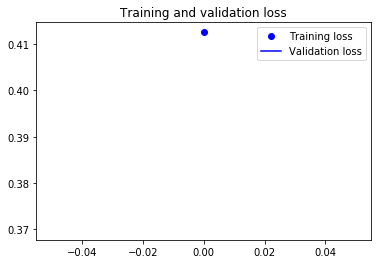

In [62]:
# To visualize the stacked GRN model with dropout

loss_GRN_dropout_stacked = history_GRN_dropout_stacked.history['loss']
val_loss_GRN_dropout_stacked = history_GRN_dropout_stacked.history['val_loss']

epochs_GRN_dropout_stacked = range(len(loss_GRN_dropout_stacked))

plt.figure()

plt.plot(epochs_GRN_dropout_stacked, loss_GRN_dropout_stacked, 'bo', label='Training loss')
plt.plot(epochs_GRN_dropout_stacked, val_loss_GRN_dropout_stacked, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

from keras.models import load_model
model_GRN_dropout_stacked.save('C:\\Users\\bst\Documents\Big Project - time series forecasts with LSTM\Personal Proj 1 - SolarIrradianceFcst_GRN_dropout_stacked.h5')


### Using bidirectional RNN

To use regular RNNs, each processing input sequence in one direction (chronologically and antichronologically), then merging their representations. By processing a sequence both way, a bidirectional RNN is able to catch patterns that may have been overlooked by a one-direction RNN.

In our case, the model had been processing the earliest datapoint first. Maybe, the more recent datapoints carry more relevant information.

To write a variant of our data generator, where the input sequences get reverted along the time dimension (replace the last line with yield samples[:, ::-1, :], targets). Training the same one-GRU-layer network as we used in the first experiment in this section

In [63]:
def reverse_order_generator(data, lookback, delay, min_index, max_index,
                            shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples[:, ::-1, :], targets
        
train_gen_reverse = reverse_order_generator(
    df_np,
    lookback=lookback,
    delay=delay,
    min_index=0,
    max_index=525600,
    shuffle=True,
    step=step, 
    batch_size=batch_size)
val_gen_reverse = reverse_order_generator(
    df_np,
    lookback=lookback,
    delay=delay,
    min_index=525601,
    max_index=568800,
    step=step,
    batch_size=batch_size)


In [64]:
# To define and fit a bidirectional GRN
model_GRN_bidirection = Sequential()
model_GRN_bidirection.add(layers.GRU(32, input_shape=(None, df_np.shape[-1])))
model_GRN_bidirection.add(layers.Dense(1))

model_GRN_bidirection.compile(optimizer=RMSprop(), loss='mae')
history_GRN_bidirection = model_GRN_bidirection.fit_generator(train_gen_reverse,
                              steps_per_epoch=500,
                              epochs=1,          # to run 20 epochs when run for real
                              validation_data=val_gen_reverse,
                              validation_steps=val_steps)


Epoch 1/1


  1/500 [..............................] - ETA: 949s - loss: 0.9105

  2/500 [..............................] - ETA: 764s - loss: 0.8887

  3/500 [..............................] - ETA: 700s - loss: 0.8465

  4/500 [..............................] - ETA: 668s - loss: 0.8384

  5/500 [..............................] - ETA: 649s - loss: 0.8145

  6/500 [..............................] - ETA: 637s - loss: 0.8096

  7/500 [..............................] - ETA: 626s - loss: 0.8124

  8/500 [..............................] - ETA: 618s - loss: 0.8020

  9/500 [..............................] - ETA: 611s - loss: 0.7890

 10/500 [..............................] - ETA: 605s - loss: 0.7831

 11/500 [..............................] - ETA: 599s - loss: 0.7671

 12/500 [..............................] - ETA: 593s - loss: 0.7590

 13/500 [..............................] - ETA: 588s - loss: 0.7541

 14/500 [..............................] - ETA: 584s - loss: 0.7479

 15/500 [..............................] - ETA: 579s - loss: 0.7355

 16/500 [..............................] - ETA: 575s - loss: 0.7300

 17/500 [>.............................] - ETA: 571s - loss: 0.7232

 18/500 [>.............................] - ETA: 567s - loss: 0.7159

 19/500 [>.............................] - ETA: 564s - loss: 0.7112

 20/500 [>.............................] - ETA: 561s - loss: 0.7032

 21/500 [>.............................] - ETA: 558s - loss: 0.6945

 22/500 [>.............................] - ETA: 556s - loss: 0.6891

 23/500 [>.............................] - ETA: 553s - loss: 0.6869

 24/500 [>.............................] - ETA: 551s - loss: 0.6844

 25/500 [>.............................] - ETA: 549s - loss: 0.6803

 26/500 [>.............................] - ETA: 547s - loss: 0.6763

 27/500 [>.............................] - ETA: 545s - loss: 0.6739

 28/500 [>.............................] - ETA: 543s - loss: 0.6710

 29/500 [>.............................] - ETA: 541s - loss: 0.6691

 30/500 [>.............................] - ETA: 539s - loss: 0.6676

 31/500 [>.............................] - ETA: 537s - loss: 0.6657

 32/500 [>.............................] - ETA: 536s - loss: 0.6639

 33/500 [>.............................] - ETA: 534s - loss: 0.6599

 34/500 [=>............................] - ETA: 532s - loss: 0.6566

 35/500 [=>............................] - ETA: 530s - loss: 0.6562

 36/500 [=>............................] - ETA: 529s - loss: 0.6563

 37/500 [=>............................] - ETA: 527s - loss: 0.6544

 38/500 [=>............................] - ETA: 525s - loss: 0.6532

 39/500 [=>............................] - ETA: 524s - loss: 0.6504

 40/500 [=>............................] - ETA: 522s - loss: 0.6488

 41/500 [=>............................] - ETA: 521s - loss: 0.6476

 42/500 [=>............................] - ETA: 519s - loss: 0.6451

 43/500 [=>............................] - ETA: 518s - loss: 0.6446

 44/500 [=>............................] - ETA: 516s - loss: 0.6435

 45/500 [=>............................] - ETA: 515s - loss: 0.6429

 46/500 [=>............................] - ETA: 513s - loss: 0.6399

 47/500 [=>............................] - ETA: 512s - loss: 0.6393

 48/500 [=>............................] - ETA: 510s - loss: 0.6389

 49/500 [=>............................] - ETA: 509s - loss: 0.6378

 50/500 [==>...........................] - ETA: 508s - loss: 0.6377

 51/500 [==>...........................] - ETA: 506s - loss: 0.6377

 52/500 [==>...........................] - ETA: 505s - loss: 0.6381

 53/500 [==>...........................] - ETA: 504s - loss: 0.6365

 54/500 [==>...........................] - ETA: 502s - loss: 0.6358

 55/500 [==>...........................] - ETA: 501s - loss: 0.6347

 56/500 [==>...........................] - ETA: 500s - loss: 0.6327

 57/500 [==>...........................] - ETA: 498s - loss: 0.6320

 58/500 [==>...........................] - ETA: 497s - loss: 0.6312

 59/500 [==>...........................] - ETA: 496s - loss: 0.6305

 60/500 [==>...........................] - ETA: 495s - loss: 0.6307

 61/500 [==>...........................] - ETA: 493s - loss: 0.6303

 62/500 [==>...........................] - ETA: 492s - loss: 0.6294

 63/500 [==>...........................] - ETA: 491s - loss: 0.6293

 64/500 [==>...........................] - ETA: 490s - loss: 0.6290

 65/500 [==>...........................] - ETA: 488s - loss: 0.6277

 66/500 [==>...........................] - ETA: 487s - loss: 0.6279

 67/500 [===>..........................] - ETA: 486s - loss: 0.6273

 68/500 [===>..........................] - ETA: 484s - loss: 0.6269

 69/500 [===>..........................] - ETA: 483s - loss: 0.6268

 70/500 [===>..........................] - ETA: 482s - loss: 0.6264

 71/500 [===>..........................] - ETA: 481s - loss: 0.6268

 72/500 [===>..........................] - ETA: 479s - loss: 0.6262

 73/500 [===>..........................] - ETA: 478s - loss: 0.6259

 74/500 [===>..........................] - ETA: 477s - loss: 0.6256

 75/500 [===>..........................] - ETA: 476s - loss: 0.6241

 76/500 [===>..........................] - ETA: 475s - loss: 0.6236

 77/500 [===>..........................] - ETA: 473s - loss: 0.6231

 78/500 [===>..........................] - ETA: 472s - loss: 0.6229

 79/500 [===>..........................] - ETA: 471s - loss: 0.6219

 80/500 [===>..........................] - ETA: 470s - loss: 0.6208

 81/500 [===>..........................] - ETA: 469s - loss: 0.6206

 82/500 [===>..........................] - ETA: 467s - loss: 0.6203

 83/500 [===>..........................] - ETA: 466s - loss: 0.6203

 84/500 [====>.........................] - ETA: 465s - loss: 0.6198

 85/500 [====>.........................] - ETA: 464s - loss: 0.6197

 86/500 [====>.........................] - ETA: 463s - loss: 0.6194

 87/500 [====>.........................] - ETA: 461s - loss: 0.6194

 88/500 [====>.........................] - ETA: 460s - loss: 0.6191

 89/500 [====>.........................] - ETA: 459s - loss: 0.6186

 90/500 [====>.........................] - ETA: 458s - loss: 0.6182

 91/500 [====>.........................] - ETA: 457s - loss: 0.6174

 92/500 [====>.........................] - ETA: 455s - loss: 0.6170

 93/500 [====>.........................] - ETA: 454s - loss: 0.6168

 94/500 [====>.........................] - ETA: 453s - loss: 0.6161

 95/500 [====>.........................] - ETA: 452s - loss: 0.6160

 96/500 [====>.........................] - ETA: 451s - loss: 0.6155

 97/500 [====>.........................] - ETA: 450s - loss: 0.6156

 98/500 [====>.........................] - ETA: 448s - loss: 0.6150

 99/500 [====>.........................] - ETA: 447s - loss: 0.6149

100/500 [=====>........................] - ETA: 446s - loss: 0.6144

101/500 [=====>........................] - ETA: 445s - loss: 0.6137

102/500 [=====>........................] - ETA: 444s - loss: 0.6132

103/500 [=====>........................] - ETA: 443s - loss: 0.6129

104/500 [=====>........................] - ETA: 441s - loss: 0.6124

105/500 [=====>........................] - ETA: 440s - loss: 0.6123

106/500 [=====>........................] - ETA: 439s - loss: 0.6124

107/500 [=====>........................] - ETA: 438s - loss: 0.6119

108/500 [=====>........................] - ETA: 437s - loss: 0.6112

109/500 [=====>........................] - ETA: 436s - loss: 0.6108

110/500 [=====>........................] - ETA: 435s - loss: 0.6117

111/500 [=====>........................] - ETA: 433s - loss: 0.6112

112/500 [=====>........................] - ETA: 432s - loss: 0.6112

113/500 [=====>........................] - ETA: 431s - loss: 0.6115

114/500 [=====>........................] - ETA: 430s - loss: 0.6112

115/500 [=====>........................] - ETA: 429s - loss: 0.6111

116/500 [=====>........................] - ETA: 428s - loss: 0.6112

117/500 [======>.......................] - ETA: 427s - loss: 0.6108

118/500 [======>.......................] - ETA: 425s - loss: 0.6106

119/500 [======>.......................] - ETA: 424s - loss: 0.6108

120/500 [======>.......................] - ETA: 423s - loss: 0.6104

121/500 [======>.......................] - ETA: 422s - loss: 0.6101

122/500 [======>.......................] - ETA: 421s - loss: 0.6104

123/500 [======>.......................] - ETA: 420s - loss: 0.6105

124/500 [======>.......................] - ETA: 419s - loss: 0.6105

125/500 [======>.......................] - ETA: 417s - loss: 0.6099

126/500 [======>.......................] - ETA: 416s - loss: 0.6103

127/500 [======>.......................] - ETA: 415s - loss: 0.6095

128/500 [======>.......................] - ETA: 414s - loss: 0.6098

129/500 [======>.......................] - ETA: 413s - loss: 0.6092

130/500 [======>.......................] - ETA: 412s - loss: 0.6088

131/500 [======>.......................] - ETA: 411s - loss: 0.6088

132/500 [======>.......................] - ETA: 409s - loss: 0.6083

133/500 [======>.......................] - ETA: 408s - loss: 0.6081

134/500 [=======>......................] - ETA: 407s - loss: 0.6084

135/500 [=======>......................] - ETA: 406s - loss: 0.6079

136/500 [=======>......................] - ETA: 405s - loss: 0.6079

137/500 [=======>......................] - ETA: 404s - loss: 0.6077

138/500 [=======>......................] - ETA: 403s - loss: 0.6080

139/500 [=======>......................] - ETA: 401s - loss: 0.6080

140/500 [=======>......................] - ETA: 400s - loss: 0.6079

141/500 [=======>......................] - ETA: 399s - loss: 0.6077

142/500 [=======>......................] - ETA: 398s - loss: 0.6075

143/500 [=======>......................] - ETA: 397s - loss: 0.6070

144/500 [=======>......................] - ETA: 396s - loss: 0.6071

145/500 [=======>......................] - ETA: 395s - loss: 0.6071

146/500 [=======>......................] - ETA: 394s - loss: 0.6072

147/500 [=======>......................] - ETA: 392s - loss: 0.6069

148/500 [=======>......................] - ETA: 391s - loss: 0.6069

149/500 [=======>......................] - ETA: 390s - loss: 0.6063

150/500 [========>.....................] - ETA: 389s - loss: 0.6058

151/500 [========>.....................] - ETA: 388s - loss: 0.6056

152/500 [========>.....................] - ETA: 387s - loss: 0.6054

153/500 [========>.....................] - ETA: 386s - loss: 0.6052

154/500 [========>.....................] - ETA: 384s - loss: 0.6056

155/500 [========>.....................] - ETA: 383s - loss: 0.6055

156/500 [========>.....................] - ETA: 382s - loss: 0.6052

157/500 [========>.....................] - ETA: 381s - loss: 0.6049

158/500 [========>.....................] - ETA: 380s - loss: 0.6049

159/500 [========>.....................] - ETA: 379s - loss: 0.6051

160/500 [========>.....................] - ETA: 378s - loss: 0.6049

161/500 [========>.....................] - ETA: 377s - loss: 0.6047

162/500 [========>.....................] - ETA: 375s - loss: 0.6044

163/500 [========>.....................] - ETA: 374s - loss: 0.6042

164/500 [========>.....................] - ETA: 373s - loss: 0.6036

165/500 [========>.....................] - ETA: 372s - loss: 0.6040

166/500 [========>.....................] - ETA: 371s - loss: 0.6038

167/500 [=========>....................] - ETA: 370s - loss: 0.6037

168/500 [=========>....................] - ETA: 369s - loss: 0.6036

169/500 [=========>....................] - ETA: 368s - loss: 0.6032

170/500 [=========>....................] - ETA: 366s - loss: 0.6034

171/500 [=========>....................] - ETA: 365s - loss: 0.6031

172/500 [=========>....................] - ETA: 364s - loss: 0.6035

173/500 [=========>....................] - ETA: 363s - loss: 0.6034

174/500 [=========>....................] - ETA: 362s - loss: 0.6030

175/500 [=========>....................] - ETA: 361s - loss: 0.6029

176/500 [=========>....................] - ETA: 360s - loss: 0.6032

177/500 [=========>....................] - ETA: 359s - loss: 0.6033

178/500 [=========>....................] - ETA: 357s - loss: 0.6033

179/500 [=========>....................] - ETA: 356s - loss: 0.6031

180/500 [=========>....................] - ETA: 355s - loss: 0.6030

181/500 [=========>....................] - ETA: 354s - loss: 0.6033

182/500 [=========>....................] - ETA: 353s - loss: 0.6039

183/500 [=========>....................] - ETA: 352s - loss: 0.6037

184/500 [==========>...................] - ETA: 351s - loss: 0.6036

185/500 [==========>...................] - ETA: 350s - loss: 0.6035

186/500 [==========>...................] - ETA: 349s - loss: 0.6029

187/500 [==========>...................] - ETA: 347s - loss: 0.6029

188/500 [==========>...................] - ETA: 346s - loss: 0.6026

189/500 [==========>...................] - ETA: 345s - loss: 0.6027

190/500 [==========>...................] - ETA: 344s - loss: 0.6027

191/500 [==========>...................] - ETA: 343s - loss: 0.6025

192/500 [==========>...................] - ETA: 342s - loss: 0.6022

193/500 [==========>...................] - ETA: 341s - loss: 0.6022

194/500 [==========>...................] - ETA: 340s - loss: 0.6019

195/500 [==========>...................] - ETA: 338s - loss: 0.6019

196/500 [==========>...................] - ETA: 337s - loss: 0.6019

197/500 [==========>...................] - ETA: 336s - loss: 0.6021

198/500 [==========>...................] - ETA: 335s - loss: 0.6018

199/500 [==========>...................] - ETA: 334s - loss: 0.6016

200/500 [===========>..................] - ETA: 333s - loss: 0.6018

201/500 [===========>..................] - ETA: 332s - loss: 0.6021

202/500 [===========>..................] - ETA: 331s - loss: 0.6018

203/500 [===========>..................] - ETA: 330s - loss: 0.6019

204/500 [===========>..................] - ETA: 328s - loss: 0.6018

205/500 [===========>..................] - ETA: 327s - loss: 0.6016

206/500 [===========>..................] - ETA: 326s - loss: 0.6013

207/500 [===========>..................] - ETA: 325s - loss: 0.6014

208/500 [===========>..................] - ETA: 324s - loss: 0.6009

209/500 [===========>..................] - ETA: 323s - loss: 0.6007

210/500 [===========>..................] - ETA: 322s - loss: 0.6009

211/500 [===========>..................] - ETA: 321s - loss: 0.6009

212/500 [===========>..................] - ETA: 319s - loss: 0.6008

213/500 [===========>..................] - ETA: 318s - loss: 0.6007

214/500 [===========>..................] - ETA: 317s - loss: 0.6008

215/500 [===========>..................] - ETA: 316s - loss: 0.6008

216/500 [===========>..................] - ETA: 315s - loss: 0.6007

217/500 [============>.................] - ETA: 314s - loss: 0.6008

218/500 [============>.................] - ETA: 313s - loss: 0.6006

219/500 [============>.................] - ETA: 312s - loss: 0.6006

220/500 [============>.................] - ETA: 310s - loss: 0.6003

221/500 [============>.................] - ETA: 309s - loss: 0.6001

222/500 [============>.................] - ETA: 308s - loss: 0.6000

223/500 [============>.................] - ETA: 307s - loss: 0.6001

224/500 [============>.................] - ETA: 306s - loss: 0.6002

225/500 [============>.................] - ETA: 305s - loss: 0.6001

226/500 [============>.................] - ETA: 304s - loss: 0.6000

227/500 [============>.................] - ETA: 303s - loss: 0.5997

228/500 [============>.................] - ETA: 302s - loss: 0.5995

229/500 [============>.................] - ETA: 300s - loss: 0.5994

230/500 [============>.................] - ETA: 299s - loss: 0.5991

231/500 [============>.................] - ETA: 298s - loss: 0.5989

232/500 [============>.................] - ETA: 297s - loss: 0.5989

233/500 [============>.................] - ETA: 296s - loss: 0.5986

234/500 [=============>................] - ETA: 295s - loss: 0.5985

235/500 [=============>................] - ETA: 294s - loss: 0.5987

236/500 [=============>................] - ETA: 293s - loss: 0.5984

237/500 [=============>................] - ETA: 291s - loss: 0.5984

238/500 [=============>................] - ETA: 290s - loss: 0.5986

239/500 [=============>................] - ETA: 289s - loss: 0.5984

240/500 [=============>................] - ETA: 288s - loss: 0.5983

241/500 [=============>................] - ETA: 287s - loss: 0.5980

242/500 [=============>................] - ETA: 286s - loss: 0.5981

243/500 [=============>................] - ETA: 285s - loss: 0.5978

244/500 [=============>................] - ETA: 284s - loss: 0.5977

245/500 [=============>................] - ETA: 283s - loss: 0.5975

246/500 [=============>................] - ETA: 281s - loss: 0.5977

247/500 [=============>................] - ETA: 280s - loss: 0.5976

248/500 [=============>................] - ETA: 279s - loss: 0.5975

249/500 [=============>................] - ETA: 278s - loss: 0.5975

250/500 [==============>...............] - ETA: 277s - loss: 0.5974

251/500 [==============>...............] - ETA: 276s - loss: 0.5969

252/500 [==============>...............] - ETA: 275s - loss: 0.5969

253/500 [==============>...............] - ETA: 274s - loss: 0.5967

254/500 [==============>...............] - ETA: 272s - loss: 0.5965

255/500 [==============>...............] - ETA: 271s - loss: 0.5963

256/500 [==============>...............] - ETA: 270s - loss: 0.5965

257/500 [==============>...............] - ETA: 269s - loss: 0.5967

258/500 [==============>...............] - ETA: 268s - loss: 0.5968

259/500 [==============>...............] - ETA: 267s - loss: 0.5966

260/500 [==============>...............] - ETA: 266s - loss: 0.5967

261/500 [==============>...............] - ETA: 265s - loss: 0.5967

262/500 [==============>...............] - ETA: 264s - loss: 0.5967

263/500 [==============>...............] - ETA: 262s - loss: 0.5965

264/500 [==============>...............] - ETA: 261s - loss: 0.5964

265/500 [==============>...............] - ETA: 260s - loss: 0.5964

266/500 [==============>...............] - ETA: 259s - loss: 0.5962

267/500 [===============>..............] - ETA: 258s - loss: 0.5960

268/500 [===============>..............] - ETA: 257s - loss: 0.5960

269/500 [===============>..............] - ETA: 256s - loss: 0.5962

270/500 [===============>..............] - ETA: 255s - loss: 0.5961

271/500 [===============>..............] - ETA: 254s - loss: 0.5961

272/500 [===============>..............] - ETA: 252s - loss: 0.5961

273/500 [===============>..............] - ETA: 251s - loss: 0.5962

274/500 [===============>..............] - ETA: 250s - loss: 0.5960

275/500 [===============>..............] - ETA: 249s - loss: 0.5958

276/500 [===============>..............] - ETA: 248s - loss: 0.5958

277/500 [===============>..............] - ETA: 247s - loss: 0.5958

278/500 [===============>..............] - ETA: 246s - loss: 0.5958

279/500 [===============>..............] - ETA: 245s - loss: 0.5957

280/500 [===============>..............] - ETA: 244s - loss: 0.5957

281/500 [===============>..............] - ETA: 242s - loss: 0.5954

282/500 [===============>..............] - ETA: 241s - loss: 0.5952

283/500 [===============>..............] - ETA: 240s - loss: 0.5952

284/500 [================>.............] - ETA: 239s - loss: 0.5950

285/500 [================>.............] - ETA: 238s - loss: 0.5949

286/500 [================>.............] - ETA: 237s - loss: 0.5948

287/500 [================>.............] - ETA: 236s - loss: 0.5948

288/500 [================>.............] - ETA: 235s - loss: 0.5950

289/500 [================>.............] - ETA: 234s - loss: 0.5947

290/500 [================>.............] - ETA: 232s - loss: 0.5948

291/500 [================>.............] - ETA: 231s - loss: 0.5948

292/500 [================>.............] - ETA: 230s - loss: 0.5948

293/500 [================>.............] - ETA: 229s - loss: 0.5946

294/500 [================>.............] - ETA: 228s - loss: 0.5949

295/500 [================>.............] - ETA: 227s - loss: 0.5948

296/500 [================>.............] - ETA: 226s - loss: 0.5946

297/500 [================>.............] - ETA: 225s - loss: 0.5947

298/500 [================>.............] - ETA: 224s - loss: 0.5945

299/500 [================>.............] - ETA: 222s - loss: 0.5947

300/500 [=================>............] - ETA: 221s - loss: 0.5949

301/500 [=================>............] - ETA: 220s - loss: 0.5948

302/500 [=================>............] - ETA: 219s - loss: 0.5949

303/500 [=================>............] - ETA: 218s - loss: 0.5947

304/500 [=================>............] - ETA: 217s - loss: 0.5947

305/500 [=================>............] - ETA: 216s - loss: 0.5946

306/500 [=================>............] - ETA: 215s - loss: 0.5945

307/500 [=================>............] - ETA: 214s - loss: 0.5945

308/500 [=================>............] - ETA: 212s - loss: 0.5945

309/500 [=================>............] - ETA: 211s - loss: 0.5944

310/500 [=================>............] - ETA: 210s - loss: 0.5944

311/500 [=================>............] - ETA: 209s - loss: 0.5947

312/500 [=================>............] - ETA: 208s - loss: 0.5946

313/500 [=================>............] - ETA: 207s - loss: 0.5946

314/500 [=================>............] - ETA: 206s - loss: 0.5944

315/500 [=================>............] - ETA: 205s - loss: 0.5945

316/500 [=================>............] - ETA: 204s - loss: 0.5945

317/500 [==================>...........] - ETA: 202s - loss: 0.5945

318/500 [==================>...........] - ETA: 201s - loss: 0.5944

319/500 [==================>...........] - ETA: 200s - loss: 0.5944

320/500 [==================>...........] - ETA: 199s - loss: 0.5943

321/500 [==================>...........] - ETA: 198s - loss: 0.5940

322/500 [==================>...........] - ETA: 197s - loss: 0.5940

323/500 [==================>...........] - ETA: 196s - loss: 0.5939

324/500 [==================>...........] - ETA: 195s - loss: 0.5938

325/500 [==================>...........] - ETA: 194s - loss: 0.5936

326/500 [==================>...........] - ETA: 192s - loss: 0.5935

327/500 [==================>...........] - ETA: 191s - loss: 0.5934

328/500 [==================>...........] - ETA: 190s - loss: 0.5932

329/500 [==================>...........] - ETA: 189s - loss: 0.5931

330/500 [==================>...........] - ETA: 188s - loss: 0.5929

331/500 [==================>...........] - ETA: 187s - loss: 0.5930

332/500 [==================>...........] - ETA: 186s - loss: 0.5928

333/500 [==================>...........] - ETA: 185s - loss: 0.5928

334/500 [===================>..........] - ETA: 184s - loss: 0.5927

335/500 [===================>..........] - ETA: 182s - loss: 0.5928

336/500 [===================>..........] - ETA: 181s - loss: 0.5928

337/500 [===================>..........] - ETA: 180s - loss: 0.5929

338/500 [===================>..........] - ETA: 179s - loss: 0.5929

339/500 [===================>..........] - ETA: 178s - loss: 0.5930

340/500 [===================>..........] - ETA: 177s - loss: 0.5930

341/500 [===================>..........] - ETA: 176s - loss: 0.5930

342/500 [===================>..........] - ETA: 175s - loss: 0.5931

343/500 [===================>..........] - ETA: 174s - loss: 0.5931

344/500 [===================>..........] - ETA: 172s - loss: 0.5930

345/500 [===================>..........] - ETA: 171s - loss: 0.5932

346/500 [===================>..........] - ETA: 170s - loss: 0.5930

347/500 [===================>..........] - ETA: 169s - loss: 0.5931

348/500 [===================>..........] - ETA: 168s - loss: 0.5932

349/500 [===================>..........] - ETA: 167s - loss: 0.5929

350/500 [====================>.........] - ETA: 166s - loss: 0.5929

351/500 [====================>.........] - ETA: 165s - loss: 0.5929

352/500 [====================>.........] - ETA: 164s - loss: 0.5929

353/500 [====================>.........] - ETA: 162s - loss: 0.5928

354/500 [====================>.........] - ETA: 161s - loss: 0.5928

355/500 [====================>.........] - ETA: 160s - loss: 0.5927

356/500 [====================>.........] - ETA: 159s - loss: 0.5928

357/500 [====================>.........] - ETA: 158s - loss: 0.5928

358/500 [====================>.........] - ETA: 157s - loss: 0.5927

359/500 [====================>.........] - ETA: 156s - loss: 0.5927

360/500 [====================>.........] - ETA: 155s - loss: 0.5925

361/500 [====================>.........] - ETA: 154s - loss: 0.5926

362/500 [====================>.........] - ETA: 152s - loss: 0.5925

363/500 [====================>.........] - ETA: 151s - loss: 0.5925

364/500 [====================>.........] - ETA: 150s - loss: 0.5926

365/500 [====================>.........] - ETA: 149s - loss: 0.5924

366/500 [====================>.........] - ETA: 148s - loss: 0.5924

367/500 [=====================>........] - ETA: 147s - loss: 0.5924

368/500 [=====================>........] - ETA: 146s - loss: 0.5925

369/500 [=====================>........] - ETA: 145s - loss: 0.5925

370/500 [=====================>........] - ETA: 144s - loss: 0.5926

371/500 [=====================>........] - ETA: 142s - loss: 0.5924

372/500 [=====================>........] - ETA: 141s - loss: 0.5924

373/500 [=====================>........] - ETA: 140s - loss: 0.5922

374/500 [=====================>........] - ETA: 139s - loss: 0.5920

375/500 [=====================>........] - ETA: 138s - loss: 0.5919

376/500 [=====================>........] - ETA: 137s - loss: 0.5919

377/500 [=====================>........] - ETA: 136s - loss: 0.5918

378/500 [=====================>........] - ETA: 135s - loss: 0.5919

379/500 [=====================>........] - ETA: 134s - loss: 0.5920

380/500 [=====================>........] - ETA: 132s - loss: 0.5919

381/500 [=====================>........] - ETA: 131s - loss: 0.5919

382/500 [=====================>........] - ETA: 130s - loss: 0.5919

383/500 [=====================>........] - ETA: 129s - loss: 0.5918

384/500 [======================>.......] - ETA: 128s - loss: 0.5916

385/500 [======================>.......] - ETA: 127s - loss: 0.5916

386/500 [======================>.......] - ETA: 126s - loss: 0.5915

387/500 [======================>.......] - ETA: 125s - loss: 0.5914

388/500 [======================>.......] - ETA: 124s - loss: 0.5913

389/500 [======================>.......] - ETA: 122s - loss: 0.5913

390/500 [======================>.......] - ETA: 121s - loss: 0.5912

391/500 [======================>.......] - ETA: 120s - loss: 0.5909

392/500 [======================>.......] - ETA: 119s - loss: 0.5909

393/500 [======================>.......] - ETA: 118s - loss: 0.5907

394/500 [======================>.......] - ETA: 117s - loss: 0.5907

395/500 [======================>.......] - ETA: 116s - loss: 0.5906

396/500 [======================>.......] - ETA: 115s - loss: 0.5906

397/500 [======================>.......] - ETA: 114s - loss: 0.5906

398/500 [======================>.......] - ETA: 113s - loss: 0.5905

399/500 [======================>.......] - ETA: 111s - loss: 0.5904

400/500 [=======================>......] - ETA: 110s - loss: 0.5903

401/500 [=======================>......] - ETA: 109s - loss: 0.5902

402/500 [=======================>......] - ETA: 108s - loss: 0.5904

403/500 [=======================>......] - ETA: 107s - loss: 0.5905

404/500 [=======================>......] - ETA: 106s - loss: 0.5904

405/500 [=======================>......] - ETA: 105s - loss: 0.5906

406/500 [=======================>......] - ETA: 104s - loss: 0.5906

407/500 [=======================>......] - ETA: 103s - loss: 0.5904

408/500 [=======================>......] - ETA: 101s - loss: 0.5904

409/500 [=======================>......] - ETA: 100s - loss: 0.5903

410/500 [=======================>......] - ETA: 99s - loss: 0.5903 

411/500 [=======================>......] - ETA: 98s - loss: 0.5905

412/500 [=======================>......] - ETA: 97s - loss: 0.5904

413/500 [=======================>......] - ETA: 96s - loss: 0.5902

414/500 [=======================>......] - ETA: 95s - loss: 0.5900

415/500 [=======================>......] - ETA: 94s - loss: 0.5902

416/500 [=======================>......] - ETA: 93s - loss: 0.5900

417/500 [========================>.....] - ETA: 91s - loss: 0.5900

418/500 [========================>.....] - ETA: 90s - loss: 0.5900

419/500 [========================>.....] - ETA: 89s - loss: 0.5898

420/500 [========================>.....] - ETA: 88s - loss: 0.5899

421/500 [========================>.....] - ETA: 87s - loss: 0.5900

422/500 [========================>.....] - ETA: 86s - loss: 0.5901

423/500 [========================>.....] - ETA: 85s - loss: 0.5901

424/500 [========================>.....] - ETA: 84s - loss: 0.5900

425/500 [========================>.....] - ETA: 83s - loss: 0.5901

426/500 [========================>.....] - ETA: 81s - loss: 0.5901

427/500 [========================>.....] - ETA: 80s - loss: 0.5900

428/500 [========================>.....] - ETA: 79s - loss: 0.5900

429/500 [========================>.....] - ETA: 78s - loss: 0.5900

430/500 [========================>.....] - ETA: 77s - loss: 0.5901

431/500 [========================>.....] - ETA: 76s - loss: 0.5900

432/500 [========================>.....] - ETA: 75s - loss: 0.5902

433/500 [========================>.....] - ETA: 74s - loss: 0.5901

434/500 [=========================>....] - ETA: 73s - loss: 0.5902

435/500 [=========================>....] - ETA: 72s - loss: 0.5902

436/500 [=========================>....] - ETA: 70s - loss: 0.5903

437/500 [=========================>....] - ETA: 69s - loss: 0.5902

438/500 [=========================>....] - ETA: 68s - loss: 0.5900

439/500 [=========================>....] - ETA: 67s - loss: 0.5900

440/500 [=========================>....] - ETA: 66s - loss: 0.5899

441/500 [=========================>....] - ETA: 65s - loss: 0.5899

442/500 [=========================>....] - ETA: 64s - loss: 0.5899

443/500 [=========================>....] - ETA: 63s - loss: 0.5900

444/500 [=========================>....] - ETA: 62s - loss: 0.5900

445/500 [=========================>....] - ETA: 60s - loss: 0.5900

446/500 [=========================>....] - ETA: 59s - loss: 0.5900

447/500 [=========================>....] - ETA: 58s - loss: 0.5901

448/500 [=========================>....] - ETA: 57s - loss: 0.5902

449/500 [=========================>....] - ETA: 56s - loss: 0.5902

450/500 [==========================>...] - ETA: 55s - loss: 0.5902

451/500 [==========================>...] - ETA: 54s - loss: 0.5901

452/500 [==========================>...] - ETA: 53s - loss: 0.5900

453/500 [==========================>...] - ETA: 52s - loss: 0.5900

454/500 [==========================>...] - ETA: 50s - loss: 0.5900

455/500 [==========================>...] - ETA: 49s - loss: 0.5899

456/500 [==========================>...] - ETA: 48s - loss: 0.5900

457/500 [==========================>...] - ETA: 47s - loss: 0.5900

458/500 [==========================>...] - ETA: 46s - loss: 0.5899

459/500 [==========================>...] - ETA: 45s - loss: 0.5898

460/500 [==========================>...] - ETA: 44s - loss: 0.5897

461/500 [==========================>...] - ETA: 43s - loss: 0.5897

462/500 [==========================>...] - ETA: 42s - loss: 0.5895

463/500 [==========================>...] - ETA: 40s - loss: 0.5893

464/500 [==========================>...] - ETA: 39s - loss: 0.5893

465/500 [==========================>...] - ETA: 38s - loss: 0.5893

466/500 [==========================>...] - ETA: 37s - loss: 0.5893

467/500 [===========================>..] - ETA: 36s - loss: 0.5893

468/500 [===========================>..] - ETA: 35s - loss: 0.5893

469/500 [===========================>..] - ETA: 34s - loss: 0.5893

470/500 [===========================>..] - ETA: 33s - loss: 0.5892

471/500 [===========================>..] - ETA: 32s - loss: 0.5893

472/500 [===========================>..] - ETA: 31s - loss: 0.5894

473/500 [===========================>..] - ETA: 29s - loss: 0.5894

474/500 [===========================>..] - ETA: 28s - loss: 0.5893

475/500 [===========================>..] - ETA: 27s - loss: 0.5892

476/500 [===========================>..] - ETA: 26s - loss: 0.5893

477/500 [===========================>..] - ETA: 25s - loss: 0.5894

478/500 [===========================>..] - ETA: 24s - loss: 0.5892

479/500 [===========================>..] - ETA: 23s - loss: 0.5892

480/500 [===========================>..] - ETA: 22s - loss: 0.5891

481/500 [===========================>..] - ETA: 21s - loss: 0.5890

482/500 [===========================>..] - ETA: 19s - loss: 0.5889

483/500 [===========================>..] - ETA: 18s - loss: 0.5888

484/500 [============================>.] - ETA: 17s - loss: 0.5887

485/500 [============================>.] - ETA: 16s - loss: 0.5887

486/500 [============================>.] - ETA: 15s - loss: 0.5887

487/500 [============================>.] - ETA: 14s - loss: 0.5887

488/500 [============================>.] - ETA: 13s - loss: 0.5887

489/500 [============================>.] - ETA: 12s - loss: 0.5887

490/500 [============================>.] - ETA: 11s - loss: 0.5887

491/500 [============================>.] - ETA: 9s - loss: 0.5888 

492/500 [============================>.] - ETA: 8s - loss: 0.5888

493/500 [============================>.] - ETA: 7s - loss: 0.5888

494/500 [============================>.] - ETA: 6s - loss: 0.5888

495/500 [============================>.] - ETA: 5s - loss: 0.5888

496/500 [============================>.] - ETA: 4s - loss: 0.5888

497/500 [============================>.] - ETA: 3s - loss: 0.5886

498/500 [============================>.] - ETA: 2s - loss: 0.5886

499/500 [============================>.] - ETA: 1s - loss: 0.5887

500/500 [==============================] - 633s - loss: 0.5887 - val_loss: 0.5209

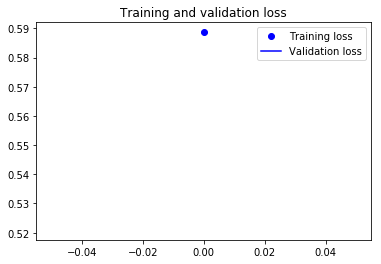

In [65]:
# To visualize the bidirectional GRN model performance
loss_GRN_bidirection = history_GRN_bidirection.history['loss']
val_loss_GRN_bidirection = history_GRN_bidirection.history['val_loss']

epochs_GRN_bidirection = range(len(loss_GRN_bidirection))

plt.figure()

plt.plot(epochs_GRN_bidirection, loss_GRN_bidirection, 'bo', label='Training loss')
plt.plot(epochs_GRN_bidirection, val_loss_GRN_bidirection, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

from keras.models import load_model
model_GRN_bidirection.save('C:\\Users\\bst\Documents\Big Project - time series forecasts with LSTM\Personal Proj 1 - SolarIrradianceFcst_GRN_bidirectional.h5')



## To replace the GRN with LSTM model, to compare performance and resource needs

In [66]:
# To model and fit a single layer LSTM

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model_LSTM = Sequential()
model_LSTM.add(layers.LSTM(32, input_shape=(None, df_np.shape[-1])))
model_LSTM.add(layers.Dense(1))

model_LSTM.compile(optimizer=RMSprop(), loss='mae')
history_LSTM = model_LSTM.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=1,  # to use 20 epoch when fitting for real
                              validation_data=val_gen,
                              validation_steps=val_steps)



Epoch 1/1


  1/500 [..............................] - ETA: 1102s - loss: 0.8508

  2/500 [..............................] - ETA: 879s - loss: 0.7821 

  3/500 [..............................] - ETA: 804s - loss: 0.8067

  4/500 [..............................] - ETA: 768s - loss: 0.7941

  5/500 [..............................] - ETA: 746s - loss: 0.7651

  6/500 [..............................] - ETA: 731s - loss: 0.7502

  7/500 [..............................] - ETA: 719s - loss: 0.7333

  8/500 [..............................] - ETA: 710s - loss: 0.7096

  9/500 [..............................] - ETA: 702s - loss: 0.6940

 10/500 [..............................] - ETA: 696s - loss: 0.6747

 11/500 [..............................] - ETA: 690s - loss: 0.6608

 12/500 [..............................] - ETA: 685s - loss: 0.6502

 13/500 [..............................] - ETA: 681s - loss: 0.6420

 14/500 [..............................] - ETA: 678s - loss: 0.6322

 15/500 [..............................] - ETA: 674s - loss: 0.6209

 16/500 [..............................] - ETA: 672s - loss: 0.6124

 17/500 [>.............................] - ETA: 669s - loss: 0.6029

 18/500 [>.............................] - ETA: 666s - loss: 0.5964

 19/500 [>.............................] - ETA: 663s - loss: 0.5876

 20/500 [>.............................] - ETA: 661s - loss: 0.5784

 21/500 [>.............................] - ETA: 658s - loss: 0.5722

 22/500 [>.............................] - ETA: 656s - loss: 0.5654

 23/500 [>.............................] - ETA: 654s - loss: 0.5599

 24/500 [>.............................] - ETA: 652s - loss: 0.5551

 25/500 [>.............................] - ETA: 649s - loss: 0.5493

 26/500 [>.............................] - ETA: 647s - loss: 0.5429

 27/500 [>.............................] - ETA: 645s - loss: 0.5394

 28/500 [>.............................] - ETA: 643s - loss: 0.5351

 29/500 [>.............................] - ETA: 641s - loss: 0.5299

 30/500 [>.............................] - ETA: 640s - loss: 0.5236

 31/500 [>.............................] - ETA: 638s - loss: 0.5217

 32/500 [>.............................] - ETA: 636s - loss: 0.5169

 33/500 [>.............................] - ETA: 634s - loss: 0.5131

 34/500 [=>............................] - ETA: 633s - loss: 0.5093

 35/500 [=>............................] - ETA: 631s - loss: 0.5055

 36/500 [=>............................] - ETA: 629s - loss: 0.5015

 37/500 [=>............................] - ETA: 628s - loss: 0.4981

 38/500 [=>............................] - ETA: 626s - loss: 0.4952

 39/500 [=>............................] - ETA: 624s - loss: 0.4934

 40/500 [=>............................] - ETA: 623s - loss: 0.4901

 41/500 [=>............................] - ETA: 621s - loss: 0.4882

 42/500 [=>............................] - ETA: 620s - loss: 0.4856

 43/500 [=>............................] - ETA: 618s - loss: 0.4830

 44/500 [=>............................] - ETA: 616s - loss: 0.4806

 45/500 [=>............................] - ETA: 615s - loss: 0.4786

 46/500 [=>............................] - ETA: 613s - loss: 0.4763

 47/500 [=>............................] - ETA: 612s - loss: 0.4732

 48/500 [=>............................] - ETA: 610s - loss: 0.4706

 49/500 [=>............................] - ETA: 609s - loss: 0.4690

 50/500 [==>...........................] - ETA: 607s - loss: 0.4669

 51/500 [==>...........................] - ETA: 606s - loss: 0.4645

 52/500 [==>...........................] - ETA: 604s - loss: 0.4628

 53/500 [==>...........................] - ETA: 603s - loss: 0.4607

 54/500 [==>...........................] - ETA: 601s - loss: 0.4595

 55/500 [==>...........................] - ETA: 599s - loss: 0.4570

 56/500 [==>...........................] - ETA: 598s - loss: 0.4550

 57/500 [==>...........................] - ETA: 596s - loss: 0.4533

 58/500 [==>...........................] - ETA: 595s - loss: 0.4515

 59/500 [==>...........................] - ETA: 593s - loss: 0.4503

 60/500 [==>...........................] - ETA: 592s - loss: 0.4491

 61/500 [==>...........................] - ETA: 591s - loss: 0.4478

 62/500 [==>...........................] - ETA: 589s - loss: 0.4461

 63/500 [==>...........................] - ETA: 588s - loss: 0.4450

 64/500 [==>...........................] - ETA: 586s - loss: 0.4435

 65/500 [==>...........................] - ETA: 585s - loss: 0.4422

 66/500 [==>...........................] - ETA: 583s - loss: 0.4410

 67/500 [===>..........................] - ETA: 582s - loss: 0.4396

 68/500 [===>..........................] - ETA: 581s - loss: 0.4390

 69/500 [===>..........................] - ETA: 579s - loss: 0.4383

 70/500 [===>..........................] - ETA: 578s - loss: 0.4369

 71/500 [===>..........................] - ETA: 576s - loss: 0.4360

 72/500 [===>..........................] - ETA: 575s - loss: 0.4346

 73/500 [===>..........................] - ETA: 573s - loss: 0.4336

 74/500 [===>..........................] - ETA: 572s - loss: 0.4330

 75/500 [===>..........................] - ETA: 571s - loss: 0.4325

 76/500 [===>..........................] - ETA: 569s - loss: 0.4318

 77/500 [===>..........................] - ETA: 568s - loss: 0.4309

 78/500 [===>..........................] - ETA: 566s - loss: 0.4303

 79/500 [===>..........................] - ETA: 565s - loss: 0.4296

 80/500 [===>..........................] - ETA: 564s - loss: 0.4284

 81/500 [===>..........................] - ETA: 562s - loss: 0.4276

 82/500 [===>..........................] - ETA: 561s - loss: 0.4267

 83/500 [===>..........................] - ETA: 559s - loss: 0.4260

 84/500 [====>.........................] - ETA: 558s - loss: 0.4252

 85/500 [====>.........................] - ETA: 556s - loss: 0.4242

 86/500 [====>.........................] - ETA: 555s - loss: 0.4231

 87/500 [====>.........................] - ETA: 554s - loss: 0.4227

 88/500 [====>.........................] - ETA: 552s - loss: 0.4219

 89/500 [====>.........................] - ETA: 551s - loss: 0.4212

 90/500 [====>.........................] - ETA: 549s - loss: 0.4204

 91/500 [====>.........................] - ETA: 548s - loss: 0.4199

 92/500 [====>.........................] - ETA: 547s - loss: 0.4193

 93/500 [====>.........................] - ETA: 545s - loss: 0.4188

 94/500 [====>.........................] - ETA: 544s - loss: 0.4182

 95/500 [====>.........................] - ETA: 543s - loss: 0.4182

 96/500 [====>.........................] - ETA: 541s - loss: 0.4176

 97/500 [====>.........................] - ETA: 540s - loss: 0.4172

 98/500 [====>.........................] - ETA: 538s - loss: 0.4167

 99/500 [====>.........................] - ETA: 537s - loss: 0.4164

100/500 [=====>........................] - ETA: 536s - loss: 0.4161

101/500 [=====>........................] - ETA: 534s - loss: 0.4153

102/500 [=====>........................] - ETA: 533s - loss: 0.4149

103/500 [=====>........................] - ETA: 531s - loss: 0.4145

104/500 [=====>........................] - ETA: 530s - loss: 0.4138

105/500 [=====>........................] - ETA: 529s - loss: 0.4133

106/500 [=====>........................] - ETA: 527s - loss: 0.4131

107/500 [=====>........................] - ETA: 526s - loss: 0.4125

108/500 [=====>........................] - ETA: 525s - loss: 0.4117

109/500 [=====>........................] - ETA: 523s - loss: 0.4110

110/500 [=====>........................] - ETA: 522s - loss: 0.4105

111/500 [=====>........................] - ETA: 520s - loss: 0.4096

112/500 [=====>........................] - ETA: 519s - loss: 0.4091

113/500 [=====>........................] - ETA: 518s - loss: 0.4086

114/500 [=====>........................] - ETA: 516s - loss: 0.4081

115/500 [=====>........................] - ETA: 515s - loss: 0.4076

116/500 [=====>........................] - ETA: 514s - loss: 0.4073

117/500 [======>.......................] - ETA: 512s - loss: 0.4069

118/500 [======>.......................] - ETA: 511s - loss: 0.4066

119/500 [======>.......................] - ETA: 509s - loss: 0.4065

120/500 [======>.......................] - ETA: 508s - loss: 0.4062

121/500 [======>.......................] - ETA: 507s - loss: 0.4058

122/500 [======>.......................] - ETA: 505s - loss: 0.4056

123/500 [======>.......................] - ETA: 504s - loss: 0.4056

124/500 [======>.......................] - ETA: 503s - loss: 0.4053

125/500 [======>.......................] - ETA: 501s - loss: 0.4050

126/500 [======>.......................] - ETA: 500s - loss: 0.4047

127/500 [======>.......................] - ETA: 499s - loss: 0.4042

128/500 [======>.......................] - ETA: 497s - loss: 0.4036

129/500 [======>.......................] - ETA: 496s - loss: 0.4033

130/500 [======>.......................] - ETA: 495s - loss: 0.4035

131/500 [======>.......................] - ETA: 493s - loss: 0.4028

132/500 [======>.......................] - ETA: 492s - loss: 0.4024

133/500 [======>.......................] - ETA: 491s - loss: 0.4021

134/500 [=======>......................] - ETA: 489s - loss: 0.4017

135/500 [=======>......................] - ETA: 488s - loss: 0.4015

136/500 [=======>......................] - ETA: 487s - loss: 0.4011

137/500 [=======>......................] - ETA: 485s - loss: 0.4008

138/500 [=======>......................] - ETA: 484s - loss: 0.4004

139/500 [=======>......................] - ETA: 482s - loss: 0.4002

140/500 [=======>......................] - ETA: 481s - loss: 0.4001

141/500 [=======>......................] - ETA: 480s - loss: 0.3999

142/500 [=======>......................] - ETA: 478s - loss: 0.3996

143/500 [=======>......................] - ETA: 477s - loss: 0.3994

144/500 [=======>......................] - ETA: 476s - loss: 0.3988

145/500 [=======>......................] - ETA: 474s - loss: 0.3984

146/500 [=======>......................] - ETA: 473s - loss: 0.3982

147/500 [=======>......................] - ETA: 472s - loss: 0.3979

148/500 [=======>......................] - ETA: 470s - loss: 0.3974

149/500 [=======>......................] - ETA: 469s - loss: 0.3970

150/500 [========>.....................] - ETA: 468s - loss: 0.3967

151/500 [========>.....................] - ETA: 466s - loss: 0.3966

152/500 [========>.....................] - ETA: 465s - loss: 0.3965

153/500 [========>.....................] - ETA: 464s - loss: 0.3964

154/500 [========>.....................] - ETA: 462s - loss: 0.3962

155/500 [========>.....................] - ETA: 461s - loss: 0.3959

156/500 [========>.....................] - ETA: 460s - loss: 0.3955

157/500 [========>.....................] - ETA: 458s - loss: 0.3952

158/500 [========>.....................] - ETA: 457s - loss: 0.3949

159/500 [========>.....................] - ETA: 456s - loss: 0.3942

160/500 [========>.....................] - ETA: 454s - loss: 0.3940

161/500 [========>.....................] - ETA: 453s - loss: 0.3936

162/500 [========>.....................] - ETA: 451s - loss: 0.3933

163/500 [========>.....................] - ETA: 450s - loss: 0.3930

164/500 [========>.....................] - ETA: 449s - loss: 0.3928

165/500 [========>.....................] - ETA: 447s - loss: 0.3924

166/500 [========>.....................] - ETA: 446s - loss: 0.3921

167/500 [=========>....................] - ETA: 445s - loss: 0.3919

168/500 [=========>....................] - ETA: 443s - loss: 0.3917

169/500 [=========>....................] - ETA: 442s - loss: 0.3913

170/500 [=========>....................] - ETA: 441s - loss: 0.3910

171/500 [=========>....................] - ETA: 439s - loss: 0.3910

172/500 [=========>....................] - ETA: 438s - loss: 0.3905

173/500 [=========>....................] - ETA: 437s - loss: 0.3901

174/500 [=========>....................] - ETA: 435s - loss: 0.3900

175/500 [=========>....................] - ETA: 434s - loss: 0.3897

176/500 [=========>....................] - ETA: 433s - loss: 0.3896

177/500 [=========>....................] - ETA: 431s - loss: 0.3892

178/500 [=========>....................] - ETA: 430s - loss: 0.3891

179/500 [=========>....................] - ETA: 428s - loss: 0.3890

180/500 [=========>....................] - ETA: 427s - loss: 0.3887

181/500 [=========>....................] - ETA: 426s - loss: 0.3883

182/500 [=========>....................] - ETA: 424s - loss: 0.3882

183/500 [=========>....................] - ETA: 423s - loss: 0.3878

184/500 [==========>...................] - ETA: 422s - loss: 0.3877

185/500 [==========>...................] - ETA: 420s - loss: 0.3874

186/500 [==========>...................] - ETA: 419s - loss: 0.3871

187/500 [==========>...................] - ETA: 418s - loss: 0.3869

188/500 [==========>...................] - ETA: 416s - loss: 0.3866

189/500 [==========>...................] - ETA: 415s - loss: 0.3862

190/500 [==========>...................] - ETA: 414s - loss: 0.3860

191/500 [==========>...................] - ETA: 412s - loss: 0.3858

192/500 [==========>...................] - ETA: 411s - loss: 0.3856

193/500 [==========>...................] - ETA: 410s - loss: 0.3854

194/500 [==========>...................] - ETA: 408s - loss: 0.3853

195/500 [==========>...................] - ETA: 407s - loss: 0.3853

196/500 [==========>...................] - ETA: 406s - loss: 0.3851

197/500 [==========>...................] - ETA: 404s - loss: 0.3849

198/500 [==========>...................] - ETA: 403s - loss: 0.3849

199/500 [==========>...................] - ETA: 402s - loss: 0.3847

200/500 [===========>..................] - ETA: 400s - loss: 0.3845

201/500 [===========>..................] - ETA: 399s - loss: 0.3842

202/500 [===========>..................] - ETA: 398s - loss: 0.3839

203/500 [===========>..................] - ETA: 396s - loss: 0.3837

204/500 [===========>..................] - ETA: 395s - loss: 0.3837

205/500 [===========>..................] - ETA: 394s - loss: 0.3834

206/500 [===========>..................] - ETA: 392s - loss: 0.3833

207/500 [===========>..................] - ETA: 391s - loss: 0.3832

208/500 [===========>..................] - ETA: 390s - loss: 0.3830

209/500 [===========>..................] - ETA: 388s - loss: 0.3828

210/500 [===========>..................] - ETA: 387s - loss: 0.3827

211/500 [===========>..................] - ETA: 386s - loss: 0.3826

212/500 [===========>..................] - ETA: 384s - loss: 0.3823

213/500 [===========>..................] - ETA: 383s - loss: 0.3824

214/500 [===========>..................] - ETA: 381s - loss: 0.3822

215/500 [===========>..................] - ETA: 380s - loss: 0.3820

216/500 [===========>..................] - ETA: 379s - loss: 0.3821

217/500 [============>.................] - ETA: 377s - loss: 0.3821

218/500 [============>.................] - ETA: 376s - loss: 0.3819

219/500 [============>.................] - ETA: 375s - loss: 0.3818

220/500 [============>.................] - ETA: 373s - loss: 0.3815

221/500 [============>.................] - ETA: 372s - loss: 0.3814

222/500 [============>.................] - ETA: 371s - loss: 0.3811

223/500 [============>.................] - ETA: 369s - loss: 0.3810

224/500 [============>.................] - ETA: 368s - loss: 0.3809

225/500 [============>.................] - ETA: 367s - loss: 0.3808

226/500 [============>.................] - ETA: 365s - loss: 0.3808

227/500 [============>.................] - ETA: 364s - loss: 0.3809

228/500 [============>.................] - ETA: 363s - loss: 0.3807

229/500 [============>.................] - ETA: 361s - loss: 0.3806

230/500 [============>.................] - ETA: 360s - loss: 0.3804

231/500 [============>.................] - ETA: 359s - loss: 0.3802

232/500 [============>.................] - ETA: 357s - loss: 0.3799

233/500 [============>.................] - ETA: 356s - loss: 0.3799

234/500 [=============>................] - ETA: 355s - loss: 0.3799

235/500 [=============>................] - ETA: 353s - loss: 0.3796

236/500 [=============>................] - ETA: 352s - loss: 0.3795

237/500 [=============>................] - ETA: 351s - loss: 0.3794

238/500 [=============>................] - ETA: 349s - loss: 0.3794

239/500 [=============>................] - ETA: 348s - loss: 0.3793

240/500 [=============>................] - ETA: 347s - loss: 0.3792

241/500 [=============>................] - ETA: 345s - loss: 0.3791

242/500 [=============>................] - ETA: 344s - loss: 0.3790

243/500 [=============>................] - ETA: 343s - loss: 0.3788

244/500 [=============>................] - ETA: 341s - loss: 0.3787

245/500 [=============>................] - ETA: 340s - loss: 0.3787

246/500 [=============>................] - ETA: 339s - loss: 0.3784

247/500 [=============>................] - ETA: 337s - loss: 0.3783

248/500 [=============>................] - ETA: 336s - loss: 0.3783

249/500 [=============>................] - ETA: 335s - loss: 0.3782

250/500 [==============>...............] - ETA: 333s - loss: 0.3781

251/500 [==============>...............] - ETA: 332s - loss: 0.3780

252/500 [==============>...............] - ETA: 331s - loss: 0.3778

253/500 [==============>...............] - ETA: 329s - loss: 0.3776

254/500 [==============>...............] - ETA: 328s - loss: 0.3774

255/500 [==============>...............] - ETA: 327s - loss: 0.3773

256/500 [==============>...............] - ETA: 325s - loss: 0.3770

257/500 [==============>...............] - ETA: 324s - loss: 0.3769

258/500 [==============>...............] - ETA: 323s - loss: 0.3769

259/500 [==============>...............] - ETA: 321s - loss: 0.3768

260/500 [==============>...............] - ETA: 320s - loss: 0.3768

261/500 [==============>...............] - ETA: 319s - loss: 0.3768

262/500 [==============>...............] - ETA: 317s - loss: 0.3766

263/500 [==============>...............] - ETA: 316s - loss: 0.3764

264/500 [==============>...............] - ETA: 315s - loss: 0.3764

265/500 [==============>...............] - ETA: 313s - loss: 0.3763

266/500 [==============>...............] - ETA: 312s - loss: 0.3762

267/500 [===============>..............] - ETA: 311s - loss: 0.3761

268/500 [===============>..............] - ETA: 309s - loss: 0.3760

269/500 [===============>..............] - ETA: 308s - loss: 0.3759

270/500 [===============>..............] - ETA: 307s - loss: 0.3758

271/500 [===============>..............] - ETA: 305s - loss: 0.3757

272/500 [===============>..............] - ETA: 304s - loss: 0.3757

273/500 [===============>..............] - ETA: 303s - loss: 0.3756

274/500 [===============>..............] - ETA: 301s - loss: 0.3753

275/500 [===============>..............] - ETA: 300s - loss: 0.3754

276/500 [===============>..............] - ETA: 299s - loss: 0.3754

277/500 [===============>..............] - ETA: 297s - loss: 0.3751

278/500 [===============>..............] - ETA: 296s - loss: 0.3750

279/500 [===============>..............] - ETA: 294s - loss: 0.3749

280/500 [===============>..............] - ETA: 293s - loss: 0.3749

281/500 [===============>..............] - ETA: 292s - loss: 0.3748

282/500 [===============>..............] - ETA: 290s - loss: 0.3747

283/500 [===============>..............] - ETA: 289s - loss: 0.3746

284/500 [================>.............] - ETA: 288s - loss: 0.3745

285/500 [================>.............] - ETA: 286s - loss: 0.3745

286/500 [================>.............] - ETA: 285s - loss: 0.3744

287/500 [================>.............] - ETA: 284s - loss: 0.3744

288/500 [================>.............] - ETA: 282s - loss: 0.3743

289/500 [================>.............] - ETA: 281s - loss: 0.3742

290/500 [================>.............] - ETA: 280s - loss: 0.3740

291/500 [================>.............] - ETA: 278s - loss: 0.3740

292/500 [================>.............] - ETA: 277s - loss: 0.3737

293/500 [================>.............] - ETA: 276s - loss: 0.3736

294/500 [================>.............] - ETA: 274s - loss: 0.3735

295/500 [================>.............] - ETA: 273s - loss: 0.3735

296/500 [================>.............] - ETA: 272s - loss: 0.3735

297/500 [================>.............] - ETA: 270s - loss: 0.3733

298/500 [================>.............] - ETA: 269s - loss: 0.3731

299/500 [================>.............] - ETA: 268s - loss: 0.3731

300/500 [=================>............] - ETA: 266s - loss: 0.3731

301/500 [=================>............] - ETA: 265s - loss: 0.3730

302/500 [=================>............] - ETA: 264s - loss: 0.3729

303/500 [=================>............] - ETA: 262s - loss: 0.3728

304/500 [=================>............] - ETA: 261s - loss: 0.3728

305/500 [=================>............] - ETA: 260s - loss: 0.3726

306/500 [=================>............] - ETA: 258s - loss: 0.3725

307/500 [=================>............] - ETA: 257s - loss: 0.3725

308/500 [=================>............] - ETA: 256s - loss: 0.3724

309/500 [=================>............] - ETA: 254s - loss: 0.3725

310/500 [=================>............] - ETA: 253s - loss: 0.3724

311/500 [=================>............] - ETA: 252s - loss: 0.3723

312/500 [=================>............] - ETA: 250s - loss: 0.3722

313/500 [=================>............] - ETA: 249s - loss: 0.3722

314/500 [=================>............] - ETA: 248s - loss: 0.3722

315/500 [=================>............] - ETA: 246s - loss: 0.3721

316/500 [=================>............] - ETA: 245s - loss: 0.3720

317/500 [==================>...........] - ETA: 244s - loss: 0.3720

318/500 [==================>...........] - ETA: 242s - loss: 0.3719

319/500 [==================>...........] - ETA: 241s - loss: 0.3720

320/500 [==================>...........] - ETA: 240s - loss: 0.3720

321/500 [==================>...........] - ETA: 238s - loss: 0.3719

322/500 [==================>...........] - ETA: 237s - loss: 0.3717

323/500 [==================>...........] - ETA: 236s - loss: 0.3716

324/500 [==================>...........] - ETA: 234s - loss: 0.3716

325/500 [==================>...........] - ETA: 233s - loss: 0.3715

326/500 [==================>...........] - ETA: 232s - loss: 0.3714

327/500 [==================>...........] - ETA: 230s - loss: 0.3713

328/500 [==================>...........] - ETA: 229s - loss: 0.3713

329/500 [==================>...........] - ETA: 228s - loss: 0.3711

330/500 [==================>...........] - ETA: 226s - loss: 0.3710

331/500 [==================>...........] - ETA: 225s - loss: 0.3710

332/500 [==================>...........] - ETA: 224s - loss: 0.3708

333/500 [==================>...........] - ETA: 222s - loss: 0.3708

334/500 [===================>..........] - ETA: 221s - loss: 0.3708

335/500 [===================>..........] - ETA: 220s - loss: 0.3707

336/500 [===================>..........] - ETA: 218s - loss: 0.3708

337/500 [===================>..........] - ETA: 217s - loss: 0.3707

338/500 [===================>..........] - ETA: 216s - loss: 0.3705

339/500 [===================>..........] - ETA: 214s - loss: 0.3704

340/500 [===================>..........] - ETA: 213s - loss: 0.3704

341/500 [===================>..........] - ETA: 212s - loss: 0.3704

342/500 [===================>..........] - ETA: 210s - loss: 0.3703

343/500 [===================>..........] - ETA: 209s - loss: 0.3701

344/500 [===================>..........] - ETA: 208s - loss: 0.3702

345/500 [===================>..........] - ETA: 206s - loss: 0.3701

346/500 [===================>..........] - ETA: 205s - loss: 0.3701

347/500 [===================>..........] - ETA: 204s - loss: 0.3701

348/500 [===================>..........] - ETA: 202s - loss: 0.3700

349/500 [===================>..........] - ETA: 201s - loss: 0.3698

350/500 [====================>.........] - ETA: 200s - loss: 0.3698

351/500 [====================>.........] - ETA: 198s - loss: 0.3696

352/500 [====================>.........] - ETA: 197s - loss: 0.3695

353/500 [====================>.........] - ETA: 196s - loss: 0.3695

354/500 [====================>.........] - ETA: 194s - loss: 0.3694

355/500 [====================>.........] - ETA: 193s - loss: 0.3693

356/500 [====================>.........] - ETA: 192s - loss: 0.3692

357/500 [====================>.........] - ETA: 190s - loss: 0.3691

358/500 [====================>.........] - ETA: 189s - loss: 0.3690

359/500 [====================>.........] - ETA: 188s - loss: 0.3690

360/500 [====================>.........] - ETA: 186s - loss: 0.3690

361/500 [====================>.........] - ETA: 185s - loss: 0.3691

362/500 [====================>.........] - ETA: 184s - loss: 0.3690

363/500 [====================>.........] - ETA: 182s - loss: 0.3691

364/500 [====================>.........] - ETA: 181s - loss: 0.3691

365/500 [====================>.........] - ETA: 180s - loss: 0.3691

366/500 [====================>.........] - ETA: 178s - loss: 0.3690

367/500 [=====================>........] - ETA: 177s - loss: 0.3688

368/500 [=====================>........] - ETA: 176s - loss: 0.3688

369/500 [=====================>........] - ETA: 174s - loss: 0.3688

370/500 [=====================>........] - ETA: 173s - loss: 0.3687

371/500 [=====================>........] - ETA: 172s - loss: 0.3686

372/500 [=====================>........] - ETA: 170s - loss: 0.3685

373/500 [=====================>........] - ETA: 169s - loss: 0.3685

374/500 [=====================>........] - ETA: 168s - loss: 0.3685

375/500 [=====================>........] - ETA: 166s - loss: 0.3683

376/500 [=====================>........] - ETA: 165s - loss: 0.3682

377/500 [=====================>........] - ETA: 164s - loss: 0.3681

378/500 [=====================>........] - ETA: 162s - loss: 0.3680

379/500 [=====================>........] - ETA: 161s - loss: 0.3679

380/500 [=====================>........] - ETA: 160s - loss: 0.3679

381/500 [=====================>........] - ETA: 158s - loss: 0.3678

382/500 [=====================>........] - ETA: 157s - loss: 0.3678

383/500 [=====================>........] - ETA: 156s - loss: 0.3677

384/500 [======================>.......] - ETA: 154s - loss: 0.3677

385/500 [======================>.......] - ETA: 153s - loss: 0.3676

386/500 [======================>.......] - ETA: 152s - loss: 0.3676

387/500 [======================>.......] - ETA: 150s - loss: 0.3675

388/500 [======================>.......] - ETA: 149s - loss: 0.3676

389/500 [======================>.......] - ETA: 148s - loss: 0.3676

390/500 [======================>.......] - ETA: 146s - loss: 0.3676

391/500 [======================>.......] - ETA: 145s - loss: 0.3675

392/500 [======================>.......] - ETA: 144s - loss: 0.3675

393/500 [======================>.......] - ETA: 142s - loss: 0.3673

394/500 [======================>.......] - ETA: 141s - loss: 0.3672

395/500 [======================>.......] - ETA: 140s - loss: 0.3672

396/500 [======================>.......] - ETA: 138s - loss: 0.3670

397/500 [======================>.......] - ETA: 137s - loss: 0.3670

398/500 [======================>.......] - ETA: 136s - loss: 0.3669

399/500 [======================>.......] - ETA: 134s - loss: 0.3668

400/500 [=======================>......] - ETA: 133s - loss: 0.3668

401/500 [=======================>......] - ETA: 132s - loss: 0.3667

402/500 [=======================>......] - ETA: 130s - loss: 0.3667

403/500 [=======================>......] - ETA: 129s - loss: 0.3666

404/500 [=======================>......] - ETA: 128s - loss: 0.3665

405/500 [=======================>......] - ETA: 126s - loss: 0.3664

406/500 [=======================>......] - ETA: 125s - loss: 0.3663

407/500 [=======================>......] - ETA: 124s - loss: 0.3663

408/500 [=======================>......] - ETA: 122s - loss: 0.3663

409/500 [=======================>......] - ETA: 121s - loss: 0.3662

410/500 [=======================>......] - ETA: 120s - loss: 0.3661

411/500 [=======================>......] - ETA: 118s - loss: 0.3660

412/500 [=======================>......] - ETA: 117s - loss: 0.3660

413/500 [=======================>......] - ETA: 116s - loss: 0.3658

414/500 [=======================>......] - ETA: 114s - loss: 0.3658

415/500 [=======================>......] - ETA: 113s - loss: 0.3657

416/500 [=======================>......] - ETA: 112s - loss: 0.3657

417/500 [========================>.....] - ETA: 110s - loss: 0.3656

418/500 [========================>.....] - ETA: 109s - loss: 0.3656

419/500 [========================>.....] - ETA: 108s - loss: 0.3655

420/500 [========================>.....] - ETA: 106s - loss: 0.3654

421/500 [========================>.....] - ETA: 105s - loss: 0.3654

422/500 [========================>.....] - ETA: 104s - loss: 0.3653

423/500 [========================>.....] - ETA: 102s - loss: 0.3653

424/500 [========================>.....] - ETA: 101s - loss: 0.3653

425/500 [========================>.....] - ETA: 100s - loss: 0.3652

426/500 [========================>.....] - ETA: 98s - loss: 0.3652 

427/500 [========================>.....] - ETA: 97s - loss: 0.3650

428/500 [========================>.....] - ETA: 96s - loss: 0.3650

429/500 [========================>.....] - ETA: 94s - loss: 0.3650

430/500 [========================>.....] - ETA: 93s - loss: 0.3650

431/500 [========================>.....] - ETA: 92s - loss: 0.3650

432/500 [========================>.....] - ETA: 90s - loss: 0.3649

433/500 [========================>.....] - ETA: 89s - loss: 0.3648

434/500 [=========================>....] - ETA: 88s - loss: 0.3648

435/500 [=========================>....] - ETA: 86s - loss: 0.3647

436/500 [=========================>....] - ETA: 85s - loss: 0.3647

437/500 [=========================>....] - ETA: 84s - loss: 0.3646

438/500 [=========================>....] - ETA: 82s - loss: 0.3646

439/500 [=========================>....] - ETA: 81s - loss: 0.3645

440/500 [=========================>....] - ETA: 80s - loss: 0.3644

441/500 [=========================>....] - ETA: 78s - loss: 0.3644

442/500 [=========================>....] - ETA: 77s - loss: 0.3644

443/500 [=========================>....] - ETA: 76s - loss: 0.3643

444/500 [=========================>....] - ETA: 74s - loss: 0.3641

445/500 [=========================>....] - ETA: 73s - loss: 0.3640

446/500 [=========================>....] - ETA: 72s - loss: 0.3641

447/500 [=========================>....] - ETA: 70s - loss: 0.3640

448/500 [=========================>....] - ETA: 69s - loss: 0.3640

449/500 [=========================>....] - ETA: 68s - loss: 0.3639

450/500 [==========================>...] - ETA: 66s - loss: 0.3639

451/500 [==========================>...] - ETA: 65s - loss: 0.3638

452/500 [==========================>...] - ETA: 64s - loss: 0.3638

453/500 [==========================>...] - ETA: 62s - loss: 0.3637

454/500 [==========================>...] - ETA: 61s - loss: 0.3636

455/500 [==========================>...] - ETA: 60s - loss: 0.3636

456/500 [==========================>...] - ETA: 58s - loss: 0.3635

457/500 [==========================>...] - ETA: 57s - loss: 0.3634

458/500 [==========================>...] - ETA: 56s - loss: 0.3633

459/500 [==========================>...] - ETA: 54s - loss: 0.3633

460/500 [==========================>...] - ETA: 53s - loss: 0.3632

461/500 [==========================>...] - ETA: 52s - loss: 0.3631

462/500 [==========================>...] - ETA: 50s - loss: 0.3630

463/500 [==========================>...] - ETA: 49s - loss: 0.3629

464/500 [==========================>...] - ETA: 48s - loss: 0.3629

465/500 [==========================>...] - ETA: 46s - loss: 0.3629

466/500 [==========================>...] - ETA: 45s - loss: 0.3629

467/500 [===========================>..] - ETA: 44s - loss: 0.3629

468/500 [===========================>..] - ETA: 42s - loss: 0.3629

469/500 [===========================>..] - ETA: 41s - loss: 0.3628

470/500 [===========================>..] - ETA: 40s - loss: 0.3628

471/500 [===========================>..] - ETA: 38s - loss: 0.3627

472/500 [===========================>..] - ETA: 37s - loss: 0.3627

473/500 [===========================>..] - ETA: 36s - loss: 0.3627

474/500 [===========================>..] - ETA: 34s - loss: 0.3627

475/500 [===========================>..] - ETA: 33s - loss: 0.3627

476/500 [===========================>..] - ETA: 32s - loss: 0.3627

477/500 [===========================>..] - ETA: 30s - loss: 0.3627

478/500 [===========================>..] - ETA: 29s - loss: 0.3626

479/500 [===========================>..] - ETA: 28s - loss: 0.3625

480/500 [===========================>..] - ETA: 26s - loss: 0.3624

481/500 [===========================>..] - ETA: 25s - loss: 0.3624

482/500 [===========================>..] - ETA: 24s - loss: 0.3624

483/500 [===========================>..] - ETA: 22s - loss: 0.3623

484/500 [============================>.] - ETA: 21s - loss: 0.3623

485/500 [============================>.] - ETA: 20s - loss: 0.3624

486/500 [============================>.] - ETA: 18s - loss: 0.3623

487/500 [============================>.] - ETA: 17s - loss: 0.3622

488/500 [============================>.] - ETA: 16s - loss: 0.3621

489/500 [============================>.] - ETA: 14s - loss: 0.3621

490/500 [============================>.] - ETA: 13s - loss: 0.3621

491/500 [============================>.] - ETA: 12s - loss: 0.3619

492/500 [============================>.] - ETA: 10s - loss: 0.3618

493/500 [============================>.] - ETA: 9s - loss: 0.3618 

494/500 [============================>.] - ETA: 8s - loss: 0.3618

495/500 [============================>.] - ETA: 6s - loss: 0.3618

496/500 [============================>.] - ETA: 5s - loss: 0.3618

497/500 [============================>.] - ETA: 4s - loss: 0.3618

498/500 [============================>.] - ETA: 2s - loss: 0.3618

499/500 [============================>.] - ETA: 1s - loss: 0.3618

500/500 [==============================] - 760s - loss: 0.3618 - val_loss: 0.3571

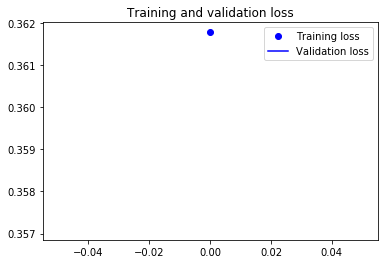

In [67]:
# To visualize the single layer LSTM model performance
import matplotlib.pyplot as plt

loss_LSTM = history_LSTM.history['loss']
val_loss_LSTM = history_LSTM.history['val_loss']

epochs_LSTM = range(len(loss_LSTM))

plt.figure()

plt.plot(epochs_LSTM, loss_LSTM, 'bo', label='Training loss')
plt.plot(epochs_LSTM, val_loss_LSTM, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


from keras.models import load_model
model_LSTM.save('C:\\Users\\bst\Documents\Big Project - time series forecasts with LSTM\Personal Proj 1 - SolarIrradianceFcst_LSTM.h5')


In [68]:
# Using dropout to fight overfitting in LSTM single layer model

model_LSTM_dropout = Sequential()
model_LSTM_dropout.add(layers.LSTM(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, df_np.shape[-1])))
model_LSTM_dropout.add(layers.Dense(1))

model_LSTM_dropout.compile(optimizer=RMSprop(), loss='mae')
history_LSTM_dropout = model_LSTM_dropout.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=1,   # to use 40 epochs when fitting for real
                              validation_data=val_gen,
                              validation_steps=val_steps)



Epoch 1/1


  1/500 [..............................] - ETA: 1185s - loss: 0.6766

  2/500 [..............................] - ETA: 939s - loss: 0.6930 

  3/500 [..............................] - ETA: 855s - loss: 0.6607

  4/500 [..............................] - ETA: 813s - loss: 0.6670

  5/500 [..............................] - ETA: 787s - loss: 0.6572

  6/500 [..............................] - ETA: 769s - loss: 0.6562

  7/500 [..............................] - ETA: 756s - loss: 0.6559

  8/500 [..............................] - ETA: 746s - loss: 0.6479

  9/500 [..............................] - ETA: 738s - loss: 0.6432

 10/500 [..............................] - ETA: 731s - loss: 0.6327

 11/500 [..............................] - ETA: 725s - loss: 0.6275

 12/500 [..............................] - ETA: 720s - loss: 0.6168

 13/500 [..............................] - ETA: 716s - loss: 0.6089

 14/500 [..............................] - ETA: 713s - loss: 0.6024

 15/500 [..............................] - ETA: 709s - loss: 0.5961

 16/500 [..............................] - ETA: 706s - loss: 0.5885

 17/500 [>.............................] - ETA: 703s - loss: 0.5819

 18/500 [>.............................] - ETA: 699s - loss: 0.5749

 19/500 [>.............................] - ETA: 696s - loss: 0.5686

 20/500 [>.............................] - ETA: 693s - loss: 0.5662

 21/500 [>.............................] - ETA: 691s - loss: 0.5599

 22/500 [>.............................] - ETA: 688s - loss: 0.5560

 23/500 [>.............................] - ETA: 686s - loss: 0.5525

 24/500 [>.............................] - ETA: 684s - loss: 0.5512

 25/500 [>.............................] - ETA: 682s - loss: 0.5479

 26/500 [>.............................] - ETA: 680s - loss: 0.5442

 27/500 [>.............................] - ETA: 678s - loss: 0.5413

 28/500 [>.............................] - ETA: 676s - loss: 0.5392

 29/500 [>.............................] - ETA: 674s - loss: 0.5370

 30/500 [>.............................] - ETA: 672s - loss: 0.5378

 31/500 [>.............................] - ETA: 670s - loss: 0.5357

 32/500 [>.............................] - ETA: 669s - loss: 0.5338

 33/500 [>.............................] - ETA: 667s - loss: 0.5322

 34/500 [=>............................] - ETA: 665s - loss: 0.5308

 35/500 [=>............................] - ETA: 663s - loss: 0.5301

 36/500 [=>............................] - ETA: 661s - loss: 0.5275

 37/500 [=>............................] - ETA: 659s - loss: 0.5249

 38/500 [=>............................] - ETA: 657s - loss: 0.5242

 39/500 [=>............................] - ETA: 656s - loss: 0.5236

 40/500 [=>............................] - ETA: 654s - loss: 0.5220

 41/500 [=>............................] - ETA: 652s - loss: 0.5210

 42/500 [=>............................] - ETA: 651s - loss: 0.5198

 43/500 [=>............................] - ETA: 649s - loss: 0.5171

 44/500 [=>............................] - ETA: 647s - loss: 0.5157

 45/500 [=>............................] - ETA: 646s - loss: 0.5152

 46/500 [=>............................] - ETA: 644s - loss: 0.5140

 47/500 [=>............................] - ETA: 643s - loss: 0.5140

 48/500 [=>............................] - ETA: 641s - loss: 0.5121

 49/500 [=>............................] - ETA: 639s - loss: 0.5113

 50/500 [==>...........................] - ETA: 638s - loss: 0.5110

 51/500 [==>...........................] - ETA: 636s - loss: 0.5089

 52/500 [==>...........................] - ETA: 634s - loss: 0.5091

 53/500 [==>...........................] - ETA: 633s - loss: 0.5087

 54/500 [==>...........................] - ETA: 631s - loss: 0.5084

 55/500 [==>...........................] - ETA: 630s - loss: 0.5071

 56/500 [==>...........................] - ETA: 628s - loss: 0.5048

 57/500 [==>...........................] - ETA: 626s - loss: 0.5036

 58/500 [==>...........................] - ETA: 625s - loss: 0.5025

 59/500 [==>...........................] - ETA: 623s - loss: 0.5011

 60/500 [==>...........................] - ETA: 622s - loss: 0.5008

 61/500 [==>...........................] - ETA: 620s - loss: 0.5008

 62/500 [==>...........................] - ETA: 619s - loss: 0.5005

 63/500 [==>...........................] - ETA: 617s - loss: 0.4997

 64/500 [==>...........................] - ETA: 616s - loss: 0.4993

 65/500 [==>...........................] - ETA: 614s - loss: 0.4978

 66/500 [==>...........................] - ETA: 613s - loss: 0.4970

 67/500 [===>..........................] - ETA: 611s - loss: 0.4965

 68/500 [===>..........................] - ETA: 610s - loss: 0.4963

 69/500 [===>..........................] - ETA: 608s - loss: 0.4956

 70/500 [===>..........................] - ETA: 606s - loss: 0.4947

 71/500 [===>..........................] - ETA: 605s - loss: 0.4946

 72/500 [===>..........................] - ETA: 604s - loss: 0.4938

 73/500 [===>..........................] - ETA: 602s - loss: 0.4934

 74/500 [===>..........................] - ETA: 601s - loss: 0.4933

 75/500 [===>..........................] - ETA: 599s - loss: 0.4927

 76/500 [===>..........................] - ETA: 598s - loss: 0.4923

 77/500 [===>..........................] - ETA: 596s - loss: 0.4918

 78/500 [===>..........................] - ETA: 595s - loss: 0.4910

 79/500 [===>..........................] - ETA: 593s - loss: 0.4900

 80/500 [===>..........................] - ETA: 592s - loss: 0.4889

 81/500 [===>..........................] - ETA: 590s - loss: 0.4884

 82/500 [===>..........................] - ETA: 589s - loss: 0.4882

 83/500 [===>..........................] - ETA: 587s - loss: 0.4870

 84/500 [====>.........................] - ETA: 586s - loss: 0.4874

 85/500 [====>.........................] - ETA: 584s - loss: 0.4869

 86/500 [====>.........................] - ETA: 583s - loss: 0.4861

 87/500 [====>.........................] - ETA: 581s - loss: 0.4858

 88/500 [====>.........................] - ETA: 580s - loss: 0.4857

 89/500 [====>.........................] - ETA: 578s - loss: 0.4856

 90/500 [====>.........................] - ETA: 577s - loss: 0.4848

 91/500 [====>.........................] - ETA: 575s - loss: 0.4844

 92/500 [====>.........................] - ETA: 574s - loss: 0.4844

 93/500 [====>.........................] - ETA: 573s - loss: 0.4837

 94/500 [====>.........................] - ETA: 571s - loss: 0.4837

 95/500 [====>.........................] - ETA: 570s - loss: 0.4831

 96/500 [====>.........................] - ETA: 568s - loss: 0.4831

 97/500 [====>.........................] - ETA: 567s - loss: 0.4827

 98/500 [====>.........................] - ETA: 565s - loss: 0.4822

 99/500 [====>.........................] - ETA: 564s - loss: 0.4821

100/500 [=====>........................] - ETA: 563s - loss: 0.4817

101/500 [=====>........................] - ETA: 561s - loss: 0.4814

102/500 [=====>........................] - ETA: 560s - loss: 0.4811

103/500 [=====>........................] - ETA: 558s - loss: 0.4803

104/500 [=====>........................] - ETA: 557s - loss: 0.4801

105/500 [=====>........................] - ETA: 555s - loss: 0.4798

106/500 [=====>........................] - ETA: 554s - loss: 0.4793

107/500 [=====>........................] - ETA: 553s - loss: 0.4795

108/500 [=====>........................] - ETA: 551s - loss: 0.4795

109/500 [=====>........................] - ETA: 550s - loss: 0.4789

110/500 [=====>........................] - ETA: 548s - loss: 0.4790

111/500 [=====>........................] - ETA: 547s - loss: 0.4789

112/500 [=====>........................] - ETA: 545s - loss: 0.4782

113/500 [=====>........................] - ETA: 544s - loss: 0.4778

114/500 [=====>........................] - ETA: 542s - loss: 0.4772

115/500 [=====>........................] - ETA: 541s - loss: 0.4772

116/500 [=====>........................] - ETA: 540s - loss: 0.4768

117/500 [======>.......................] - ETA: 538s - loss: 0.4764

118/500 [======>.......................] - ETA: 537s - loss: 0.4766

119/500 [======>.......................] - ETA: 535s - loss: 0.4762

120/500 [======>.......................] - ETA: 534s - loss: 0.4756

121/500 [======>.......................] - ETA: 532s - loss: 0.4759

122/500 [======>.......................] - ETA: 531s - loss: 0.4751

123/500 [======>.......................] - ETA: 530s - loss: 0.4748

124/500 [======>.......................] - ETA: 528s - loss: 0.4751

125/500 [======>.......................] - ETA: 527s - loss: 0.4752

126/500 [======>.......................] - ETA: 525s - loss: 0.4752

127/500 [======>.......................] - ETA: 524s - loss: 0.4753

128/500 [======>.......................] - ETA: 522s - loss: 0.4750

129/500 [======>.......................] - ETA: 521s - loss: 0.4749

130/500 [======>.......................] - ETA: 520s - loss: 0.4750

131/500 [======>.......................] - ETA: 518s - loss: 0.4746

132/500 [======>.......................] - ETA: 517s - loss: 0.4742

133/500 [======>.......................] - ETA: 515s - loss: 0.4735

134/500 [=======>......................] - ETA: 514s - loss: 0.4733

135/500 [=======>......................] - ETA: 512s - loss: 0.4726

136/500 [=======>......................] - ETA: 511s - loss: 0.4723

137/500 [=======>......................] - ETA: 510s - loss: 0.4719

138/500 [=======>......................] - ETA: 508s - loss: 0.4716

139/500 [=======>......................] - ETA: 507s - loss: 0.4711

140/500 [=======>......................] - ETA: 505s - loss: 0.4708

141/500 [=======>......................] - ETA: 504s - loss: 0.4706

142/500 [=======>......................] - ETA: 503s - loss: 0.4700

143/500 [=======>......................] - ETA: 501s - loss: 0.4700

144/500 [=======>......................] - ETA: 500s - loss: 0.4700

145/500 [=======>......................] - ETA: 498s - loss: 0.4701

146/500 [=======>......................] - ETA: 497s - loss: 0.4699

147/500 [=======>......................] - ETA: 496s - loss: 0.4698

148/500 [=======>......................] - ETA: 494s - loss: 0.4699

149/500 [=======>......................] - ETA: 493s - loss: 0.4701

150/500 [========>.....................] - ETA: 491s - loss: 0.4699

151/500 [========>.....................] - ETA: 490s - loss: 0.4696

152/500 [========>.....................] - ETA: 488s - loss: 0.4694

153/500 [========>.....................] - ETA: 487s - loss: 0.4693

154/500 [========>.....................] - ETA: 486s - loss: 0.4688

155/500 [========>.....................] - ETA: 484s - loss: 0.4688

156/500 [========>.....................] - ETA: 483s - loss: 0.4687

157/500 [========>.....................] - ETA: 481s - loss: 0.4685

158/500 [========>.....................] - ETA: 480s - loss: 0.4682

159/500 [========>.....................] - ETA: 479s - loss: 0.4680

160/500 [========>.....................] - ETA: 477s - loss: 0.4680

161/500 [========>.....................] - ETA: 476s - loss: 0.4681

162/500 [========>.....................] - ETA: 474s - loss: 0.4679

163/500 [========>.....................] - ETA: 473s - loss: 0.4671

164/500 [========>.....................] - ETA: 471s - loss: 0.4670

165/500 [========>.....................] - ETA: 470s - loss: 0.4665

166/500 [========>.....................] - ETA: 469s - loss: 0.4664

167/500 [=========>....................] - ETA: 467s - loss: 0.4662

168/500 [=========>....................] - ETA: 466s - loss: 0.4662

169/500 [=========>....................] - ETA: 464s - loss: 0.4661

170/500 [=========>....................] - ETA: 463s - loss: 0.4657

171/500 [=========>....................] - ETA: 462s - loss: 0.4651

172/500 [=========>....................] - ETA: 460s - loss: 0.4653

173/500 [=========>....................] - ETA: 459s - loss: 0.4652

174/500 [=========>....................] - ETA: 457s - loss: 0.4655

175/500 [=========>....................] - ETA: 456s - loss: 0.4653

176/500 [=========>....................] - ETA: 454s - loss: 0.4654

177/500 [=========>....................] - ETA: 453s - loss: 0.4650

178/500 [=========>....................] - ETA: 452s - loss: 0.4648

179/500 [=========>....................] - ETA: 450s - loss: 0.4645

180/500 [=========>....................] - ETA: 449s - loss: 0.4645

181/500 [=========>....................] - ETA: 447s - loss: 0.4646

182/500 [=========>....................] - ETA: 446s - loss: 0.4649

183/500 [=========>....................] - ETA: 445s - loss: 0.4647

184/500 [==========>...................] - ETA: 443s - loss: 0.4645

185/500 [==========>...................] - ETA: 442s - loss: 0.4644

186/500 [==========>...................] - ETA: 440s - loss: 0.4640

187/500 [==========>...................] - ETA: 439s - loss: 0.4637

188/500 [==========>...................] - ETA: 438s - loss: 0.4637

189/500 [==========>...................] - ETA: 436s - loss: 0.4636

190/500 [==========>...................] - ETA: 435s - loss: 0.4634

191/500 [==========>...................] - ETA: 433s - loss: 0.4635

192/500 [==========>...................] - ETA: 432s - loss: 0.4635

193/500 [==========>...................] - ETA: 431s - loss: 0.4632

194/500 [==========>...................] - ETA: 429s - loss: 0.4632

195/500 [==========>...................] - ETA: 428s - loss: 0.4631

196/500 [==========>...................] - ETA: 426s - loss: 0.4629

197/500 [==========>...................] - ETA: 425s - loss: 0.4630

198/500 [==========>...................] - ETA: 423s - loss: 0.4630

199/500 [==========>...................] - ETA: 422s - loss: 0.4629

200/500 [===========>..................] - ETA: 421s - loss: 0.4625

201/500 [===========>..................] - ETA: 419s - loss: 0.4627

202/500 [===========>..................] - ETA: 418s - loss: 0.4628

203/500 [===========>..................] - ETA: 416s - loss: 0.4628

204/500 [===========>..................] - ETA: 415s - loss: 0.4628

205/500 [===========>..................] - ETA: 414s - loss: 0.4627

206/500 [===========>..................] - ETA: 412s - loss: 0.4628

207/500 [===========>..................] - ETA: 411s - loss: 0.4625

208/500 [===========>..................] - ETA: 409s - loss: 0.4624

209/500 [===========>..................] - ETA: 408s - loss: 0.4620

210/500 [===========>..................] - ETA: 407s - loss: 0.4620

211/500 [===========>..................] - ETA: 405s - loss: 0.4620

212/500 [===========>..................] - ETA: 404s - loss: 0.4618

213/500 [===========>..................] - ETA: 402s - loss: 0.4615

214/500 [===========>..................] - ETA: 401s - loss: 0.4614

215/500 [===========>..................] - ETA: 400s - loss: 0.4610

216/500 [===========>..................] - ETA: 398s - loss: 0.4610

217/500 [============>.................] - ETA: 397s - loss: 0.4607

218/500 [============>.................] - ETA: 395s - loss: 0.4606

219/500 [============>.................] - ETA: 394s - loss: 0.4607

220/500 [============>.................] - ETA: 393s - loss: 0.4606

221/500 [============>.................] - ETA: 391s - loss: 0.4605

222/500 [============>.................] - ETA: 390s - loss: 0.4604

223/500 [============>.................] - ETA: 388s - loss: 0.4603

224/500 [============>.................] - ETA: 387s - loss: 0.4600

225/500 [============>.................] - ETA: 386s - loss: 0.4601

226/500 [============>.................] - ETA: 384s - loss: 0.4598

227/500 [============>.................] - ETA: 383s - loss: 0.4595

228/500 [============>.................] - ETA: 382s - loss: 0.4592

229/500 [============>.................] - ETA: 380s - loss: 0.4591

230/500 [============>.................] - ETA: 379s - loss: 0.4588

231/500 [============>.................] - ETA: 378s - loss: 0.4586

232/500 [============>.................] - ETA: 376s - loss: 0.4585

233/500 [============>.................] - ETA: 375s - loss: 0.4583

234/500 [=============>................] - ETA: 373s - loss: 0.4583

235/500 [=============>................] - ETA: 372s - loss: 0.4580

236/500 [=============>................] - ETA: 371s - loss: 0.4579

237/500 [=============>................] - ETA: 369s - loss: 0.4578

238/500 [=============>................] - ETA: 368s - loss: 0.4577

239/500 [=============>................] - ETA: 366s - loss: 0.4578

240/500 [=============>................] - ETA: 365s - loss: 0.4577

241/500 [=============>................] - ETA: 364s - loss: 0.4573

242/500 [=============>................] - ETA: 362s - loss: 0.4573

243/500 [=============>................] - ETA: 361s - loss: 0.4569

244/500 [=============>................] - ETA: 360s - loss: 0.4566

245/500 [=============>................] - ETA: 358s - loss: 0.4565

246/500 [=============>................] - ETA: 357s - loss: 0.4566

247/500 [=============>................] - ETA: 355s - loss: 0.4567

248/500 [=============>................] - ETA: 354s - loss: 0.4567

249/500 [=============>................] - ETA: 353s - loss: 0.4566

250/500 [==============>...............] - ETA: 351s - loss: 0.4563

251/500 [==============>...............] - ETA: 350s - loss: 0.4561

252/500 [==============>...............] - ETA: 348s - loss: 0.4559

253/500 [==============>...............] - ETA: 347s - loss: 0.4558

254/500 [==============>...............] - ETA: 345s - loss: 0.4557

255/500 [==============>...............] - ETA: 344s - loss: 0.4556

256/500 [==============>...............] - ETA: 343s - loss: 0.4554

257/500 [==============>...............] - ETA: 341s - loss: 0.4553

258/500 [==============>...............] - ETA: 340s - loss: 0.4550

259/500 [==============>...............] - ETA: 338s - loss: 0.4550

260/500 [==============>...............] - ETA: 337s - loss: 0.4550

261/500 [==============>...............] - ETA: 336s - loss: 0.4549

262/500 [==============>...............] - ETA: 334s - loss: 0.4547

263/500 [==============>...............] - ETA: 333s - loss: 0.4544

264/500 [==============>...............] - ETA: 331s - loss: 0.4541

265/500 [==============>...............] - ETA: 330s - loss: 0.4541

266/500 [==============>...............] - ETA: 329s - loss: 0.4540

267/500 [===============>..............] - ETA: 327s - loss: 0.4539

268/500 [===============>..............] - ETA: 326s - loss: 0.4540

269/500 [===============>..............] - ETA: 324s - loss: 0.4539

270/500 [===============>..............] - ETA: 323s - loss: 0.4540

271/500 [===============>..............] - ETA: 322s - loss: 0.4538

272/500 [===============>..............] - ETA: 320s - loss: 0.4538

273/500 [===============>..............] - ETA: 319s - loss: 0.4536

274/500 [===============>..............] - ETA: 317s - loss: 0.4537

275/500 [===============>..............] - ETA: 316s - loss: 0.4536

276/500 [===============>..............] - ETA: 314s - loss: 0.4535

277/500 [===============>..............] - ETA: 313s - loss: 0.4534

278/500 [===============>..............] - ETA: 312s - loss: 0.4533

279/500 [===============>..............] - ETA: 310s - loss: 0.4532

280/500 [===============>..............] - ETA: 309s - loss: 0.4532

281/500 [===============>..............] - ETA: 307s - loss: 0.4530

282/500 [===============>..............] - ETA: 306s - loss: 0.4527

283/500 [===============>..............] - ETA: 305s - loss: 0.4528

284/500 [================>.............] - ETA: 303s - loss: 0.4526

285/500 [================>.............] - ETA: 302s - loss: 0.4527

286/500 [================>.............] - ETA: 300s - loss: 0.4525

287/500 [================>.............] - ETA: 299s - loss: 0.4524

288/500 [================>.............] - ETA: 298s - loss: 0.4523

289/500 [================>.............] - ETA: 296s - loss: 0.4521

290/500 [================>.............] - ETA: 295s - loss: 0.4519

291/500 [================>.............] - ETA: 293s - loss: 0.4518

292/500 [================>.............] - ETA: 292s - loss: 0.4515

293/500 [================>.............] - ETA: 291s - loss: 0.4513

294/500 [================>.............] - ETA: 289s - loss: 0.4513

295/500 [================>.............] - ETA: 288s - loss: 0.4512

296/500 [================>.............] - ETA: 286s - loss: 0.4512

297/500 [================>.............] - ETA: 285s - loss: 0.4511

298/500 [================>.............] - ETA: 284s - loss: 0.4511

299/500 [================>.............] - ETA: 282s - loss: 0.4509

300/500 [=================>............] - ETA: 281s - loss: 0.4507

301/500 [=================>............] - ETA: 279s - loss: 0.4505

302/500 [=================>............] - ETA: 278s - loss: 0.4505

303/500 [=================>............] - ETA: 277s - loss: 0.4503

304/500 [=================>............] - ETA: 275s - loss: 0.4502

305/500 [=================>............] - ETA: 274s - loss: 0.4501

306/500 [=================>............] - ETA: 272s - loss: 0.4500

307/500 [=================>............] - ETA: 271s - loss: 0.4501

308/500 [=================>............] - ETA: 270s - loss: 0.4499

309/500 [=================>............] - ETA: 268s - loss: 0.4498

310/500 [=================>............] - ETA: 267s - loss: 0.4497

311/500 [=================>............] - ETA: 265s - loss: 0.4494

312/500 [=================>............] - ETA: 264s - loss: 0.4493

313/500 [=================>............] - ETA: 262s - loss: 0.4492

314/500 [=================>............] - ETA: 261s - loss: 0.4491

315/500 [=================>............] - ETA: 260s - loss: 0.4491

316/500 [=================>............] - ETA: 258s - loss: 0.4489

317/500 [==================>...........] - ETA: 257s - loss: 0.4487

318/500 [==================>...........] - ETA: 255s - loss: 0.4487

319/500 [==================>...........] - ETA: 254s - loss: 0.4488

320/500 [==================>...........] - ETA: 253s - loss: 0.4488

321/500 [==================>...........] - ETA: 251s - loss: 0.4488

322/500 [==================>...........] - ETA: 250s - loss: 0.4487

323/500 [==================>...........] - ETA: 248s - loss: 0.4486

324/500 [==================>...........] - ETA: 247s - loss: 0.4485

325/500 [==================>...........] - ETA: 246s - loss: 0.4485

326/500 [==================>...........] - ETA: 244s - loss: 0.4483

327/500 [==================>...........] - ETA: 243s - loss: 0.4481

328/500 [==================>...........] - ETA: 241s - loss: 0.4482

329/500 [==================>...........] - ETA: 240s - loss: 0.4479

330/500 [==================>...........] - ETA: 238s - loss: 0.4478

331/500 [==================>...........] - ETA: 237s - loss: 0.4477

332/500 [==================>...........] - ETA: 236s - loss: 0.4476

333/500 [==================>...........] - ETA: 234s - loss: 0.4475

334/500 [===================>..........] - ETA: 233s - loss: 0.4474

335/500 [===================>..........] - ETA: 231s - loss: 0.4474

336/500 [===================>..........] - ETA: 230s - loss: 0.4473

337/500 [===================>..........] - ETA: 229s - loss: 0.4473

338/500 [===================>..........] - ETA: 227s - loss: 0.4472

339/500 [===================>..........] - ETA: 226s - loss: 0.4471

340/500 [===================>..........] - ETA: 224s - loss: 0.4471

341/500 [===================>..........] - ETA: 223s - loss: 0.4470

342/500 [===================>..........] - ETA: 222s - loss: 0.4468

343/500 [===================>..........] - ETA: 220s - loss: 0.4468

344/500 [===================>..........] - ETA: 219s - loss: 0.4467

345/500 [===================>..........] - ETA: 217s - loss: 0.4466

346/500 [===================>..........] - ETA: 216s - loss: 0.4465

347/500 [===================>..........] - ETA: 215s - loss: 0.4464

348/500 [===================>..........] - ETA: 213s - loss: 0.4464

349/500 [===================>..........] - ETA: 212s - loss: 0.4463

350/500 [====================>.........] - ETA: 210s - loss: 0.4462

351/500 [====================>.........] - ETA: 209s - loss: 0.4460

352/500 [====================>.........] - ETA: 208s - loss: 0.4459

353/500 [====================>.........] - ETA: 206s - loss: 0.4458

354/500 [====================>.........] - ETA: 205s - loss: 0.4456

355/500 [====================>.........] - ETA: 203s - loss: 0.4455

356/500 [====================>.........] - ETA: 202s - loss: 0.4454

357/500 [====================>.........] - ETA: 201s - loss: 0.4453

358/500 [====================>.........] - ETA: 199s - loss: 0.4451

359/500 [====================>.........] - ETA: 198s - loss: 0.4450

360/500 [====================>.........] - ETA: 196s - loss: 0.4448

361/500 [====================>.........] - ETA: 195s - loss: 0.4446

362/500 [====================>.........] - ETA: 193s - loss: 0.4445

363/500 [====================>.........] - ETA: 192s - loss: 0.4444

364/500 [====================>.........] - ETA: 191s - loss: 0.4442

365/500 [====================>.........] - ETA: 189s - loss: 0.4441

366/500 [====================>.........] - ETA: 188s - loss: 0.4440

367/500 [=====================>........] - ETA: 186s - loss: 0.4439

368/500 [=====================>........] - ETA: 185s - loss: 0.4438

369/500 [=====================>........] - ETA: 184s - loss: 0.4437

370/500 [=====================>........] - ETA: 182s - loss: 0.4436

371/500 [=====================>........] - ETA: 181s - loss: 0.4436

372/500 [=====================>........] - ETA: 179s - loss: 0.4435

373/500 [=====================>........] - ETA: 178s - loss: 0.4433

374/500 [=====================>........] - ETA: 177s - loss: 0.4433

375/500 [=====================>........] - ETA: 175s - loss: 0.4431

376/500 [=====================>........] - ETA: 174s - loss: 0.4431

377/500 [=====================>........] - ETA: 172s - loss: 0.4429

378/500 [=====================>........] - ETA: 171s - loss: 0.4429

379/500 [=====================>........] - ETA: 170s - loss: 0.4430

380/500 [=====================>........] - ETA: 168s - loss: 0.4429

381/500 [=====================>........] - ETA: 167s - loss: 0.4429

382/500 [=====================>........] - ETA: 165s - loss: 0.4428

383/500 [=====================>........] - ETA: 164s - loss: 0.4427

384/500 [======================>.......] - ETA: 163s - loss: 0.4426

385/500 [======================>.......] - ETA: 161s - loss: 0.4425

386/500 [======================>.......] - ETA: 160s - loss: 0.4423

387/500 [======================>.......] - ETA: 158s - loss: 0.4421

388/500 [======================>.......] - ETA: 157s - loss: 0.4420

389/500 [======================>.......] - ETA: 156s - loss: 0.4420

390/500 [======================>.......] - ETA: 154s - loss: 0.4418

391/500 [======================>.......] - ETA: 153s - loss: 0.4417

392/500 [======================>.......] - ETA: 151s - loss: 0.4415

393/500 [======================>.......] - ETA: 150s - loss: 0.4414

394/500 [======================>.......] - ETA: 148s - loss: 0.4412

395/500 [======================>.......] - ETA: 147s - loss: 0.4411

396/500 [======================>.......] - ETA: 146s - loss: 0.4410

397/500 [======================>.......] - ETA: 144s - loss: 0.4409

398/500 [======================>.......] - ETA: 143s - loss: 0.4408

399/500 [======================>.......] - ETA: 141s - loss: 0.4407

400/500 [=======================>......] - ETA: 140s - loss: 0.4406

401/500 [=======================>......] - ETA: 139s - loss: 0.4405

402/500 [=======================>......] - ETA: 137s - loss: 0.4402

403/500 [=======================>......] - ETA: 136s - loss: 0.4403

404/500 [=======================>......] - ETA: 134s - loss: 0.4401

405/500 [=======================>......] - ETA: 133s - loss: 0.4401

406/500 [=======================>......] - ETA: 132s - loss: 0.4400

407/500 [=======================>......] - ETA: 130s - loss: 0.4399

408/500 [=======================>......] - ETA: 129s - loss: 0.4398

409/500 [=======================>......] - ETA: 127s - loss: 0.4398

410/500 [=======================>......] - ETA: 126s - loss: 0.4397

411/500 [=======================>......] - ETA: 125s - loss: 0.4398

412/500 [=======================>......] - ETA: 123s - loss: 0.4396

413/500 [=======================>......] - ETA: 122s - loss: 0.4396

414/500 [=======================>......] - ETA: 120s - loss: 0.4396

415/500 [=======================>......] - ETA: 119s - loss: 0.4395

416/500 [=======================>......] - ETA: 118s - loss: 0.4394

417/500 [========================>.....] - ETA: 116s - loss: 0.4393

418/500 [========================>.....] - ETA: 115s - loss: 0.4393

419/500 [========================>.....] - ETA: 113s - loss: 0.4392

420/500 [========================>.....] - ETA: 112s - loss: 0.4390

421/500 [========================>.....] - ETA: 111s - loss: 0.4390

422/500 [========================>.....] - ETA: 109s - loss: 0.4389

423/500 [========================>.....] - ETA: 108s - loss: 0.4388

424/500 [========================>.....] - ETA: 106s - loss: 0.4386

425/500 [========================>.....] - ETA: 105s - loss: 0.4386

426/500 [========================>.....] - ETA: 104s - loss: 0.4385

427/500 [========================>.....] - ETA: 102s - loss: 0.4384

428/500 [========================>.....] - ETA: 101s - loss: 0.4383

429/500 [========================>.....] - ETA: 99s - loss: 0.4383 

430/500 [========================>.....] - ETA: 98s - loss: 0.4383

431/500 [========================>.....] - ETA: 97s - loss: 0.4382

432/500 [========================>.....] - ETA: 95s - loss: 0.4381

433/500 [========================>.....] - ETA: 94s - loss: 0.4381

434/500 [=========================>....] - ETA: 92s - loss: 0.4380

435/500 [=========================>....] - ETA: 91s - loss: 0.4380

436/500 [=========================>....] - ETA: 89s - loss: 0.4379

437/500 [=========================>....] - ETA: 88s - loss: 0.4377

438/500 [=========================>....] - ETA: 87s - loss: 0.4377

439/500 [=========================>....] - ETA: 85s - loss: 0.4377

440/500 [=========================>....] - ETA: 84s - loss: 0.4376

441/500 [=========================>....] - ETA: 82s - loss: 0.4374

442/500 [=========================>....] - ETA: 81s - loss: 0.4374

443/500 [=========================>....] - ETA: 80s - loss: 0.4372

444/500 [=========================>....] - ETA: 78s - loss: 0.4371

445/500 [=========================>....] - ETA: 77s - loss: 0.4370

446/500 [=========================>....] - ETA: 75s - loss: 0.4369

447/500 [=========================>....] - ETA: 74s - loss: 0.4367

448/500 [=========================>....] - ETA: 73s - loss: 0.4366

449/500 [=========================>....] - ETA: 71s - loss: 0.4365

450/500 [==========================>...] - ETA: 70s - loss: 0.4365

451/500 [==========================>...] - ETA: 68s - loss: 0.4364

452/500 [==========================>...] - ETA: 67s - loss: 0.4364

453/500 [==========================>...] - ETA: 66s - loss: 0.4363

454/500 [==========================>...] - ETA: 64s - loss: 0.4363

455/500 [==========================>...] - ETA: 63s - loss: 0.4362

456/500 [==========================>...] - ETA: 61s - loss: 0.4361

457/500 [==========================>...] - ETA: 60s - loss: 0.4361

458/500 [==========================>...] - ETA: 59s - loss: 0.4359

459/500 [==========================>...] - ETA: 57s - loss: 0.4359

460/500 [==========================>...] - ETA: 56s - loss: 0.4358

461/500 [==========================>...] - ETA: 54s - loss: 0.4357

462/500 [==========================>...] - ETA: 53s - loss: 0.4357

463/500 [==========================>...] - ETA: 52s - loss: 0.4356

464/500 [==========================>...] - ETA: 50s - loss: 0.4354

465/500 [==========================>...] - ETA: 49s - loss: 0.4353

466/500 [==========================>...] - ETA: 47s - loss: 0.4351

467/500 [===========================>..] - ETA: 46s - loss: 0.4350

468/500 [===========================>..] - ETA: 44s - loss: 0.4349

469/500 [===========================>..] - ETA: 43s - loss: 0.4346

470/500 [===========================>..] - ETA: 42s - loss: 0.4345

471/500 [===========================>..] - ETA: 40s - loss: 0.4344

472/500 [===========================>..] - ETA: 39s - loss: 0.4343

473/500 [===========================>..] - ETA: 37s - loss: 0.4342

474/500 [===========================>..] - ETA: 36s - loss: 0.4341

475/500 [===========================>..] - ETA: 35s - loss: 0.4342

476/500 [===========================>..] - ETA: 33s - loss: 0.4342

477/500 [===========================>..] - ETA: 32s - loss: 0.4341

478/500 [===========================>..] - ETA: 30s - loss: 0.4339

479/500 [===========================>..] - ETA: 29s - loss: 0.4339

480/500 [===========================>..] - ETA: 28s - loss: 0.4338

481/500 [===========================>..] - ETA: 26s - loss: 0.4337

482/500 [===========================>..] - ETA: 25s - loss: 0.4337

483/500 [===========================>..] - ETA: 23s - loss: 0.4336

484/500 [============================>.] - ETA: 22s - loss: 0.4336

485/500 [============================>.] - ETA: 21s - loss: 0.4336

486/500 [============================>.] - ETA: 19s - loss: 0.4335

487/500 [============================>.] - ETA: 18s - loss: 0.4335

488/500 [============================>.] - ETA: 16s - loss: 0.4334

489/500 [============================>.] - ETA: 15s - loss: 0.4332

490/500 [============================>.] - ETA: 14s - loss: 0.4332

491/500 [============================>.] - ETA: 12s - loss: 0.4331

492/500 [============================>.] - ETA: 11s - loss: 0.4329

493/500 [============================>.] - ETA: 9s - loss: 0.4329 

494/500 [============================>.] - ETA: 8s - loss: 0.4329

495/500 [============================>.] - ETA: 7s - loss: 0.4328

496/500 [============================>.] - ETA: 5s - loss: 0.4327

497/500 [============================>.] - ETA: 4s - loss: 0.4325

498/500 [============================>.] - ETA: 2s - loss: 0.4324

499/500 [============================>.] - ETA: 1s - loss: 0.4324

500/500 [==============================] - 803s - loss: 0.4323 - val_loss: 0.3693

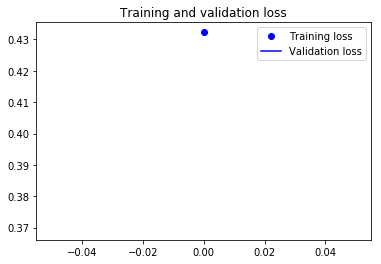

In [69]:
# To visualize the model performance for LSTM with dropout
loss_LSTM_dropout = history_LSTM_dropout.history['loss']
val_loss_LSTM_dropout = history_LSTM_dropout.history['val_loss']

epochs_LSTM_dropout = range(len(loss_LSTM_dropout))

plt.figure()

plt.plot(epochs_LSTM_dropout, loss_LSTM_dropout, 'bo', label='Training loss')
plt.plot(epochs_LSTM_dropout, val_loss_LSTM_dropout, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

from keras.models import load_model
model_LSTM_dropout.save('C:\\Users\\bst\Documents\Big Project - time series forecasts with LSTM\Personal Proj 1 - SolarIrradianceFcst_LSTM_dropout.h5')


In [70]:
# To stack recurrent layers on last LSTM model
model_LSTM_dropout_stacked = Sequential()
model_LSTM_dropout_stacked.add(layers.LSTM(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, df_np.shape[-1])))
model_LSTM_dropout_stacked.add(layers.LSTM(64, activation='relu',
                     dropout=0.1, 
                     recurrent_dropout=0.5))
model_LSTM_dropout_stacked.add(layers.Dense(1))

model_LSTM_dropout_stacked.compile(optimizer=RMSprop(), loss='mae')
history_LSTM_dropout_stacked = model_LSTM_dropout_stacked.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=1,  # to use 40 epochs when fitting for real
                              validation_data=val_gen,
                              validation_steps=val_steps)


Epoch 1/1


  1/500 [..............................] - ETA: 2830s - loss: 0.8012

  2/500 [..............................] - ETA: 2395s - loss: nan   

  3/500 [..............................] - ETA: 2255s - loss: nan

  4/500 [..............................] - ETA: 2182s - loss: nan

  5/500 [..............................] - ETA: 2140s - loss: nan

  6/500 [..............................] - ETA: 2114s - loss: nan

  7/500 [..............................] - ETA: 2094s - loss: nan

  8/500 [..............................] - ETA: 2079s - loss: nan

  9/500 [..............................] - ETA: 2068s - loss: nan

 10/500 [..............................] - ETA: 2058s - loss: nan

 11/500 [..............................] - ETA: 2050s - loss: nan

 12/500 [..............................] - ETA: 2041s - loss: nan

 13/500 [..............................] - ETA: 2034s - loss: nan

 14/500 [..............................] - ETA: 2027s - loss: nan

 15/500 [..............................] - ETA: 2020s - loss: nan

 16/500 [..............................] - ETA: 2013s - loss: nan

 17/500 [>.............................] - ETA: 2006s - loss: nan

 18/500 [>.............................] - ETA: 2000s - loss: nan

 19/500 [>.............................] - ETA: 1996s - loss: nan

 20/500 [>.............................] - ETA: 1991s - loss: nan

 21/500 [>.............................] - ETA: 1985s - loss: nan

 22/500 [>.............................] - ETA: 1978s - loss: nan

 23/500 [>.............................] - ETA: 1974s - loss: nan

 24/500 [>.............................] - ETA: 1968s - loss: nan

 25/500 [>.............................] - ETA: 1963s - loss: nan

 26/500 [>.............................] - ETA: 1957s - loss: nan

 27/500 [>.............................] - ETA: 1953s - loss: nan

 28/500 [>.............................] - ETA: 1950s - loss: nan

 29/500 [>.............................] - ETA: 1944s - loss: nan

 30/500 [>.............................] - ETA: 1939s - loss: nan

 31/500 [>.............................] - ETA: 1933s - loss: nan

 32/500 [>.............................] - ETA: 1929s - loss: nan

 33/500 [>.............................] - ETA: 1924s - loss: nan

 34/500 [=>............................] - ETA: 1920s - loss: nan

 35/500 [=>............................] - ETA: 1916s - loss: nan

 36/500 [=>............................] - ETA: 1911s - loss: nan

 37/500 [=>............................] - ETA: 1908s - loss: nan

 38/500 [=>............................] - ETA: 1909s - loss: nan

 39/500 [=>............................] - ETA: 1908s - loss: nan

 40/500 [=>............................] - ETA: 1906s - loss: nan

 41/500 [=>............................] - ETA: 1903s - loss: nan

 42/500 [=>............................] - ETA: 1897s - loss: nan

 43/500 [=>............................] - ETA: 1892s - loss: nan

 44/500 [=>............................] - ETA: 1887s - loss: nan

 45/500 [=>............................] - ETA: 1882s - loss: nan

 46/500 [=>............................] - ETA: 1876s - loss: nan

 47/500 [=>............................] - ETA: 1871s - loss: nan

 48/500 [=>............................] - ETA: 1866s - loss: nan

 49/500 [=>............................] - ETA: 1861s - loss: nan

 50/500 [==>...........................] - ETA: 1856s - loss: nan

 51/500 [==>...........................] - ETA: 1851s - loss: nan

 52/500 [==>...........................] - ETA: 1846s - loss: nan

 53/500 [==>...........................] - ETA: 1841s - loss: nan

 54/500 [==>...........................] - ETA: 1836s - loss: nan

 55/500 [==>...........................] - ETA: 1832s - loss: nan

 56/500 [==>...........................] - ETA: 1827s - loss: nan

 57/500 [==>...........................] - ETA: 1822s - loss: nan

 58/500 [==>...........................] - ETA: 1817s - loss: nan

 59/500 [==>...........................] - ETA: 1813s - loss: nan

 60/500 [==>...........................] - ETA: 1809s - loss: nan

 61/500 [==>...........................] - ETA: 1804s - loss: nan

 62/500 [==>...........................] - ETA: 1800s - loss: nan

 63/500 [==>...........................] - ETA: 1795s - loss: nan

 64/500 [==>...........................] - ETA: 1791s - loss: nan

 65/500 [==>...........................] - ETA: 1787s - loss: nan

 66/500 [==>...........................] - ETA: 1782s - loss: nan

 67/500 [===>..........................] - ETA: 1778s - loss: nan

 68/500 [===>..........................] - ETA: 1774s - loss: nan

 69/500 [===>..........................] - ETA: 1769s - loss: nan

 70/500 [===>..........................] - ETA: 1765s - loss: nan

 71/500 [===>..........................] - ETA: 1761s - loss: nan

 72/500 [===>..........................] - ETA: 1756s - loss: nan

 73/500 [===>..........................] - ETA: 1752s - loss: nan

 74/500 [===>..........................] - ETA: 1748s - loss: nan

 75/500 [===>..........................] - ETA: 1743s - loss: nan

 76/500 [===>..........................] - ETA: 1739s - loss: nan

 77/500 [===>..........................] - ETA: 1734s - loss: nan

 78/500 [===>..........................] - ETA: 1730s - loss: nan

 79/500 [===>..........................] - ETA: 1725s - loss: nan

 80/500 [===>..........................] - ETA: 1721s - loss: nan

 81/500 [===>..........................] - ETA: 1717s - loss: nan

 82/500 [===>..........................] - ETA: 1712s - loss: nan

 83/500 [===>..........................] - ETA: 1708s - loss: nan

 84/500 [====>.........................] - ETA: 1704s - loss: nan

 85/500 [====>.........................] - ETA: 1700s - loss: nan

 86/500 [====>.........................] - ETA: 1695s - loss: nan

 87/500 [====>.........................] - ETA: 1691s - loss: nan

 88/500 [====>.........................] - ETA: 1687s - loss: nan

 89/500 [====>.........................] - ETA: 1682s - loss: nan

 90/500 [====>.........................] - ETA: 1678s - loss: nan

 91/500 [====>.........................] - ETA: 1673s - loss: nan

 92/500 [====>.........................] - ETA: 1669s - loss: nan

 93/500 [====>.........................] - ETA: 1665s - loss: nan

 94/500 [====>.........................] - ETA: 1660s - loss: nan

 95/500 [====>.........................] - ETA: 1656s - loss: nan

 96/500 [====>.........................] - ETA: 1652s - loss: nan

 97/500 [====>.........................] - ETA: 1647s - loss: nan

 98/500 [====>.........................] - ETA: 1643s - loss: nan

 99/500 [====>.........................] - ETA: 1639s - loss: nan

100/500 [=====>........................] - ETA: 1635s - loss: nan

101/500 [=====>........................] - ETA: 1630s - loss: nan

102/500 [=====>........................] - ETA: 1626s - loss: nan

103/500 [=====>........................] - ETA: 1622s - loss: nan

104/500 [=====>........................] - ETA: 1618s - loss: nan

105/500 [=====>........................] - ETA: 1613s - loss: nan

106/500 [=====>........................] - ETA: 1609s - loss: nan

107/500 [=====>........................] - ETA: 1605s - loss: nan

108/500 [=====>........................] - ETA: 1601s - loss: nan

109/500 [=====>........................] - ETA: 1597s - loss: nan

110/500 [=====>........................] - ETA: 1593s - loss: nan

111/500 [=====>........................] - ETA: 1588s - loss: nan

112/500 [=====>........................] - ETA: 1584s - loss: nan

113/500 [=====>........................] - ETA: 1580s - loss: nan

114/500 [=====>........................] - ETA: 1576s - loss: nan

115/500 [=====>........................] - ETA: 1572s - loss: nan

116/500 [=====>........................] - ETA: 1568s - loss: nan

117/500 [======>.......................] - ETA: 1563s - loss: nan

118/500 [======>.......................] - ETA: 1559s - loss: nan

119/500 [======>.......................] - ETA: 1555s - loss: nan

120/500 [======>.......................] - ETA: 1551s - loss: nan

121/500 [======>.......................] - ETA: 1547s - loss: nan

122/500 [======>.......................] - ETA: 1543s - loss: nan

123/500 [======>.......................] - ETA: 1539s - loss: nan

124/500 [======>.......................] - ETA: 1534s - loss: nan

125/500 [======>.......................] - ETA: 1530s - loss: nan

126/500 [======>.......................] - ETA: 1526s - loss: nan

127/500 [======>.......................] - ETA: 1522s - loss: nan

128/500 [======>.......................] - ETA: 1518s - loss: nan

129/500 [======>.......................] - ETA: 1514s - loss: nan

130/500 [======>.......................] - ETA: 1509s - loss: nan

131/500 [======>.......................] - ETA: 1505s - loss: nan

132/500 [======>.......................] - ETA: 1501s - loss: nan

133/500 [======>.......................] - ETA: 1497s - loss: nan

134/500 [=======>......................] - ETA: 1493s - loss: nan

135/500 [=======>......................] - ETA: 1488s - loss: nan

136/500 [=======>......................] - ETA: 1484s - loss: nan

137/500 [=======>......................] - ETA: 1480s - loss: nan

138/500 [=======>......................] - ETA: 1476s - loss: nan

139/500 [=======>......................] - ETA: 1472s - loss: nan

140/500 [=======>......................] - ETA: 1468s - loss: nan

141/500 [=======>......................] - ETA: 1464s - loss: nan

142/500 [=======>......................] - ETA: 1459s - loss: nan

143/500 [=======>......................] - ETA: 1455s - loss: nan

144/500 [=======>......................] - ETA: 1451s - loss: nan

145/500 [=======>......................] - ETA: 1447s - loss: nan

146/500 [=======>......................] - ETA: 1443s - loss: nan

147/500 [=======>......................] - ETA: 1438s - loss: nan

148/500 [=======>......................] - ETA: 1434s - loss: nan

149/500 [=======>......................] - ETA: 1431s - loss: nan

150/500 [========>.....................] - ETA: 1427s - loss: nan

151/500 [========>.....................] - ETA: 1424s - loss: nan

152/500 [========>.....................] - ETA: 1420s - loss: nan

153/500 [========>.....................] - ETA: 1418s - loss: nan

154/500 [========>.....................] - ETA: 1415s - loss: nan

155/500 [========>.....................] - ETA: 1411s - loss: nan

156/500 [========>.....................] - ETA: 1408s - loss: nan

157/500 [========>.....................] - ETA: 1404s - loss: nan

158/500 [========>.....................] - ETA: 1400s - loss: nan

159/500 [========>.....................] - ETA: 1396s - loss: nan

160/500 [========>.....................] - ETA: 1392s - loss: nan

161/500 [========>.....................] - ETA: 1387s - loss: nan

162/500 [========>.....................] - ETA: 1383s - loss: nan

163/500 [========>.....................] - ETA: 1379s - loss: nan

164/500 [========>.....................] - ETA: 1375s - loss: nan

165/500 [========>.....................] - ETA: 1371s - loss: nan

166/500 [========>.....................] - ETA: 1367s - loss: nan

167/500 [=========>....................] - ETA: 1362s - loss: nan

168/500 [=========>....................] - ETA: 1358s - loss: nan

169/500 [=========>....................] - ETA: 1354s - loss: nan

170/500 [=========>....................] - ETA: 1350s - loss: nan

171/500 [=========>....................] - ETA: 1346s - loss: nan

172/500 [=========>....................] - ETA: 1342s - loss: nan

173/500 [=========>....................] - ETA: 1338s - loss: nan

174/500 [=========>....................] - ETA: 1334s - loss: nan

175/500 [=========>....................] - ETA: 1329s - loss: nan

176/500 [=========>....................] - ETA: 1325s - loss: nan

177/500 [=========>....................] - ETA: 1321s - loss: nan

178/500 [=========>....................] - ETA: 1317s - loss: nan

179/500 [=========>....................] - ETA: 1313s - loss: nan

180/500 [=========>....................] - ETA: 1309s - loss: nan

181/500 [=========>....................] - ETA: 1304s - loss: nan

182/500 [=========>....................] - ETA: 1300s - loss: nan

183/500 [=========>....................] - ETA: 1296s - loss: nan

184/500 [==========>...................] - ETA: 1292s - loss: nan

185/500 [==========>...................] - ETA: 1288s - loss: nan

186/500 [==========>...................] - ETA: 1284s - loss: nan

187/500 [==========>...................] - ETA: 1279s - loss: nan

188/500 [==========>...................] - ETA: 1275s - loss: nan

189/500 [==========>...................] - ETA: 1271s - loss: nan

190/500 [==========>...................] - ETA: 1267s - loss: nan

191/500 [==========>...................] - ETA: 1263s - loss: nan

192/500 [==========>...................] - ETA: 1259s - loss: nan

193/500 [==========>...................] - ETA: 1254s - loss: nan

194/500 [==========>...................] - ETA: 1250s - loss: nan

195/500 [==========>...................] - ETA: 1246s - loss: nan

196/500 [==========>...................] - ETA: 1242s - loss: nan

197/500 [==========>...................] - ETA: 1238s - loss: nan

198/500 [==========>...................] - ETA: 1234s - loss: nan

199/500 [==========>...................] - ETA: 1230s - loss: nan

200/500 [===========>..................] - ETA: 1225s - loss: nan

201/500 [===========>..................] - ETA: 1221s - loss: nan

202/500 [===========>..................] - ETA: 1217s - loss: nan

203/500 [===========>..................] - ETA: 1213s - loss: nan

204/500 [===========>..................] - ETA: 1209s - loss: nan

205/500 [===========>..................] - ETA: 1205s - loss: nan

206/500 [===========>..................] - ETA: 1201s - loss: nan

207/500 [===========>..................] - ETA: 1196s - loss: nan

208/500 [===========>..................] - ETA: 1192s - loss: nan

209/500 [===========>..................] - ETA: 1188s - loss: nan

210/500 [===========>..................] - ETA: 1184s - loss: nan

211/500 [===========>..................] - ETA: 1180s - loss: nan

212/500 [===========>..................] - ETA: 1176s - loss: nan

213/500 [===========>..................] - ETA: 1171s - loss: nan

214/500 [===========>..................] - ETA: 1167s - loss: nan

215/500 [===========>..................] - ETA: 1163s - loss: nan

216/500 [===========>..................] - ETA: 1159s - loss: nan

217/500 [============>.................] - ETA: 1155s - loss: nan

218/500 [============>.................] - ETA: 1151s - loss: nan

219/500 [============>.................] - ETA: 1147s - loss: nan

220/500 [============>.................] - ETA: 1143s - loss: nan

221/500 [============>.................] - ETA: 1139s - loss: nan

222/500 [============>.................] - ETA: 1134s - loss: nan

223/500 [============>.................] - ETA: 1130s - loss: nan

224/500 [============>.................] - ETA: 1126s - loss: nan

225/500 [============>.................] - ETA: 1122s - loss: nan

226/500 [============>.................] - ETA: 1118s - loss: nan

227/500 [============>.................] - ETA: 1114s - loss: nan

228/500 [============>.................] - ETA: 1110s - loss: nan

229/500 [============>.................] - ETA: 1106s - loss: nan

230/500 [============>.................] - ETA: 1101s - loss: nan

231/500 [============>.................] - ETA: 1097s - loss: nan

232/500 [============>.................] - ETA: 1093s - loss: nan

233/500 [============>.................] - ETA: 1089s - loss: nan

234/500 [=============>................] - ETA: 1085s - loss: nan

235/500 [=============>................] - ETA: 1081s - loss: nan

236/500 [=============>................] - ETA: 1077s - loss: nan

237/500 [=============>................] - ETA: 1072s - loss: nan

238/500 [=============>................] - ETA: 1068s - loss: nan

239/500 [=============>................] - ETA: 1064s - loss: nan

240/500 [=============>................] - ETA: 1060s - loss: nan

241/500 [=============>................] - ETA: 1056s - loss: nan

242/500 [=============>................] - ETA: 1052s - loss: nan

243/500 [=============>................] - ETA: 1048s - loss: nan

244/500 [=============>................] - ETA: 1044s - loss: nan

245/500 [=============>................] - ETA: 1040s - loss: nan

246/500 [=============>................] - ETA: 1035s - loss: nan

247/500 [=============>................] - ETA: 1031s - loss: nan

248/500 [=============>................] - ETA: 1027s - loss: nan

249/500 [=============>................] - ETA: 1023s - loss: nan

250/500 [==============>...............] - ETA: 1019s - loss: nan

251/500 [==============>...............] - ETA: 1015s - loss: nan

252/500 [==============>...............] - ETA: 1011s - loss: nan

253/500 [==============>...............] - ETA: 1007s - loss: nan

254/500 [==============>...............] - ETA: 1003s - loss: nan

255/500 [==============>...............] - ETA: 998s - loss: nan 

256/500 [==============>...............] - ETA: 994s - loss: nan

257/500 [==============>...............] - ETA: 990s - loss: nan

258/500 [==============>...............] - ETA: 986s - loss: nan

259/500 [==============>...............] - ETA: 982s - loss: nan

260/500 [==============>...............] - ETA: 978s - loss: nan

261/500 [==============>...............] - ETA: 974s - loss: nan

262/500 [==============>...............] - ETA: 969s - loss: nan

263/500 [==============>...............] - ETA: 965s - loss: nan

264/500 [==============>...............] - ETA: 961s - loss: nan

265/500 [==============>...............] - ETA: 957s - loss: nan

266/500 [==============>...............] - ETA: 953s - loss: nan

267/500 [===============>..............] - ETA: 949s - loss: nan

268/500 [===============>..............] - ETA: 945s - loss: nan

269/500 [===============>..............] - ETA: 941s - loss: nan

270/500 [===============>..............] - ETA: 937s - loss: nan

271/500 [===============>..............] - ETA: 933s - loss: nan

272/500 [===============>..............] - ETA: 929s - loss: nan

273/500 [===============>..............] - ETA: 925s - loss: nan

274/500 [===============>..............] - ETA: 920s - loss: nan

275/500 [===============>..............] - ETA: 916s - loss: nan

276/500 [===============>..............] - ETA: 912s - loss: nan

277/500 [===============>..............] - ETA: 908s - loss: nan

278/500 [===============>..............] - ETA: 904s - loss: nan

279/500 [===============>..............] - ETA: 900s - loss: nan

280/500 [===============>..............] - ETA: 896s - loss: nan

281/500 [===============>..............] - ETA: 892s - loss: nan

282/500 [===============>..............] - ETA: 888s - loss: nan

283/500 [===============>..............] - ETA: 884s - loss: nan

284/500 [================>.............] - ETA: 880s - loss: nan

285/500 [================>.............] - ETA: 876s - loss: nan

286/500 [================>.............] - ETA: 871s - loss: nan

287/500 [================>.............] - ETA: 867s - loss: nan

288/500 [================>.............] - ETA: 863s - loss: nan

289/500 [================>.............] - ETA: 859s - loss: nan

290/500 [================>.............] - ETA: 855s - loss: nan

291/500 [================>.............] - ETA: 851s - loss: nan

292/500 [================>.............] - ETA: 847s - loss: nan

293/500 [================>.............] - ETA: 843s - loss: nan

294/500 [================>.............] - ETA: 839s - loss: nan

295/500 [================>.............] - ETA: 835s - loss: nan

296/500 [================>.............] - ETA: 831s - loss: nan

297/500 [================>.............] - ETA: 826s - loss: nan

298/500 [================>.............] - ETA: 822s - loss: nan

299/500 [================>.............] - ETA: 818s - loss: nan

300/500 [=================>............] - ETA: 814s - loss: nan

301/500 [=================>............] - ETA: 810s - loss: nan

302/500 [=================>............] - ETA: 806s - loss: nan

303/500 [=================>............] - ETA: 802s - loss: nan

304/500 [=================>............] - ETA: 798s - loss: nan

305/500 [=================>............] - ETA: 794s - loss: nan

306/500 [=================>............] - ETA: 790s - loss: nan

307/500 [=================>............] - ETA: 786s - loss: nan

308/500 [=================>............] - ETA: 781s - loss: nan

309/500 [=================>............] - ETA: 777s - loss: nan

310/500 [=================>............] - ETA: 773s - loss: nan

311/500 [=================>............] - ETA: 769s - loss: nan

312/500 [=================>............] - ETA: 765s - loss: nan

313/500 [=================>............] - ETA: 761s - loss: nan

314/500 [=================>............] - ETA: 757s - loss: nan

315/500 [=================>............] - ETA: 753s - loss: nan

316/500 [=================>............] - ETA: 749s - loss: nan

317/500 [==================>...........] - ETA: 745s - loss: nan

318/500 [==================>...........] - ETA: 741s - loss: nan

319/500 [==================>...........] - ETA: 737s - loss: nan

320/500 [==================>...........] - ETA: 733s - loss: nan

321/500 [==================>...........] - ETA: 728s - loss: nan

322/500 [==================>...........] - ETA: 724s - loss: nan

323/500 [==================>...........] - ETA: 720s - loss: nan

324/500 [==================>...........] - ETA: 716s - loss: nan

325/500 [==================>...........] - ETA: 712s - loss: nan

326/500 [==================>...........] - ETA: 708s - loss: nan

327/500 [==================>...........] - ETA: 704s - loss: nan

328/500 [==================>...........] - ETA: 700s - loss: nan

329/500 [==================>...........] - ETA: 696s - loss: nan

330/500 [==================>...........] - ETA: 692s - loss: nan

331/500 [==================>...........] - ETA: 688s - loss: nan

332/500 [==================>...........] - ETA: 684s - loss: nan

333/500 [==================>...........] - ETA: 680s - loss: nan

334/500 [===================>..........] - ETA: 675s - loss: nan

335/500 [===================>..........] - ETA: 671s - loss: nan

336/500 [===================>..........] - ETA: 667s - loss: nan

337/500 [===================>..........] - ETA: 663s - loss: nan

338/500 [===================>..........] - ETA: 659s - loss: nan

339/500 [===================>..........] - ETA: 655s - loss: nan

340/500 [===================>..........] - ETA: 651s - loss: nan

341/500 [===================>..........] - ETA: 647s - loss: nan

342/500 [===================>..........] - ETA: 643s - loss: nan

343/500 [===================>..........] - ETA: 639s - loss: nan

344/500 [===================>..........] - ETA: 635s - loss: nan

345/500 [===================>..........] - ETA: 631s - loss: nan

346/500 [===================>..........] - ETA: 627s - loss: nan

347/500 [===================>..........] - ETA: 622s - loss: nan

348/500 [===================>..........] - ETA: 618s - loss: nan

349/500 [===================>..........] - ETA: 614s - loss: nan

350/500 [====================>.........] - ETA: 610s - loss: nan

351/500 [====================>.........] - ETA: 606s - loss: nan

352/500 [====================>.........] - ETA: 602s - loss: nan

353/500 [====================>.........] - ETA: 598s - loss: nan

354/500 [====================>.........] - ETA: 594s - loss: nan

355/500 [====================>.........] - ETA: 590s - loss: nan

356/500 [====================>.........] - ETA: 586s - loss: nan

357/500 [====================>.........] - ETA: 582s - loss: nan

358/500 [====================>.........] - ETA: 578s - loss: nan

359/500 [====================>.........] - ETA: 574s - loss: nan

360/500 [====================>.........] - ETA: 569s - loss: nan

361/500 [====================>.........] - ETA: 565s - loss: nan

362/500 [====================>.........] - ETA: 561s - loss: nan

363/500 [====================>.........] - ETA: 557s - loss: nan

364/500 [====================>.........] - ETA: 553s - loss: nan

365/500 [====================>.........] - ETA: 549s - loss: nan

366/500 [====================>.........] - ETA: 545s - loss: nan

367/500 [=====================>........] - ETA: 541s - loss: nan

368/500 [=====================>........] - ETA: 537s - loss: nan

369/500 [=====================>........] - ETA: 533s - loss: nan

370/500 [=====================>........] - ETA: 529s - loss: nan

371/500 [=====================>........] - ETA: 525s - loss: nan

372/500 [=====================>........] - ETA: 521s - loss: nan

373/500 [=====================>........] - ETA: 516s - loss: nan

374/500 [=====================>........] - ETA: 512s - loss: nan

375/500 [=====================>........] - ETA: 508s - loss: nan

376/500 [=====================>........] - ETA: 504s - loss: nan

377/500 [=====================>........] - ETA: 500s - loss: nan

378/500 [=====================>........] - ETA: 496s - loss: nan

379/500 [=====================>........] - ETA: 492s - loss: nan

380/500 [=====================>........] - ETA: 488s - loss: nan

381/500 [=====================>........] - ETA: 484s - loss: nan

382/500 [=====================>........] - ETA: 480s - loss: nan

383/500 [=====================>........] - ETA: 476s - loss: nan

384/500 [======================>.......] - ETA: 472s - loss: nan

385/500 [======================>.......] - ETA: 467s - loss: nan

386/500 [======================>.......] - ETA: 463s - loss: nan

387/500 [======================>.......] - ETA: 459s - loss: nan

388/500 [======================>.......] - ETA: 455s - loss: nan

389/500 [======================>.......] - ETA: 451s - loss: nan

390/500 [======================>.......] - ETA: 447s - loss: nan

391/500 [======================>.......] - ETA: 443s - loss: nan

392/500 [======================>.......] - ETA: 439s - loss: nan

393/500 [======================>.......] - ETA: 435s - loss: nan

394/500 [======================>.......] - ETA: 431s - loss: nan

395/500 [======================>.......] - ETA: 427s - loss: nan

396/500 [======================>.......] - ETA: 423s - loss: nan

397/500 [======================>.......] - ETA: 419s - loss: nan

398/500 [======================>.......] - ETA: 415s - loss: nan

399/500 [======================>.......] - ETA: 410s - loss: nan

400/500 [=======================>......] - ETA: 406s - loss: nan

401/500 [=======================>......] - ETA: 402s - loss: nan

402/500 [=======================>......] - ETA: 398s - loss: nan

403/500 [=======================>......] - ETA: 394s - loss: nan

404/500 [=======================>......] - ETA: 390s - loss: nan

405/500 [=======================>......] - ETA: 386s - loss: nan

406/500 [=======================>......] - ETA: 382s - loss: nan

407/500 [=======================>......] - ETA: 378s - loss: nan

408/500 [=======================>......] - ETA: 374s - loss: nan

409/500 [=======================>......] - ETA: 370s - loss: nan

410/500 [=======================>......] - ETA: 366s - loss: nan

411/500 [=======================>......] - ETA: 362s - loss: nan

412/500 [=======================>......] - ETA: 357s - loss: nan

413/500 [=======================>......] - ETA: 353s - loss: nan

414/500 [=======================>......] - ETA: 349s - loss: nan

415/500 [=======================>......] - ETA: 345s - loss: nan

416/500 [=======================>......] - ETA: 341s - loss: nan

417/500 [========================>.....] - ETA: 337s - loss: nan

418/500 [========================>.....] - ETA: 333s - loss: nan

419/500 [========================>.....] - ETA: 329s - loss: nan

420/500 [========================>.....] - ETA: 325s - loss: nan

421/500 [========================>.....] - ETA: 321s - loss: nan

422/500 [========================>.....] - ETA: 317s - loss: nan

423/500 [========================>.....] - ETA: 313s - loss: nan

424/500 [========================>.....] - ETA: 309s - loss: nan

425/500 [========================>.....] - ETA: 305s - loss: nan

426/500 [========================>.....] - ETA: 300s - loss: nan

427/500 [========================>.....] - ETA: 296s - loss: nan

428/500 [========================>.....] - ETA: 292s - loss: nan

429/500 [========================>.....] - ETA: 288s - loss: nan

430/500 [========================>.....] - ETA: 284s - loss: nan

431/500 [========================>.....] - ETA: 280s - loss: nan

432/500 [========================>.....] - ETA: 276s - loss: nan

433/500 [========================>.....] - ETA: 272s - loss: nan

434/500 [=========================>....] - ETA: 268s - loss: nan

435/500 [=========================>....] - ETA: 264s - loss: nan

436/500 [=========================>....] - ETA: 260s - loss: nan

437/500 [=========================>....] - ETA: 256s - loss: nan

438/500 [=========================>....] - ETA: 252s - loss: nan

439/500 [=========================>....] - ETA: 248s - loss: nan

440/500 [=========================>....] - ETA: 244s - loss: nan

441/500 [=========================>....] - ETA: 239s - loss: nan

442/500 [=========================>....] - ETA: 235s - loss: nan

443/500 [=========================>....] - ETA: 231s - loss: nan

444/500 [=========================>....] - ETA: 227s - loss: nan

445/500 [=========================>....] - ETA: 223s - loss: nan

446/500 [=========================>....] - ETA: 219s - loss: nan

447/500 [=========================>....] - ETA: 215s - loss: nan

448/500 [=========================>....] - ETA: 211s - loss: nan

449/500 [=========================>....] - ETA: 207s - loss: nan

450/500 [==========================>...] - ETA: 203s - loss: nan

451/500 [==========================>...] - ETA: 199s - loss: nan

452/500 [==========================>...] - ETA: 195s - loss: nan

453/500 [==========================>...] - ETA: 191s - loss: nan

454/500 [==========================>...] - ETA: 187s - loss: nan

455/500 [==========================>...] - ETA: 182s - loss: nan

456/500 [==========================>...] - ETA: 178s - loss: nan

457/500 [==========================>...] - ETA: 174s - loss: nan

458/500 [==========================>...] - ETA: 170s - loss: nan

459/500 [==========================>...] - ETA: 166s - loss: nan

460/500 [==========================>...] - ETA: 162s - loss: nan

461/500 [==========================>...] - ETA: 158s - loss: nan

462/500 [==========================>...] - ETA: 154s - loss: nan

463/500 [==========================>...] - ETA: 150s - loss: nan

464/500 [==========================>...] - ETA: 146s - loss: nan

465/500 [==========================>...] - ETA: 142s - loss: nan

466/500 [==========================>...] - ETA: 138s - loss: nan

467/500 [===========================>..] - ETA: 134s - loss: nan

468/500 [===========================>..] - ETA: 130s - loss: nan

469/500 [===========================>..] - ETA: 126s - loss: nan

470/500 [===========================>..] - ETA: 121s - loss: nan

471/500 [===========================>..] - ETA: 117s - loss: nan

472/500 [===========================>..] - ETA: 113s - loss: nan

473/500 [===========================>..] - ETA: 109s - loss: nan

474/500 [===========================>..] - ETA: 105s - loss: nan

475/500 [===========================>..] - ETA: 101s - loss: nan

476/500 [===========================>..] - ETA: 97s - loss: nan 

477/500 [===========================>..] - ETA: 93s - loss: nan

478/500 [===========================>..] - ETA: 89s - loss: nan

479/500 [===========================>..] - ETA: 85s - loss: nan

480/500 [===========================>..] - ETA: 81s - loss: nan

481/500 [===========================>..] - ETA: 77s - loss: nan

482/500 [===========================>..] - ETA: 73s - loss: nan

483/500 [===========================>..] - ETA: 69s - loss: nan

484/500 [============================>.] - ETA: 65s - loss: nan

485/500 [============================>.] - ETA: 60s - loss: nan

486/500 [============================>.] - ETA: 56s - loss: nan

487/500 [============================>.] - ETA: 52s - loss: nan

488/500 [============================>.] - ETA: 48s - loss: nan

489/500 [============================>.] - ETA: 44s - loss: nan

490/500 [============================>.] - ETA: 40s - loss: nan

491/500 [============================>.] - ETA: 36s - loss: nan

492/500 [============================>.] - ETA: 32s - loss: nan

493/500 [============================>.] - ETA: 28s - loss: nan

494/500 [============================>.] - ETA: 24s - loss: nan

495/500 [============================>.] - ETA: 20s - loss: nan

496/500 [============================>.] - ETA: 16s - loss: nan

497/500 [============================>.] - ETA: 12s - loss: nan

498/500 [============================>.] - ETA: 8s - loss: nan 

499/500 [============================>.] - ETA: 4s - loss: nan

500/500 [==============================] - 2385s - loss: nan - val_loss: nan

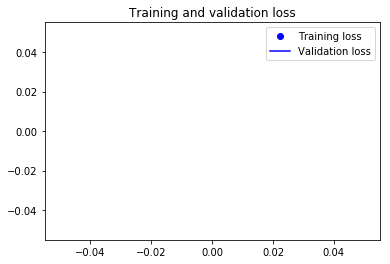

In [71]:
# To visualize the stacked LSTM model with dropout

loss_LSTM_dropout_stacked = history_LSTM_dropout_stacked.history['loss']
val_loss_LSTM_dropout_stacked = history_LSTM_dropout_stacked.history['val_loss']

epochs_LSTM_dropout_stacked = range(len(loss_LSTM_dropout_stacked))

plt.figure()

plt.plot(epochs_LSTM_dropout_stacked, loss_LSTM_dropout_stacked, 'bo', label='Training loss')
plt.plot(epochs_LSTM_dropout_stacked, val_loss_LSTM_dropout_stacked, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

from keras.models import load_model
model_LSTM_dropout_stacked.save('C:\\Users\\bst\Documents\Big Project - time series forecasts with LSTM\Personal Proj 1 - SolarIrradianceFcst_LSTM_dropout_stacked.h5')

In [72]:
# To define and fit a bidirectional LSTM
model_LSTM_bidirection = Sequential()
model_LSTM_bidirection.add(layers.LSTM(32, input_shape=(None, df_np.shape[-1])))
model_LSTM_bidirection.add(layers.Dense(1))

model_LSTM_bidirection.compile(optimizer=RMSprop(), loss='mae')
history_LSTM_bidirection = model_LSTM_bidirection.fit_generator(train_gen_reverse,
                              steps_per_epoch=500,
                              epochs=1,          # to run 20 epochs when run for real
                              validation_data=val_gen_reverse,
                              validation_steps=val_steps)


Epoch 1/1


  1/500 [..............................] - ETA: 1363s - loss: 0.8368

  2/500 [..............................] - ETA: 1014s - loss: 0.8420

  3/500 [..............................] - ETA: 897s - loss: 0.7972 

  4/500 [..............................] - ETA: 838s - loss: 0.7769

  5/500 [..............................] - ETA: 804s - loss: 0.7862

  6/500 [..............................] - ETA: 779s - loss: 0.7846

  7/500 [..............................] - ETA: 761s - loss: 0.7750

  8/500 [..............................] - ETA: 747s - loss: 0.7575

  9/500 [..............................] - ETA: 735s - loss: 0.7435

 10/500 [..............................] - ETA: 726s - loss: 0.7391

 11/500 [..............................] - ETA: 719s - loss: 0.7277

 12/500 [..............................] - ETA: 711s - loss: 0.7212

 13/500 [..............................] - ETA: 705s - loss: 0.7177

 14/500 [..............................] - ETA: 700s - loss: 0.7121

 15/500 [..............................] - ETA: 695s - loss: 0.7055

 16/500 [..............................] - ETA: 690s - loss: 0.6997

 17/500 [>.............................] - ETA: 686s - loss: 0.6933

 18/500 [>.............................] - ETA: 683s - loss: 0.6895

 19/500 [>.............................] - ETA: 680s - loss: 0.6900

 20/500 [>.............................] - ETA: 677s - loss: 0.6857

 21/500 [>.............................] - ETA: 674s - loss: 0.6838

 22/500 [>.............................] - ETA: 671s - loss: 0.6831

 23/500 [>.............................] - ETA: 668s - loss: 0.6777

 24/500 [>.............................] - ETA: 665s - loss: 0.6732

 25/500 [>.............................] - ETA: 662s - loss: 0.6697

 26/500 [>.............................] - ETA: 660s - loss: 0.6677

 27/500 [>.............................] - ETA: 658s - loss: 0.6658

 28/500 [>.............................] - ETA: 655s - loss: 0.6630

 29/500 [>.............................] - ETA: 654s - loss: 0.6616

 30/500 [>.............................] - ETA: 651s - loss: 0.6593

 31/500 [>.............................] - ETA: 649s - loss: 0.6592

 32/500 [>.............................] - ETA: 647s - loss: 0.6551

 33/500 [>.............................] - ETA: 645s - loss: 0.6528

 34/500 [=>............................] - ETA: 643s - loss: 0.6535

 35/500 [=>............................] - ETA: 641s - loss: 0.6535

 36/500 [=>............................] - ETA: 639s - loss: 0.6509

 37/500 [=>............................] - ETA: 637s - loss: 0.6501

 38/500 [=>............................] - ETA: 635s - loss: 0.6502

 39/500 [=>............................] - ETA: 634s - loss: 0.6504

 40/500 [=>............................] - ETA: 632s - loss: 0.6505

 41/500 [=>............................] - ETA: 630s - loss: 0.6499

 42/500 [=>............................] - ETA: 628s - loss: 0.6465

 43/500 [=>............................] - ETA: 626s - loss: 0.6450

 44/500 [=>............................] - ETA: 625s - loss: 0.6453

 45/500 [=>............................] - ETA: 623s - loss: 0.6455

 46/500 [=>............................] - ETA: 621s - loss: 0.6447

 47/500 [=>............................] - ETA: 619s - loss: 0.6420

 48/500 [=>............................] - ETA: 618s - loss: 0.6423

 49/500 [=>............................] - ETA: 616s - loss: 0.6418

 50/500 [==>...........................] - ETA: 614s - loss: 0.6419

 51/500 [==>...........................] - ETA: 613s - loss: 0.6411

 52/500 [==>...........................] - ETA: 611s - loss: 0.6415

 53/500 [==>...........................] - ETA: 610s - loss: 0.6412

 54/500 [==>...........................] - ETA: 608s - loss: 0.6394

 55/500 [==>...........................] - ETA: 607s - loss: 0.6389

 56/500 [==>...........................] - ETA: 605s - loss: 0.6390

 57/500 [==>...........................] - ETA: 604s - loss: 0.6381

 58/500 [==>...........................] - ETA: 602s - loss: 0.6368

 59/500 [==>...........................] - ETA: 600s - loss: 0.6359

 60/500 [==>...........................] - ETA: 599s - loss: 0.6366

 61/500 [==>...........................] - ETA: 597s - loss: 0.6365

 62/500 [==>...........................] - ETA: 596s - loss: 0.6357

 63/500 [==>...........................] - ETA: 594s - loss: 0.6334

 64/500 [==>...........................] - ETA: 593s - loss: 0.6346

 65/500 [==>...........................] - ETA: 591s - loss: 0.6347

 66/500 [==>...........................] - ETA: 590s - loss: 0.6339

 67/500 [===>..........................] - ETA: 588s - loss: 0.6329

 68/500 [===>..........................] - ETA: 587s - loss: 0.6320

 69/500 [===>..........................] - ETA: 585s - loss: 0.6312

 70/500 [===>..........................] - ETA: 584s - loss: 0.6310

 71/500 [===>..........................] - ETA: 582s - loss: 0.6297

 72/500 [===>..........................] - ETA: 581s - loss: 0.6293

 73/500 [===>..........................] - ETA: 579s - loss: 0.6290

 74/500 [===>..........................] - ETA: 578s - loss: 0.6292

 75/500 [===>..........................] - ETA: 576s - loss: 0.6282

 76/500 [===>..........................] - ETA: 575s - loss: 0.6288

 77/500 [===>..........................] - ETA: 573s - loss: 0.6279

 78/500 [===>..........................] - ETA: 572s - loss: 0.6273

 79/500 [===>..........................] - ETA: 570s - loss: 0.6270

 80/500 [===>..........................] - ETA: 569s - loss: 0.6265

 81/500 [===>..........................] - ETA: 567s - loss: 0.6263

 82/500 [===>..........................] - ETA: 566s - loss: 0.6252

 83/500 [===>..........................] - ETA: 565s - loss: 0.6250

 84/500 [====>.........................] - ETA: 563s - loss: 0.6250

 85/500 [====>.........................] - ETA: 562s - loss: 0.6246

 86/500 [====>.........................] - ETA: 560s - loss: 0.6241

 87/500 [====>.........................] - ETA: 559s - loss: 0.6238

 88/500 [====>.........................] - ETA: 557s - loss: 0.6230

 89/500 [====>.........................] - ETA: 556s - loss: 0.6225

 90/500 [====>.........................] - ETA: 554s - loss: 0.6228

 91/500 [====>.........................] - ETA: 553s - loss: 0.6225

 92/500 [====>.........................] - ETA: 552s - loss: 0.6226

 93/500 [====>.........................] - ETA: 550s - loss: 0.6219

 94/500 [====>.........................] - ETA: 549s - loss: 0.6213

 95/500 [====>.........................] - ETA: 547s - loss: 0.6210

 96/500 [====>.........................] - ETA: 546s - loss: 0.6201

 97/500 [====>.........................] - ETA: 544s - loss: 0.6198

 98/500 [====>.........................] - ETA: 543s - loss: 0.6192

 99/500 [====>.........................] - ETA: 542s - loss: 0.6193

100/500 [=====>........................] - ETA: 540s - loss: 0.6188

101/500 [=====>........................] - ETA: 539s - loss: 0.6184

102/500 [=====>........................] - ETA: 537s - loss: 0.6176

103/500 [=====>........................] - ETA: 536s - loss: 0.6179

104/500 [=====>........................] - ETA: 535s - loss: 0.6185

105/500 [=====>........................] - ETA: 533s - loss: 0.6179

106/500 [=====>........................] - ETA: 532s - loss: 0.6171

107/500 [=====>........................] - ETA: 530s - loss: 0.6169

108/500 [=====>........................] - ETA: 529s - loss: 0.6169

109/500 [=====>........................] - ETA: 528s - loss: 0.6162

110/500 [=====>........................] - ETA: 526s - loss: 0.6159

111/500 [=====>........................] - ETA: 525s - loss: 0.6157

112/500 [=====>........................] - ETA: 524s - loss: 0.6151

113/500 [=====>........................] - ETA: 522s - loss: 0.6146

114/500 [=====>........................] - ETA: 521s - loss: 0.6144

115/500 [=====>........................] - ETA: 519s - loss: 0.6141

116/500 [=====>........................] - ETA: 518s - loss: 0.6138

117/500 [======>.......................] - ETA: 517s - loss: 0.6138

118/500 [======>.......................] - ETA: 515s - loss: 0.6142

119/500 [======>.......................] - ETA: 514s - loss: 0.6141

120/500 [======>.......................] - ETA: 512s - loss: 0.6136

121/500 [======>.......................] - ETA: 511s - loss: 0.6136

122/500 [======>.......................] - ETA: 510s - loss: 0.6131

123/500 [======>.......................] - ETA: 508s - loss: 0.6134

124/500 [======>.......................] - ETA: 507s - loss: 0.6137

125/500 [======>.......................] - ETA: 506s - loss: 0.6134

126/500 [======>.......................] - ETA: 504s - loss: 0.6124

127/500 [======>.......................] - ETA: 503s - loss: 0.6127

128/500 [======>.......................] - ETA: 501s - loss: 0.6121

129/500 [======>.......................] - ETA: 500s - loss: 0.6119

130/500 [======>.......................] - ETA: 499s - loss: 0.6111

131/500 [======>.......................] - ETA: 497s - loss: 0.6106

132/500 [======>.......................] - ETA: 496s - loss: 0.6107

133/500 [======>.......................] - ETA: 495s - loss: 0.6106

134/500 [=======>......................] - ETA: 493s - loss: 0.6104

135/500 [=======>......................] - ETA: 492s - loss: 0.6103

136/500 [=======>......................] - ETA: 491s - loss: 0.6097

137/500 [=======>......................] - ETA: 489s - loss: 0.6092

138/500 [=======>......................] - ETA: 488s - loss: 0.6090

139/500 [=======>......................] - ETA: 486s - loss: 0.6090

140/500 [=======>......................] - ETA: 485s - loss: 0.6094

141/500 [=======>......................] - ETA: 484s - loss: 0.6093

142/500 [=======>......................] - ETA: 482s - loss: 0.6087

143/500 [=======>......................] - ETA: 481s - loss: 0.6081

144/500 [=======>......................] - ETA: 480s - loss: 0.6075

145/500 [=======>......................] - ETA: 478s - loss: 0.6076

146/500 [=======>......................] - ETA: 477s - loss: 0.6069

147/500 [=======>......................] - ETA: 475s - loss: 0.6067

148/500 [=======>......................] - ETA: 474s - loss: 0.6072

149/500 [=======>......................] - ETA: 473s - loss: 0.6073

150/500 [========>.....................] - ETA: 471s - loss: 0.6075

151/500 [========>.....................] - ETA: 470s - loss: 0.6076

152/500 [========>.....................] - ETA: 469s - loss: 0.6073

153/500 [========>.....................] - ETA: 467s - loss: 0.6072

154/500 [========>.....................] - ETA: 466s - loss: 0.6070

155/500 [========>.....................] - ETA: 465s - loss: 0.6068

156/500 [========>.....................] - ETA: 463s - loss: 0.6064

157/500 [========>.....................] - ETA: 462s - loss: 0.6068

158/500 [========>.....................] - ETA: 461s - loss: 0.6063

159/500 [========>.....................] - ETA: 459s - loss: 0.6066

160/500 [========>.....................] - ETA: 458s - loss: 0.6062

161/500 [========>.....................] - ETA: 456s - loss: 0.6063

162/500 [========>.....................] - ETA: 455s - loss: 0.6062

163/500 [========>.....................] - ETA: 454s - loss: 0.6060

164/500 [========>.....................] - ETA: 452s - loss: 0.6058

165/500 [========>.....................] - ETA: 451s - loss: 0.6055

166/500 [========>.....................] - ETA: 450s - loss: 0.6050

167/500 [=========>....................] - ETA: 448s - loss: 0.6042

168/500 [=========>....................] - ETA: 447s - loss: 0.6042

169/500 [=========>....................] - ETA: 446s - loss: 0.6043

170/500 [=========>....................] - ETA: 444s - loss: 0.6039

171/500 [=========>....................] - ETA: 443s - loss: 0.6035

172/500 [=========>....................] - ETA: 441s - loss: 0.6033

173/500 [=========>....................] - ETA: 440s - loss: 0.6032

174/500 [=========>....................] - ETA: 439s - loss: 0.6031

175/500 [=========>....................] - ETA: 437s - loss: 0.6029

176/500 [=========>....................] - ETA: 436s - loss: 0.6026

177/500 [=========>....................] - ETA: 435s - loss: 0.6024

178/500 [=========>....................] - ETA: 433s - loss: 0.6016

179/500 [=========>....................] - ETA: 432s - loss: 0.6014

180/500 [=========>....................] - ETA: 431s - loss: 0.6010

181/500 [=========>....................] - ETA: 429s - loss: 0.6013

182/500 [=========>....................] - ETA: 428s - loss: 0.6009

183/500 [=========>....................] - ETA: 426s - loss: 0.6008

184/500 [==========>...................] - ETA: 425s - loss: 0.6006

185/500 [==========>...................] - ETA: 424s - loss: 0.6004

186/500 [==========>...................] - ETA: 422s - loss: 0.6001

187/500 [==========>...................] - ETA: 421s - loss: 0.6001

188/500 [==========>...................] - ETA: 420s - loss: 0.6003

189/500 [==========>...................] - ETA: 418s - loss: 0.6005

190/500 [==========>...................] - ETA: 417s - loss: 0.6004

191/500 [==========>...................] - ETA: 415s - loss: 0.6003

192/500 [==========>...................] - ETA: 414s - loss: 0.6005

193/500 [==========>...................] - ETA: 413s - loss: 0.6005

194/500 [==========>...................] - ETA: 411s - loss: 0.6005

195/500 [==========>...................] - ETA: 410s - loss: 0.6004

196/500 [==========>...................] - ETA: 409s - loss: 0.6002

197/500 [==========>...................] - ETA: 407s - loss: 0.6003

198/500 [==========>...................] - ETA: 406s - loss: 0.6006

199/500 [==========>...................] - ETA: 405s - loss: 0.6006

200/500 [===========>..................] - ETA: 403s - loss: 0.6008

201/500 [===========>..................] - ETA: 402s - loss: 0.6008

202/500 [===========>..................] - ETA: 401s - loss: 0.6007

203/500 [===========>..................] - ETA: 399s - loss: 0.6007

204/500 [===========>..................] - ETA: 398s - loss: 0.6009

205/500 [===========>..................] - ETA: 396s - loss: 0.6005

206/500 [===========>..................] - ETA: 395s - loss: 0.6001

207/500 [===========>..................] - ETA: 394s - loss: 0.5999

208/500 [===========>..................] - ETA: 392s - loss: 0.6001

209/500 [===========>..................] - ETA: 391s - loss: 0.6004

210/500 [===========>..................] - ETA: 390s - loss: 0.6001

211/500 [===========>..................] - ETA: 388s - loss: 0.6003

212/500 [===========>..................] - ETA: 387s - loss: 0.6005

213/500 [===========>..................] - ETA: 386s - loss: 0.6004

214/500 [===========>..................] - ETA: 384s - loss: 0.6001

215/500 [===========>..................] - ETA: 383s - loss: 0.5999

216/500 [===========>..................] - ETA: 382s - loss: 0.6002

217/500 [============>.................] - ETA: 380s - loss: 0.6002

218/500 [============>.................] - ETA: 379s - loss: 0.6001

219/500 [============>.................] - ETA: 377s - loss: 0.6002

220/500 [============>.................] - ETA: 376s - loss: 0.6000

221/500 [============>.................] - ETA: 375s - loss: 0.6000

222/500 [============>.................] - ETA: 373s - loss: 0.5999

223/500 [============>.................] - ETA: 372s - loss: 0.5999

224/500 [============>.................] - ETA: 371s - loss: 0.6001

225/500 [============>.................] - ETA: 369s - loss: 0.6001

226/500 [============>.................] - ETA: 368s - loss: 0.5997

227/500 [============>.................] - ETA: 367s - loss: 0.5997

228/500 [============>.................] - ETA: 365s - loss: 0.5999

229/500 [============>.................] - ETA: 364s - loss: 0.6000

230/500 [============>.................] - ETA: 363s - loss: 0.5998

231/500 [============>.................] - ETA: 361s - loss: 0.5998

232/500 [============>.................] - ETA: 360s - loss: 0.5999

233/500 [============>.................] - ETA: 359s - loss: 0.5997

234/500 [=============>................] - ETA: 357s - loss: 0.5997

235/500 [=============>................] - ETA: 356s - loss: 0.5995

236/500 [=============>................] - ETA: 355s - loss: 0.5993

237/500 [=============>................] - ETA: 353s - loss: 0.5993

238/500 [=============>................] - ETA: 352s - loss: 0.5992

239/500 [=============>................] - ETA: 350s - loss: 0.5993

240/500 [=============>................] - ETA: 349s - loss: 0.5995

241/500 [=============>................] - ETA: 348s - loss: 0.5994

242/500 [=============>................] - ETA: 346s - loss: 0.5997

243/500 [=============>................] - ETA: 345s - loss: 0.5994

244/500 [=============>................] - ETA: 344s - loss: 0.5995

245/500 [=============>................] - ETA: 342s - loss: 0.5996

246/500 [=============>................] - ETA: 341s - loss: 0.5996

247/500 [=============>................] - ETA: 340s - loss: 0.5995

248/500 [=============>................] - ETA: 338s - loss: 0.5993

249/500 [=============>................] - ETA: 337s - loss: 0.5992

250/500 [==============>...............] - ETA: 336s - loss: 0.5991

251/500 [==============>...............] - ETA: 334s - loss: 0.5989

252/500 [==============>...............] - ETA: 333s - loss: 0.5992

253/500 [==============>...............] - ETA: 332s - loss: 0.5991

254/500 [==============>...............] - ETA: 330s - loss: 0.5989

255/500 [==============>...............] - ETA: 329s - loss: 0.5990

256/500 [==============>...............] - ETA: 327s - loss: 0.5987

257/500 [==============>...............] - ETA: 326s - loss: 0.5987

258/500 [==============>...............] - ETA: 325s - loss: 0.5987

259/500 [==============>...............] - ETA: 323s - loss: 0.5984

260/500 [==============>...............] - ETA: 322s - loss: 0.5984

261/500 [==============>...............] - ETA: 321s - loss: 0.5979

262/500 [==============>...............] - ETA: 319s - loss: 0.5978

263/500 [==============>...............] - ETA: 318s - loss: 0.5976

264/500 [==============>...............] - ETA: 317s - loss: 0.5975

265/500 [==============>...............] - ETA: 315s - loss: 0.5974

266/500 [==============>...............] - ETA: 314s - loss: 0.5975

267/500 [===============>..............] - ETA: 313s - loss: 0.5975

268/500 [===============>..............] - ETA: 311s - loss: 0.5973

269/500 [===============>..............] - ETA: 310s - loss: 0.5972

270/500 [===============>..............] - ETA: 309s - loss: 0.5971

271/500 [===============>..............] - ETA: 307s - loss: 0.5972

272/500 [===============>..............] - ETA: 306s - loss: 0.5970

273/500 [===============>..............] - ETA: 305s - loss: 0.5968

274/500 [===============>..............] - ETA: 303s - loss: 0.5968

275/500 [===============>..............] - ETA: 302s - loss: 0.5964

276/500 [===============>..............] - ETA: 300s - loss: 0.5960

277/500 [===============>..............] - ETA: 299s - loss: 0.5962

278/500 [===============>..............] - ETA: 298s - loss: 0.5959

279/500 [===============>..............] - ETA: 296s - loss: 0.5957

280/500 [===============>..............] - ETA: 295s - loss: 0.5957

281/500 [===============>..............] - ETA: 294s - loss: 0.5953

282/500 [===============>..............] - ETA: 292s - loss: 0.5951

283/500 [===============>..............] - ETA: 291s - loss: 0.5950

284/500 [================>.............] - ETA: 290s - loss: 0.5951

285/500 [================>.............] - ETA: 288s - loss: 0.5948

286/500 [================>.............] - ETA: 287s - loss: 0.5946

287/500 [================>.............] - ETA: 286s - loss: 0.5944

288/500 [================>.............] - ETA: 284s - loss: 0.5943

289/500 [================>.............] - ETA: 283s - loss: 0.5944

290/500 [================>.............] - ETA: 282s - loss: 0.5946

291/500 [================>.............] - ETA: 280s - loss: 0.5945

292/500 [================>.............] - ETA: 279s - loss: 0.5944

293/500 [================>.............] - ETA: 278s - loss: 0.5943

294/500 [================>.............] - ETA: 276s - loss: 0.5940

295/500 [================>.............] - ETA: 275s - loss: 0.5938

296/500 [================>.............] - ETA: 273s - loss: 0.5936

297/500 [================>.............] - ETA: 272s - loss: 0.5933

298/500 [================>.............] - ETA: 271s - loss: 0.5933

299/500 [================>.............] - ETA: 269s - loss: 0.5933

300/500 [=================>............] - ETA: 268s - loss: 0.5932

301/500 [=================>............] - ETA: 267s - loss: 0.5931

302/500 [=================>............] - ETA: 265s - loss: 0.5933

303/500 [=================>............] - ETA: 264s - loss: 0.5932

304/500 [=================>............] - ETA: 263s - loss: 0.5931

305/500 [=================>............] - ETA: 261s - loss: 0.5932

306/500 [=================>............] - ETA: 260s - loss: 0.5931

307/500 [=================>............] - ETA: 259s - loss: 0.5931

308/500 [=================>............] - ETA: 257s - loss: 0.5928

309/500 [=================>............] - ETA: 256s - loss: 0.5929

310/500 [=================>............] - ETA: 255s - loss: 0.5927

311/500 [=================>............] - ETA: 253s - loss: 0.5927

312/500 [=================>............] - ETA: 252s - loss: 0.5926

313/500 [=================>............] - ETA: 251s - loss: 0.5925

314/500 [=================>............] - ETA: 249s - loss: 0.5924

315/500 [=================>............] - ETA: 248s - loss: 0.5924

316/500 [=================>............] - ETA: 247s - loss: 0.5922

317/500 [==================>...........] - ETA: 245s - loss: 0.5920

318/500 [==================>...........] - ETA: 244s - loss: 0.5921

319/500 [==================>...........] - ETA: 243s - loss: 0.5922

320/500 [==================>...........] - ETA: 241s - loss: 0.5920

321/500 [==================>...........] - ETA: 240s - loss: 0.5920

322/500 [==================>...........] - ETA: 238s - loss: 0.5920

323/500 [==================>...........] - ETA: 237s - loss: 0.5917

324/500 [==================>...........] - ETA: 236s - loss: 0.5916

325/500 [==================>...........] - ETA: 234s - loss: 0.5915

326/500 [==================>...........] - ETA: 233s - loss: 0.5914

327/500 [==================>...........] - ETA: 232s - loss: 0.5912

328/500 [==================>...........] - ETA: 230s - loss: 0.5911

329/500 [==================>...........] - ETA: 229s - loss: 0.5910

330/500 [==================>...........] - ETA: 228s - loss: 0.5909

331/500 [==================>...........] - ETA: 226s - loss: 0.5910

332/500 [==================>...........] - ETA: 225s - loss: 0.5910

333/500 [==================>...........] - ETA: 224s - loss: 0.5910

334/500 [===================>..........] - ETA: 222s - loss: 0.5910

335/500 [===================>..........] - ETA: 221s - loss: 0.5911

336/500 [===================>..........] - ETA: 220s - loss: 0.5911

337/500 [===================>..........] - ETA: 218s - loss: 0.5910

338/500 [===================>..........] - ETA: 217s - loss: 0.5908

339/500 [===================>..........] - ETA: 216s - loss: 0.5905

340/500 [===================>..........] - ETA: 214s - loss: 0.5902

341/500 [===================>..........] - ETA: 213s - loss: 0.5902

342/500 [===================>..........] - ETA: 212s - loss: 0.5899

343/500 [===================>..........] - ETA: 210s - loss: 0.5898

344/500 [===================>..........] - ETA: 209s - loss: 0.5898

345/500 [===================>..........] - ETA: 208s - loss: 0.5899

346/500 [===================>..........] - ETA: 206s - loss: 0.5898

347/500 [===================>..........] - ETA: 205s - loss: 0.5897

348/500 [===================>..........] - ETA: 204s - loss: 0.5897

349/500 [===================>..........] - ETA: 202s - loss: 0.5896

350/500 [====================>.........] - ETA: 201s - loss: 0.5895

351/500 [====================>.........] - ETA: 200s - loss: 0.5894

352/500 [====================>.........] - ETA: 198s - loss: 0.5893

353/500 [====================>.........] - ETA: 197s - loss: 0.5890

354/500 [====================>.........] - ETA: 195s - loss: 0.5889

355/500 [====================>.........] - ETA: 194s - loss: 0.5887

356/500 [====================>.........] - ETA: 193s - loss: 0.5886

357/500 [====================>.........] - ETA: 191s - loss: 0.5888

358/500 [====================>.........] - ETA: 190s - loss: 0.5886

359/500 [====================>.........] - ETA: 189s - loss: 0.5885

360/500 [====================>.........] - ETA: 187s - loss: 0.5884

361/500 [====================>.........] - ETA: 186s - loss: 0.5881

362/500 [====================>.........] - ETA: 185s - loss: 0.5879

363/500 [====================>.........] - ETA: 183s - loss: 0.5879

364/500 [====================>.........] - ETA: 182s - loss: 0.5879

365/500 [====================>.........] - ETA: 181s - loss: 0.5877

366/500 [====================>.........] - ETA: 179s - loss: 0.5877

367/500 [=====================>........] - ETA: 178s - loss: 0.5876

368/500 [=====================>........] - ETA: 177s - loss: 0.5875

369/500 [=====================>........] - ETA: 175s - loss: 0.5875

370/500 [=====================>........] - ETA: 174s - loss: 0.5874

371/500 [=====================>........] - ETA: 173s - loss: 0.5873

372/500 [=====================>........] - ETA: 171s - loss: 0.5873

373/500 [=====================>........] - ETA: 170s - loss: 0.5872

374/500 [=====================>........] - ETA: 169s - loss: 0.5872

375/500 [=====================>........] - ETA: 167s - loss: 0.5871

376/500 [=====================>........] - ETA: 166s - loss: 0.5870

377/500 [=====================>........] - ETA: 165s - loss: 0.5869

378/500 [=====================>........] - ETA: 163s - loss: 0.5868

379/500 [=====================>........] - ETA: 162s - loss: 0.5869

380/500 [=====================>........] - ETA: 161s - loss: 0.5869

381/500 [=====================>........] - ETA: 159s - loss: 0.5868

382/500 [=====================>........] - ETA: 158s - loss: 0.5866

383/500 [=====================>........] - ETA: 157s - loss: 0.5867

384/500 [======================>.......] - ETA: 155s - loss: 0.5867

385/500 [======================>.......] - ETA: 154s - loss: 0.5865

386/500 [======================>.......] - ETA: 153s - loss: 0.5862

387/500 [======================>.......] - ETA: 151s - loss: 0.5861

388/500 [======================>.......] - ETA: 150s - loss: 0.5863

389/500 [======================>.......] - ETA: 148s - loss: 0.5862

390/500 [======================>.......] - ETA: 147s - loss: 0.5861

391/500 [======================>.......] - ETA: 146s - loss: 0.5859

392/500 [======================>.......] - ETA: 144s - loss: 0.5860

393/500 [======================>.......] - ETA: 143s - loss: 0.5859

394/500 [======================>.......] - ETA: 142s - loss: 0.5858

395/500 [======================>.......] - ETA: 140s - loss: 0.5857

396/500 [======================>.......] - ETA: 139s - loss: 0.5858

397/500 [======================>.......] - ETA: 138s - loss: 0.5856

398/500 [======================>.......] - ETA: 136s - loss: 0.5857

399/500 [======================>.......] - ETA: 135s - loss: 0.5857

400/500 [=======================>......] - ETA: 134s - loss: 0.5856

401/500 [=======================>......] - ETA: 132s - loss: 0.5857

402/500 [=======================>......] - ETA: 131s - loss: 0.5856

403/500 [=======================>......] - ETA: 130s - loss: 0.5856

404/500 [=======================>......] - ETA: 128s - loss: 0.5855

405/500 [=======================>......] - ETA: 127s - loss: 0.5855

406/500 [=======================>......] - ETA: 126s - loss: 0.5854

407/500 [=======================>......] - ETA: 124s - loss: 0.5853

408/500 [=======================>......] - ETA: 123s - loss: 0.5853

409/500 [=======================>......] - ETA: 122s - loss: 0.5855

410/500 [=======================>......] - ETA: 120s - loss: 0.5855

411/500 [=======================>......] - ETA: 119s - loss: 0.5854

412/500 [=======================>......] - ETA: 118s - loss: 0.5856

413/500 [=======================>......] - ETA: 116s - loss: 0.5855

414/500 [=======================>......] - ETA: 115s - loss: 0.5856

415/500 [=======================>......] - ETA: 114s - loss: 0.5855

416/500 [=======================>......] - ETA: 112s - loss: 0.5853

417/500 [========================>.....] - ETA: 111s - loss: 0.5853

418/500 [========================>.....] - ETA: 110s - loss: 0.5852

419/500 [========================>.....] - ETA: 108s - loss: 0.5851

420/500 [========================>.....] - ETA: 107s - loss: 0.5851

421/500 [========================>.....] - ETA: 106s - loss: 0.5851

422/500 [========================>.....] - ETA: 104s - loss: 0.5849

423/500 [========================>.....] - ETA: 103s - loss: 0.5851

424/500 [========================>.....] - ETA: 101s - loss: 0.5849

425/500 [========================>.....] - ETA: 100s - loss: 0.5848

426/500 [========================>.....] - ETA: 99s - loss: 0.5847 

427/500 [========================>.....] - ETA: 97s - loss: 0.5846

428/500 [========================>.....] - ETA: 96s - loss: 0.5846

429/500 [========================>.....] - ETA: 95s - loss: 0.5845

430/500 [========================>.....] - ETA: 93s - loss: 0.5846

431/500 [========================>.....] - ETA: 92s - loss: 0.5845

432/500 [========================>.....] - ETA: 91s - loss: 0.5846

433/500 [========================>.....] - ETA: 89s - loss: 0.5846

434/500 [=========================>....] - ETA: 88s - loss: 0.5845

435/500 [=========================>....] - ETA: 87s - loss: 0.5845

436/500 [=========================>....] - ETA: 85s - loss: 0.5845

437/500 [=========================>....] - ETA: 84s - loss: 0.5845

438/500 [=========================>....] - ETA: 83s - loss: 0.5845

439/500 [=========================>....] - ETA: 81s - loss: 0.5845

440/500 [=========================>....] - ETA: 80s - loss: 0.5844

441/500 [=========================>....] - ETA: 79s - loss: 0.5841

442/500 [=========================>....] - ETA: 77s - loss: 0.5839

443/500 [=========================>....] - ETA: 76s - loss: 0.5838

444/500 [=========================>....] - ETA: 75s - loss: 0.5839

445/500 [=========================>....] - ETA: 73s - loss: 0.5839

446/500 [=========================>....] - ETA: 72s - loss: 0.5839

447/500 [=========================>....] - ETA: 71s - loss: 0.5837

448/500 [=========================>....] - ETA: 69s - loss: 0.5836

449/500 [=========================>....] - ETA: 68s - loss: 0.5836

450/500 [==========================>...] - ETA: 67s - loss: 0.5834

451/500 [==========================>...] - ETA: 65s - loss: 0.5834

452/500 [==========================>...] - ETA: 64s - loss: 0.5833

453/500 [==========================>...] - ETA: 63s - loss: 0.5832

454/500 [==========================>...] - ETA: 61s - loss: 0.5831

455/500 [==========================>...] - ETA: 60s - loss: 0.5831

456/500 [==========================>...] - ETA: 59s - loss: 0.5830

457/500 [==========================>...] - ETA: 57s - loss: 0.5828

458/500 [==========================>...] - ETA: 56s - loss: 0.5829

459/500 [==========================>...] - ETA: 55s - loss: 0.5829

460/500 [==========================>...] - ETA: 53s - loss: 0.5828

461/500 [==========================>...] - ETA: 52s - loss: 0.5828

462/500 [==========================>...] - ETA: 50s - loss: 0.5827

463/500 [==========================>...] - ETA: 49s - loss: 0.5824

464/500 [==========================>...] - ETA: 48s - loss: 0.5824

465/500 [==========================>...] - ETA: 46s - loss: 0.5824

466/500 [==========================>...] - ETA: 45s - loss: 0.5823

467/500 [===========================>..] - ETA: 44s - loss: 0.5823

468/500 [===========================>..] - ETA: 42s - loss: 0.5823

469/500 [===========================>..] - ETA: 41s - loss: 0.5824

470/500 [===========================>..] - ETA: 40s - loss: 0.5825

471/500 [===========================>..] - ETA: 38s - loss: 0.5825

472/500 [===========================>..] - ETA: 37s - loss: 0.5825

473/500 [===========================>..] - ETA: 36s - loss: 0.5825

474/500 [===========================>..] - ETA: 34s - loss: 0.5826

475/500 [===========================>..] - ETA: 33s - loss: 0.5826

476/500 [===========================>..] - ETA: 32s - loss: 0.5827

477/500 [===========================>..] - ETA: 30s - loss: 0.5826

478/500 [===========================>..] - ETA: 29s - loss: 0.5826

479/500 [===========================>..] - ETA: 28s - loss: 0.5825

480/500 [===========================>..] - ETA: 26s - loss: 0.5822

481/500 [===========================>..] - ETA: 25s - loss: 0.5822

482/500 [===========================>..] - ETA: 24s - loss: 0.5822

483/500 [===========================>..] - ETA: 22s - loss: 0.5822

484/500 [============================>.] - ETA: 21s - loss: 0.5822

485/500 [============================>.] - ETA: 20s - loss: 0.5822

486/500 [============================>.] - ETA: 18s - loss: 0.5821

487/500 [============================>.] - ETA: 17s - loss: 0.5821

488/500 [============================>.] - ETA: 16s - loss: 0.5820

489/500 [============================>.] - ETA: 14s - loss: 0.5819

490/500 [============================>.] - ETA: 13s - loss: 0.5818

491/500 [============================>.] - ETA: 12s - loss: 0.5817

492/500 [============================>.] - ETA: 10s - loss: 0.5817

493/500 [============================>.] - ETA: 9s - loss: 0.5815 

494/500 [============================>.] - ETA: 8s - loss: 0.5813

495/500 [============================>.] - ETA: 6s - loss: 0.5813

496/500 [============================>.] - ETA: 5s - loss: 0.5813

497/500 [============================>.] - ETA: 4s - loss: 0.5812

498/500 [============================>.] - ETA: 2s - loss: 0.5813

499/500 [============================>.] - ETA: 1s - loss: 0.5812

500/500 [==============================] - 766s - loss: 0.5811 - val_loss: 0.4779

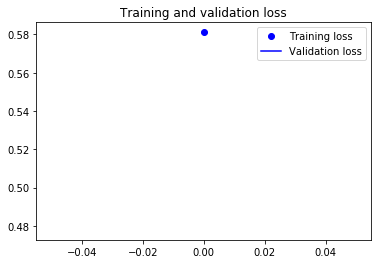

In [73]:
# To visualize the bidirectional LSTM model performance
loss_LSTM_bidirection = history_LSTM_bidirection.history['loss']
val_loss_LSTM_bidirection = history_LSTM_bidirection.history['val_loss']

epochs_LSTM_bidirection = range(len(loss_LSTM_bidirection))

plt.figure()

plt.plot(epochs_LSTM_bidirection, loss_LSTM_bidirection, 'bo', label='Training loss')
plt.plot(epochs_LSTM_bidirection, val_loss_LSTM_bidirection, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

from keras.models import load_model
model_LSTM_bidirection.save('C:\\Users\\bst\Documents\Big Project - time series forecasts with LSTM\Personal Proj 1 - SolarIrradianceFcst_LSTM_bidirectional.h5')
